# **Q1. Perform basic EDA (Score:1)**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/house_price (1).csv')

In [ ]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [ ]:
print("First 5 rows:")
print(df.head())

First 5 rows:
                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250  


In [ ]:
print("\nData types and missing values:")
print(df.info())


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB
None


In [ ]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.000000     50.000000      2.000000    4.267000e+03
50%     1275.000000      2.000000     71.850000      3.000000    5.438000e+03
75%     1672.000000      3.000000    120.000000      3.000000    7.317000e+03
max    52272.000000     40.000000   3600.000000     43.000000    1.200000e+07


In [ ]:
print("\nShape of the dataset:")
print(df.shape)


Shape of the dataset:
(13200, 7)


In [ ]:
df.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0
bhk,0
price_per_sqft,0


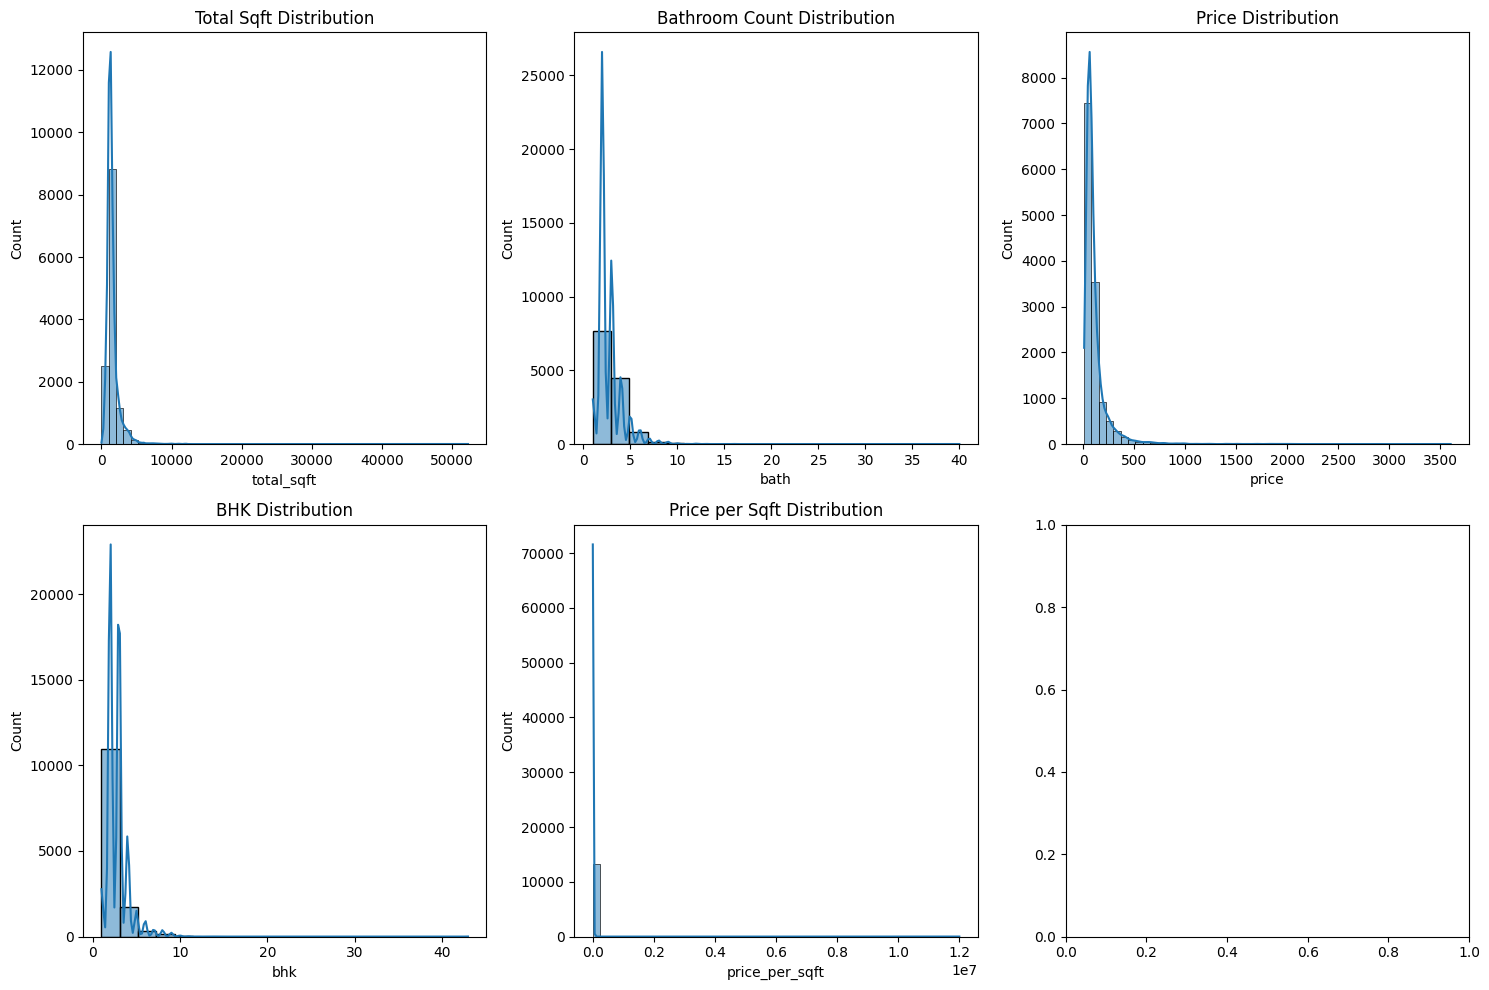

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.histplot(df['total_sqft'], bins=50, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Total Sqft Distribution')

sns.histplot(df['bath'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Bathroom Count Distribution')

sns.histplot(df['price'], bins=50, kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Price Distribution')

sns.histplot(df['bhk'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('BHK Distribution')

sns.histplot(df['price_per_sqft'], bins=50, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Price per Sqft Distribution')

plt.tight_layout()
plt.show()

# Q2. Detect the outliers using following methods and remove it using methods like trimming

In [ ]:

# Example dataset
data = {'scores': [10, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 100]}
df = pd.DataFrame(data)
print(df)

    scores
0       10
1       12
2       14
3       15
4       16
5       17
6       18
7       19
8       20
9       21
10      22
11      23
12      24
13      25
14     100


a) Mean and Standard deviation

In [ ]:
# Calculate mean and standard deviation
mean = df['scores'].mean()
std = df['scores'].std()

# Define bounds
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

# Detect outliers
outliers = df[(df['scores'] < lower_bound) | (df['scores'] > upper_bound)]
print("Outliers (Mean and Std Dev):")
print(outliers)

# Handle outliers (e.g., capping)
df['scores'] = np.where(df['scores'] < lower_bound, lower_bound, df['scores'])
df['scores'] = np.where(df['scores'] > upper_bound, upper_bound, df['scores'])
print("Dataset after capping:")
print(df)

Outliers (Mean and Std Dev):
    scores
14     100
Dataset after capping:
       scores
0   10.000000
1   12.000000
2   14.000000
3   15.000000
4   16.000000
5   17.000000
6   18.000000
7   19.000000
8   20.000000
9   21.000000
10  22.000000
11  23.000000
12  24.000000
13  25.000000
14  88.379845


b)Percentile method

In [ ]:
# Calculate percentiles
lower_bound = df['scores'].quantile(0.05)
upper_bound = df['scores'].quantile(0.95)

# Detect outliers
outliers = df[(df['scores'] < lower_bound) | (df['scores'] > upper_bound)]
print("Outliers (Percentile Method):")
print(outliers)

# Handle outliers (e.g., trimming)
df = df[(df['scores'] >= lower_bound) & (df['scores'] <= upper_bound)]
print("Dataset after trimming:")
print(df)

Outliers (Percentile Method):
       scores
0   10.000000
14  88.379845
Dataset after trimming:
    scores
1     12.0
2     14.0
3     15.0
4     16.0
5     17.0
6     18.0
7     19.0
8     20.0
9     21.0
10    22.0
11    23.0
12    24.0
13    25.0


c) IQR(Inter quartile range method)

In [ ]:
# Calculate Q1, Q3, and IQR
Q1 = df['scores'].quantile(0.25)
Q3 = df['scores'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df['scores'] < lower_bound) | (df['scores'] > upper_bound)]
print("Outliers (IQR Method):")
print(outliers)

# Handle outliers (e.g., imputation with median)
median = df['scores'].median()
df['scores'] = np.where(df['scores'] < lower_bound, median, df['scores'])
df['scores'] = np.where(df['scores'] > upper_bound, median, df['scores'])
print("Dataset after imputation:")
print(df)

Outliers (IQR Method):
Empty DataFrame
Columns: [scores]
Index: []
Dataset after imputation:
    scores
1     12.0
2     14.0
3     15.0
4     16.0
5     17.0
6     18.0
7     19.0
8     20.0
9     21.0
10    22.0
11    23.0
12    24.0
13    25.0


d) Z Score method

In [ ]:
from scipy.stats import zscore

# Calculate Z-scores
df['z_score'] = zscore(df['scores'])

# Detect outliers
outliers = df[(df['z_score'] > 3) | (df['z_score'] < -3)]
print("Outliers (Z-Score Method):")
print(outliers)

# Handle outliers (e.g., trimming)
df = df[(df['z_score'] >= -3) & (df['z_score'] <= 3)]
df = df.drop(columns=['z_score'])  # Drop the Z-score column
print("Dataset after trimming:")
print(df)

Outliers (Z-Score Method):
Empty DataFrame
Columns: [scores, z_score]
Index: []
Dataset after trimming:
    scores
1     12.0
2     14.0
3     15.0
4     16.0
5     17.0
6     18.0
7     19.0
8     20.0
9     21.0
10    22.0
11    23.0
12    24.0
13    25.0


# **Q3. Create a box plot and use this to determine which method seems to work best to remove outliers for this data? (Score:1)**

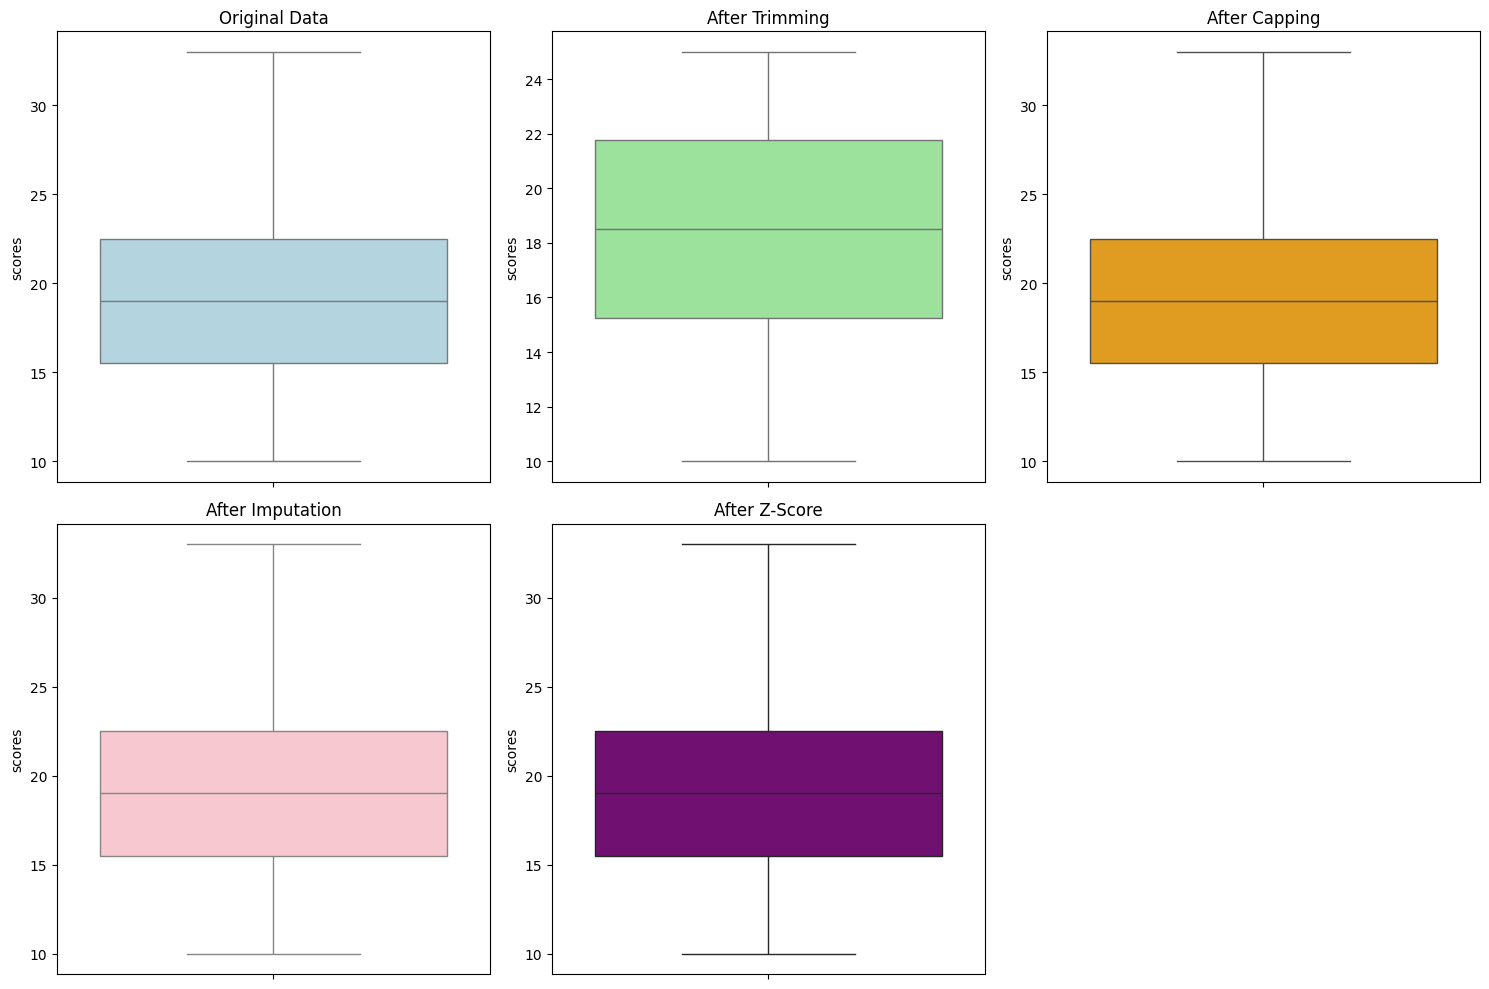

In [ ]:


# Example dataset
data = {'scores': [10, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 100]}
df = pd.DataFrame(data)

# Function to detect and handle outliers
def handle_outliers(df, column, method='trimming'):
    if method == 'trimming':
        # Trimming: Remove outliers
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    elif method == 'capping':
        # Capping: Replace outliers with bounds
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
        return df

    elif method == 'imputation':
        # Imputation: Replace outliers with median
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        median = df[column].median()
        df[column] = np.where(df[column] < lower_bound, median, df[column])
        df[column] = np.where(df[column] > upper_bound, median, df[column])
        return df

    elif method == 'zscore':
        # Z-Score: Remove outliers with Z-score > 3 or < -3
        df['z_score'] = zscore(df[column])
        df = df[(df['z_score'] >= -3) & (df['z_score'] <= 3)]
        df = df.drop(columns=['z_score'])
        return df

# Apply outlier removal methods
df_trimmed = handle_outliers(df, 'scores', method='trimming')
df_capped = handle_outliers(df, 'scores', method='capping')
df_imputed = handle_outliers(df, 'scores', method='imputation')
df_zscore = handle_outliers(df, 'scores', method='zscore')

# Create box plots
plt.figure(figsize=(15, 10))

# Original Data
plt.subplot(2, 3, 1)
sns.boxplot(y=df['scores'], color='lightblue')
plt.title('Original Data')

# After Trimming
plt.subplot(2, 3, 2)
sns.boxplot(y=df_trimmed['scores'], color='lightgreen')
plt.title('After Trimming')

# After Capping
plt.subplot(2, 3, 3)
sns.boxplot(y=df_capped['scores'], color='orange')
plt.title('After Capping')

# After Imputation
plt.subplot(2, 3, 4)
sns.boxplot(y=df_imputed['scores'], color='pink')
plt.title('After Imputation')

# After Z-Score
plt.subplot(2, 3, 5)
sns.boxplot(y=df_zscore['scores'], color='purple')
plt.title('After Z-Score')

plt.tight_layout()
plt.show()

# **Q4. Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed. Check the skewness and kurtosis before and after the transformation. (Score:1)**

In [ ]:

from scipy.stats import skew, kurtosis, boxcox

# Example dataset
data = {'price_per_sqft': [1000, 1200, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 10000, 15000, 20000]}
df = pd.DataFrame(data)

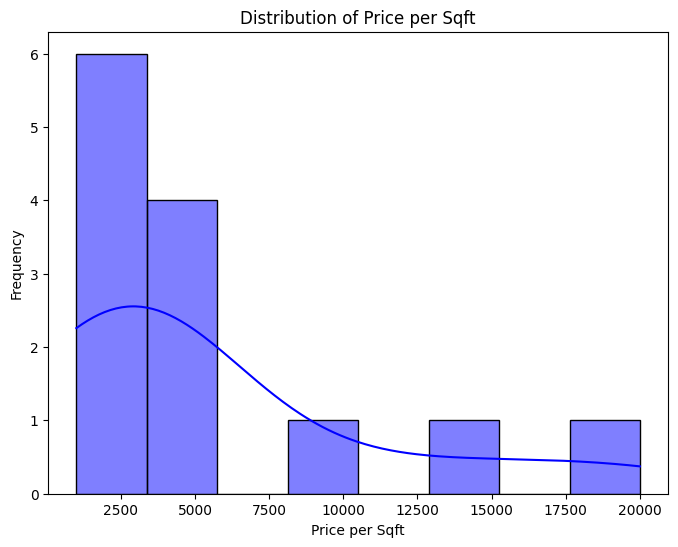

In [ ]:
# Plot histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['price_per_sqft'], kde=True, color='blue')
plt.title('Distribution of Price per Sqft')
plt.xlabel('Price per Sqft')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Calculate skewness and kurtosis
skewness_before = skew(df['price_per_sqft'])
kurtosis_before = kurtosis(df['price_per_sqft'])

print(f"Skewness before transformation: {skewness_before}")
print(f"Kurtosis before transformation: {kurtosis_before}")

Skewness before transformation: 1.5201078492462408
Kurtosis before transformation: 1.030510138864603


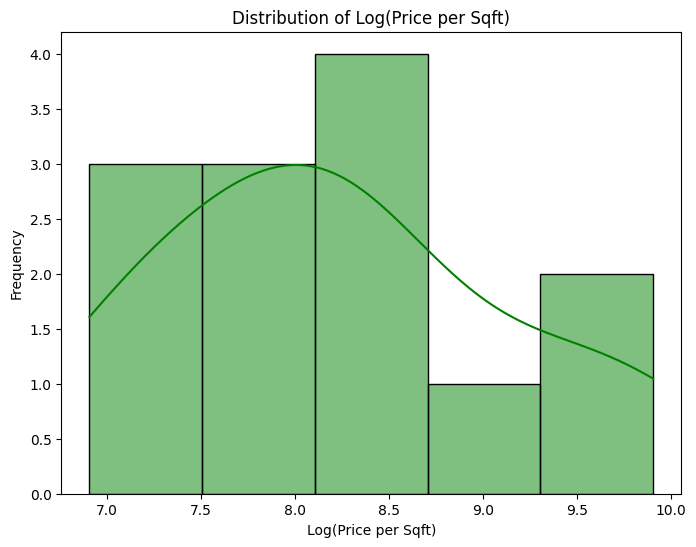

Skewness after log transformation: 0.4090625535345364
Kurtosis after log transformation: -0.7653494057975645


In [ ]:
# Apply log transformation (add 1 to avoid log(0))
df['log_price_per_sqft'] = np.log1p(df['price_per_sqft'])

# Plot histogram after log transformation
plt.figure(figsize=(8, 6))
sns.histplot(df['log_price_per_sqft'], kde=True, color='green')
plt.title('Distribution of Log(Price per Sqft)')
plt.xlabel('Log(Price per Sqft)')
plt.ylabel('Frequency')
plt.show()

# Calculate skewness and kurtosis after log transformation
skewness_log = skew(df['log_price_per_sqft'])
kurtosis_log = kurtosis(df['log_price_per_sqft'])

print(f"Skewness after log transformation: {skewness_log}")
print(f"Kurtosis after log transformation: {kurtosis_log}")

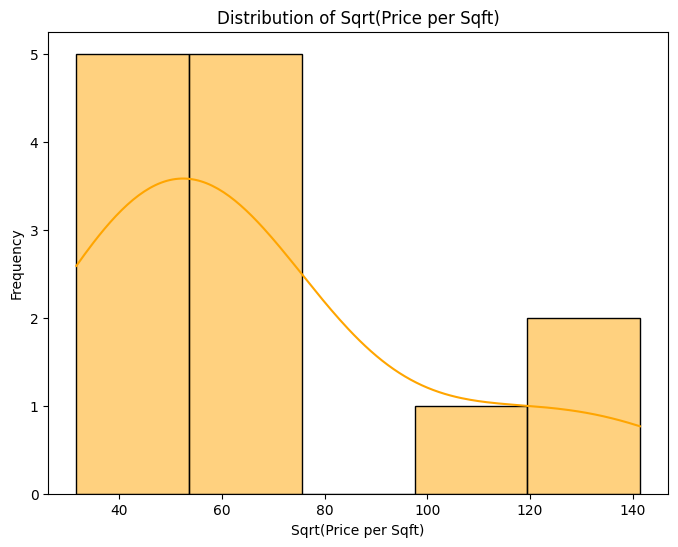

Skewness after sqrt transformation: 1.055226500249564
Kurtosis after sqrt transformation: -0.01630402805421749


In [ ]:
# Apply square root transformation
df['sqrt_price_per_sqft'] = np.sqrt(df['price_per_sqft'])

# Plot histogram after square root transformation
plt.figure(figsize=(8, 6))
sns.histplot(df['sqrt_price_per_sqft'], kde=True, color='orange')
plt.title('Distribution of Sqrt(Price per Sqft)')
plt.xlabel('Sqrt(Price per Sqft)')
plt.ylabel('Frequency')
plt.show()

# Calculate skewness and kurtosis after square root transformation
skewness_sqrt = skew(df['sqrt_price_per_sqft'])
kurtosis_sqrt = kurtosis(df['sqrt_price_per_sqft'])

print(f"Skewness after sqrt transformation: {skewness_sqrt}")
print(f"Kurtosis after sqrt transformation: {kurtosis_sqrt}")

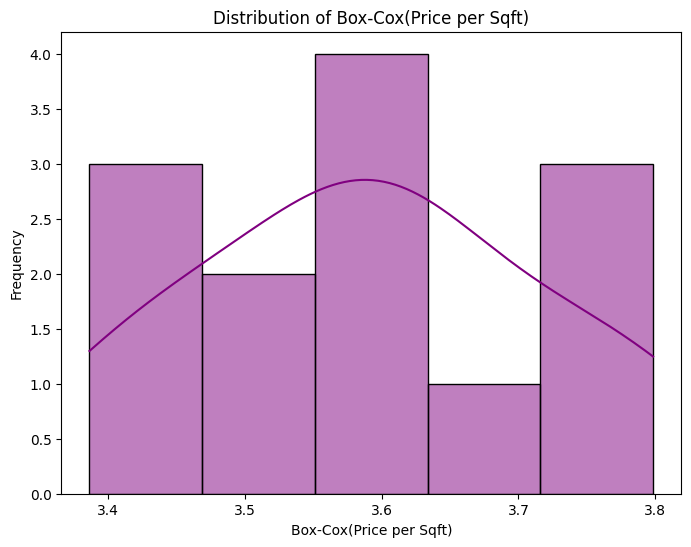

Skewness after Box-Cox transformation: 0.06595492966010705
Kurtosis after Box-Cox transformation: -0.9000735703893143


In [ ]:
# Apply Box-Cox transformation
df['boxcox_price_per_sqft'], _ = boxcox(df['price_per_sqft'] + 1)  # Add 1 to avoid negative values

# Plot histogram after Box-Cox transformation
plt.figure(figsize=(8, 6))
sns.histplot(df['boxcox_price_per_sqft'], kde=True, color='purple')
plt.title('Distribution of Box-Cox(Price per Sqft)')
plt.xlabel('Box-Cox(Price per Sqft)')
plt.ylabel('Frequency')
plt.show()

# Calculate skewness and kurtosis after Box-Cox transformation
skewness_boxcox = skew(df['boxcox_price_per_sqft'])
kurtosis_boxcox = kurtosis(df['boxcox_price_per_sqft'])

print(f"Skewness after Box-Cox transformation: {skewness_boxcox}")
print(f"Kurtosis after Box-Cox transformation: {kurtosis_boxcox}")


# **Q5. Check the correlation between all the numerical columns and plot heatmap. (Score:1)**

Dataset:
    price  area  bedrooms  age
0  100000  1000         2    5
1  150000  1200         3   10
2  200000  1500         3   15
3  250000  1800         4   20
4  300000  2000         4   25


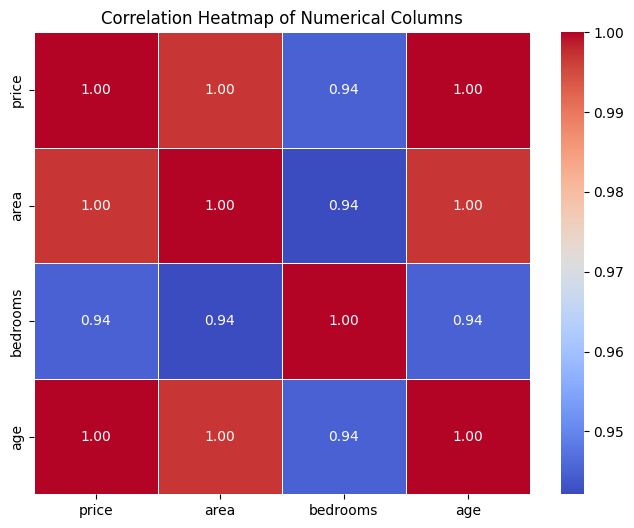

In [ ]:


# Example dataset
data = {
    'price': [100000, 150000, 200000, 250000, 300000],
    'area': [1000, 1200, 1500, 1800, 2000],
    'bedrooms': [2, 3, 3, 4, 4],
    'age': [5, 10, 15, 20, 25]
}
df = pd.DataFrame(data)

# Display the dataset
print("Dataset:")
print(df)

# Step 1: Calculate correlation matrix
correlation_matrix = df.corr()

# Step 2: Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

# **Q6. Draw Scatter plot between the variables to check the correlation between them. (Score:1)**

Dataset:
    price  area  bedrooms  age
0  100000  1000         2    5
1  150000  1200         3   10
2  200000  1500         3   15
3  250000  1800         4   20
4  300000  2000         4   25


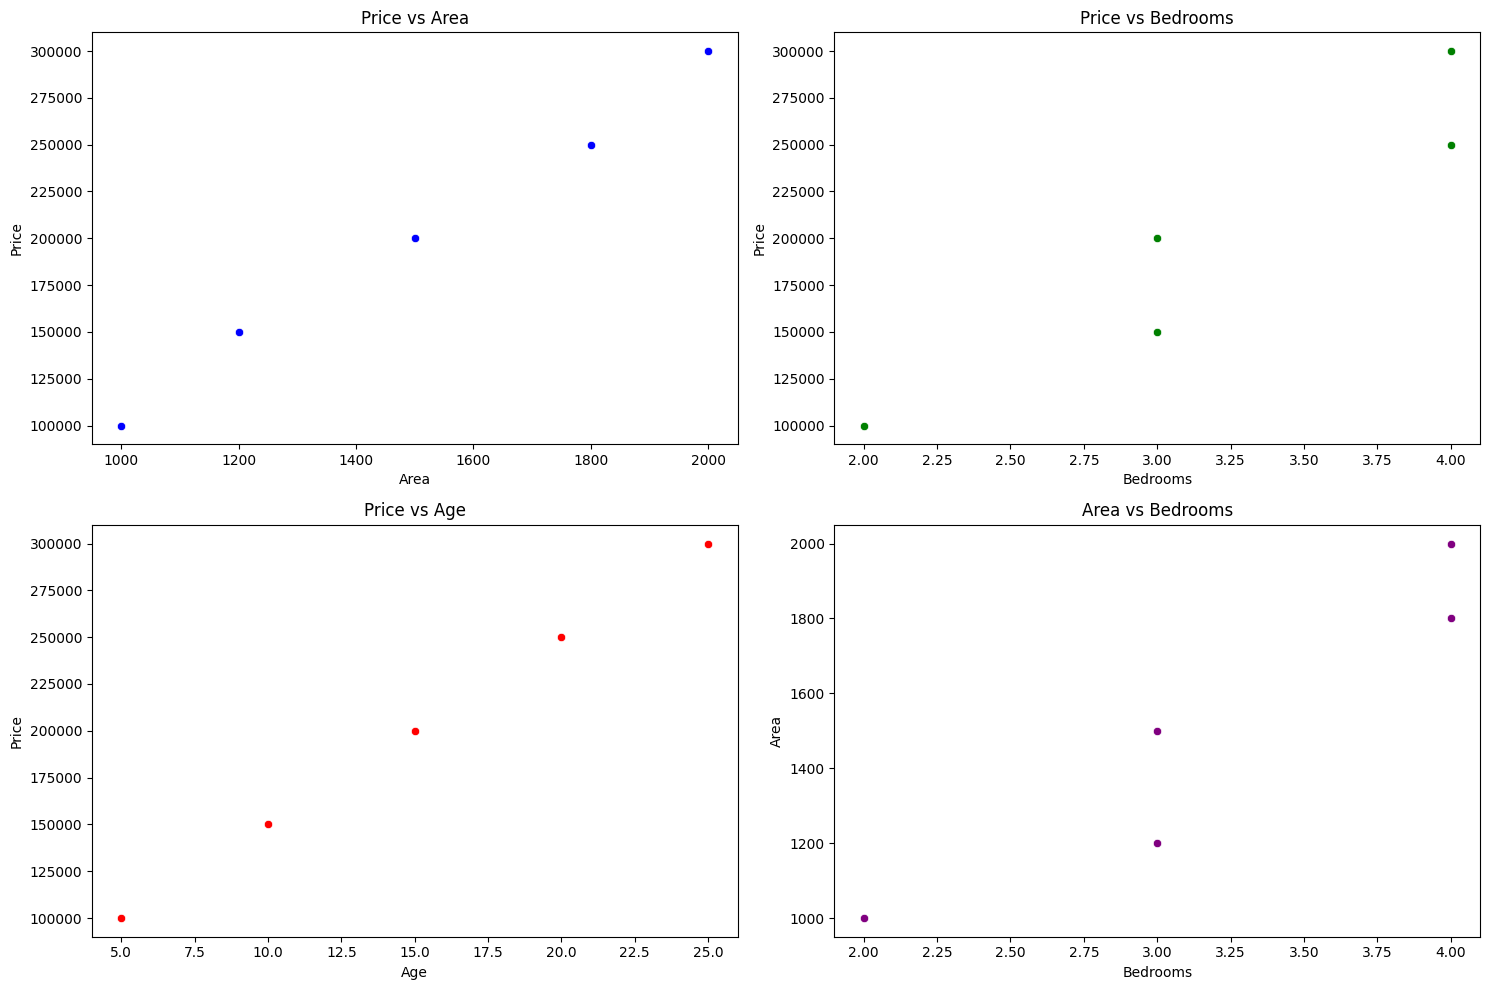

In [ ]:


# Example dataset
data = {
    'price': [100000, 150000, 200000, 250000, 300000],
    'area': [1000, 1200, 1500, 1800, 2000],
    'bedrooms': [2, 3, 3, 4, 4],
    'age': [5, 10, 15, 20, 25]
}
df = pd.DataFrame(data)

# Display the dataset
print("Dataset:")
print(df)

# Step 1: Draw scatter plots between pairs of variables
plt.figure(figsize=(15, 10))

# Scatter plot: Price vs Area
plt.subplot(2, 2, 1)
sns.scatterplot(x=df['area'], y=df['price'], color='blue')
plt.title('Price vs Area')
plt.xlabel('Area')
plt.ylabel('Price')

# Scatter plot: Price vs Bedrooms
plt.subplot(2, 2, 2)
sns.scatterplot(x=df['bedrooms'], y=df['price'], color='green')
plt.title('Price vs Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')

# Scatter plot: Price vs Age
plt.subplot(2, 2, 3)
sns.scatterplot(x=df['age'], y=df['price'], color='red')
plt.title('Price vs Age')
plt.xlabel('Age')
plt.ylabel('Price')

# Scatter plot: Area vs Bedrooms
plt.subplot(2, 2, 4)
sns.scatterplot(x=df['bedrooms'], y=df['area'], color='purple')
plt.title('Area vs Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Area')

plt.tight_layout()
plt.show()

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the Dataset
# Replace 'your_dataset.csv' with the actual file path
df = pd.read_csv('/content/house_price (1).csv')

# Step 3: Initial Inspection
# Check the first few rows
print("First 5 rows:")
print(df.head())

# Check the shape of the dataset
print("\nShape of the dataset:")
print(df.shape)

# Check data types and missing values
print("\nData types and missing values:")
print(df.info())

# Summary statistics for numerical columns
print("\nSummary statistics:")
print(df.describe())

# Step 4: Handle Missing Values
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Handle missing values (e.g., fill with mean or median)
df.fillna(df.mean(), inplace=True)  # Example: Fill missing values with the mean

# Step 5: Univariate Analysis
# Histograms for numerical columns
print("\nUnivariate Analysis: Histograms")
df.hist(figsize=(10, 8), bins=30)
plt.tight_layout()
plt.show()

# Bar plots for categorical columns
print("\nUnivariate Analysis: Bar Plots")
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col].value_counts().plot(kind='bar', title=col)
    plt.show()

# Step 6: Bivariate Analysis
# Scatter plots for numerical columns
print("\nBivariate Analysis: Scatter Plots")
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for i in range(len(numerical_columns)):
    for j in range(i + 1, len(numerical_columns)):
        plt.scatter(df[numerical_columns[i]], df[numerical_columns[j]])
        plt.xlabel(numerical_columns[i])
        plt.ylabel(numerical_columns[j])
        plt.title(f"{numerical_columns[i]} vs {numerical_columns[j]}")
        plt.show()

# Box plots for categorical vs numerical columns
print("\nBivariate Analysis: Box Plots")
for cat_col in categorical_columns:
    for num_col in numerical_columns:
        sns.boxplot(x=df[cat_col], y=df[num_col])
        plt.title(f"{cat_col} vs {num_col}")
        plt.show()

# Step 7: Correlation Analysis
# Correlation matrix and heatmap
print("\nCorrelation Analysis:")
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Step

First 5 rows:
                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250  

Shape of the dataset:
(13200, 7)

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 n

TypeError: Could not convert ['Electronic City Phase IIChikka TirupathiUttarahalliLingadheeranahalliKothanurWhitefieldOld Airport RoadRajaji NagarMarathahalliotherWhitefieldWhitefield7th Phase JP NagarGottigereSarjapurMysore RoadBisuvanahalliRaja Rajeshwari NagarotherotherKengeriBinny PeteThanisandraBellandurThanisandraotherElectronic CityWhitefieldRamagondanahalliElectronic CityYelahankaBisuvanahalliHebbalRaja Rajeshwari NagarKasturi NagarKanakpura RoadElectronics City Phase 1KundalahalliChikkalasandraUttarahalliMurugeshpalyaSarjapur  RoadotherYelahankaKanakpura RoadHSR LayoutDoddathoguruWhitefieldKR PuramotherotherBhoganhalliWhitefieldLakshminarayana PuraYelahankaBegur RoadotherMurugeshpalyaotherotherotherWhitefieldVarthurBommanahalliDoddathoguruGunjurMarathahalliDevarachikkanahalliKanakpura RoadotherBegur RoadHegde NagarHaralur RoadHennur RoadKothannurKalena AgraharaotherKaval ByrasandraISRO LayoutotherYelahankaGarudachar PalyaEPIP ZoneHegde NagarKanakpura RoadDasanapuraKasavanhalliRajaji NagarSanjay nagarElectronic CityotherISRO LayoutThanisandraDomlurKengeriSarjapura - Attibele RoadotherotherYeshwanthpurChandapuraKothanurotherotherotherNagarbhaviRajaji NagarotherDevanahalliotherotherWhitefieldElectronic CityRamamurthy NagarSarjapur  RoadKengeriThanisandraMalleshwaramHennur RoadThanisandraAkshaya NagarHebbalShampuraDevanahalliKadugodiLB Shastri NagarotherHormavuVishwapriya LayoutotherSarjapurElectronic CityotherKudlu GateKanakpura RoadDevanahalli8th Phase JP NagarBommasandra Industrial AreaotherHennur RoadYelahankaKasavanhalliISRO LayoutAnandapuraVishveshwarya LayoutKothanurKengeri Satellite TownotherotherMysore RoadKannamangalaDevarachikkanahalliotherHulimavuElectronic City Phase IIKalena AgraharaThanisandraThanisandraMahalakshmi LayoutotherHosa RoadotherWhitefieldotherSarjapurotherElectronic CityElectronic CityotherotherAttibeleElectronic CityElectronic CityCV Raman NagarotherKumaraswami LayoutNagavaraMalleshwaramElectronic CityHulimavuHebbal KempapuraThanisandraVijayanagarElectronic CityotherotherElectronic CityKR PuramMarathahalliKanakpura RoadPattandur AgraharaBellandurotherMarathahalliYelahankaKothanurotherHSR LayoutNagasandraEPIP ZoneotherWhitefieldWhitefieldKadugodiYelahankaKogiluPanathurotherPadmanabhanagar1st Block JayanagarKammasandraotherElectronics City Phase 1otherDasarahalliMagadi RoadElectronic CityotherSarjapur  RoadSarjapur  RoadKoramangalaotherSarjapur  Roadother7th Phase JP NagarotherHebbalDommasandraBudigereotherotherElectronic CityKalyan nagarotherotherVijayanagarRamamurthy NagarotherChandapuraotherChandapuraotherotherElectronic CityElectronic CityKothanurotherOMBR LayoutChandapuraother7th Phase JP NagarotherotherHoramavu AgaraSarjapur  RoadElectronic CityotherotherAmbedkar NagarVijayanagarRaja Rajeshwari NagarBudigereSarjapur  RoadAttibeleotherHennur RoadotherKalena AgraharaSarjapurTalaghattapuraKengeri Satellite TownotherKogiluHegde NagarBalagereotherKadugodiJiganiGollarapalya Hosahalli7th Phase JP NagarotherElectronics City Phase 1BisuvanahalliOld Madras RoadKalena AgraharaKaggadasapuraotherChandapuraKanakpura RoadHaralur RoadElectronic City Phase IIHebbal9th Phase JP NagarJakkurTC PalayaotherotherGiri NagarSarjapur  RoadSingasandraKalena AgraharaVijayanagarKothanurAECS LayoutKanakpura RoadMallasandraBegurJP NagarPanathurotherYelahankaKanakpura RoadMalleshpalyaotherotherWhitefieldMunnekollalotherHennur RoadElectronic CityMarathahalliotherRajaji NagarGiri NagarHaralur RoadotherKaval ByrasandraKaggalipuraotherSarjapur  RoadHaralur Road6th Phase JP NagarUlsoorWhitefieldUttarahalliThigalarapalyaSomasundara PalyaotherotherDevarachikkanahalliKalena Agrahara7th Phase JP NagarBasaveshwara NagarotherBommasandraotherotherArdendaleHarlurotherAkshaya NagarElectronic City Phase IIotherotherotherKodihalliMagadi RoadNarayanapuraotherotherBannerghatta RoadHennurChandapuraBellandur5th Phase JP NagarKR PuramBalagereHebbalKodigehaaliBannerghatta RoadotherBegur RoadLakshminarayana PuraBillekahalli8th Phase JP NagarElectronic CityJalahalliHegde NagarMahadevpuraAnekalBegur RoadKengeriKanakpura RoadotherVijayanagarVijayanagar7th Phase JP NagarRaja Rajeshwari NagarSompuraYeshwanthpurElectronics City Phase 1otherDoddathoguruDodda NekkundiotherHosur RoadChandapuraWhitefieldWhitefieldBattarahalliother7th Phase JP NagarotherBannerghatta RoadRajaji NagarRajaji NagarSultan PalayaotherKengeriMahalakshmi LayoutKanakpura RoadotherBillekahalliNagarbhaviAnandapuraBommasandra Industrial AreaTC PalayaBudigereBommasandraAmbalipuraHoodiChandapuraBalagereCV Raman NagarotherMarathahalliHosur RoadBrookefieldYelenahalliRaja Rajeshwari Nagar7th Phase JP NagarotherotherotherDasanapuraKasavanhalliWhitefieldBellandur7th Phase JP NagarSarjapur  RoadArdendaleVittasandraHoodiElectronic CityHarlurHulimavuRaja Rajeshwari NagarGiri NagarSarjapur  RoadotherHormavuotherChandapuraAECS LayoutMarathahalliotherHarlurElectronic City Phase IIotherPadmanabhanagarChikkalasandraotherHebbalAmbalipuraAkshaya Nagar2nd Stage NagarbhaviVidyaranyapuraAmruthahalliotherWhitefieldKoramangalaKodigehalliotherotherotherSubramanyapuraotherBasavangudiKenchenahalliotherother7th Phase JP NagarotherChikkalasandraHebbal KempapuraotherOld Madras RoadBanjara LayoutHoodi5th Phase JP NagarElectronic CityotherYelahankaKereguddadahalliBisuvanahalliWhitefieldotherLingadheeranahalliotherHoodiShampuraVidyaranyapuraotherJP NagarKambipuraSarjapur  RoadotherotherVittasandra8th Phase JP NagarBanashankari Stage IIIotherHaralur RoadBegur RoadSector 7 HSR LayoutHosur RoadotherotherElectronic CityWhitefieldJakkurKR PuramotherElectronic City Phase IIThanisandraRajiv NagarRamagondanahalliotherArekereBannerghatta RoadHebbalotherHSR LayoutMagadi RoadMico LayoutotherKanakpura RoadWhitefieldotherElectronic CityWhitefieldotherUttarahalliKammanahalliotherHennur RoadHebbalMunnekollalYelahankaBanashankariHosa RoadotherChikkabanavarKanakpura RoadAttibeleMarathahalliotherBannerghatta Roadother7th Phase JP NagarBommasandraElectronics City Phase 1HRBR LayoutSarjapur  RoadotherWhitefieldSarjapur  RoadVittasandraSarjapur  RoadotherBanashankari Stage IIIMarathahalliotherHarlurGottigereotherHormavuWhitefieldotherMysore RoadJiganiKoramangalaotherNehru NagarKanakapuraHarlurotherotherSanjay nagarHSR LayoutotherotherSarjapur  RoadKalena AgraharaKonanakunteotherotherotherArekereMalleshwaramGottigereRaja Rajeshwari NagarBisuvanahalliotherBrookefieldVidyaranyapuraThanisandraKaggadasapuraMargondanahalliotherRaja Rajeshwari NagarR.T. NagarWhitefieldWhitefieldHebbalHRBR LayoutBannerghatta RoadKanakapuraTumkur RoadWhitefieldVasanthapuraKundalahalliMysore RoadotherHegde NagarJalahalliBellandurotherMarathahalliKambipuraGM PalayaSingasandraotherMalleshwaramMahadevpuraotherChikkalasandraJalahalli East6th Phase JP NagarHaralur RoadHennur RoadotherHosakerehalliSarjapurHebbalotherSarjapur  RoadKanakpura RoadBommasandraHaralur RoadotherHoramavu AgaraRaja Rajeshwari NagarMahadevpuraYelahankaYelahankaIndira NagarBisuvanahalliThanisandraotherRaja Rajeshwari NagarotherotherotherotherotherYelahankaotherotherHormavuBannerghatta RoadotherKodichikkanahalliOMBR LayoutMarathahalliotherAkshaya NagarBrookefieldWhitefieldLingadheeranahalliKaggadasapuraHoodiBannerghatta RoadVarthur RoadotherotherotherotherotherAnjanapuraAbbigereTindluElectronic CityotherKothanurotherElectronic City Phase IIHennur RoadDommasandraKammasandraotherHebbalChandapuraKoramangalaBegur RoadWhitefieldotherGubbalalaKengeri7th Phase JP NagarotherBannerghatta RoadHulimavuElectronic CityBudigereotherParappana AgraharaJakkurotherRaja Rajeshwari NagarotherHaralur RoadotherPanathurKaval ByrasandraSarjapurRamagondanahalliHosakerehalliBanashankariKengeri Satellite TownEPIP ZoneWhitefieldotherWhitefieldCunningham RoadAnekalotherMahadevpuraotherotherotherWhitefieldHegde NagarJakkurElectronic City Phase IIThanisandraotherKudluotherHulimavuVarthur Road5th Phase JP NagarUttarahalliotherYeshwanthpurElectronic CityOld Airport RoadKundalahalliSarjapurKoramangalaMarathahalliotherVishwapriya LayoutBanashankari Stage VIBattarahalliotherWhitefieldJalahalliHosakerehalliCox TownKammasandraKaggadasapuraThanisandraotherHSR LayoutGottigereKoramangalaMarathahalliVidyaranyapuraotherBannerghatta RoadBannerghatta RoadThanisandraKaggadasapuraotherKathriguppeGottigereElectronic CityThanisandraTumkur RoadBegur RoadHaralur Road7th Phase JP NagarArekereotherPadmanabhanagarHBR LayoutotherKasavanhalliotherBhoganhalliVittasandraAnandapuraHennur RoadChandapuraYelahanka New TownHebbalNarayanapuraSahakara NagarElectronic CityotherVarthurRachenahalli7th Phase JP NagarYeshwanthpurPanathurYelahankaKalyan nagarKanakpura RoadWhitefieldThanisandra7th Phase JP NagarotherVasanthapuraHebbalElectronic CityKanakpura RoadTC PalayaNagarbhaviotherKanakpura RoadYelachenahalli7th Phase JP NagarKadugodiotherSarjapur  RoadBisuvanahalli1st Block Jayanagar8th Phase JP NagarBannerghatta RoadMallasandraMarathahalliBrookefieldotherotherKothannurVijayanagarKasturi NagarTalaghattapuraRaja Rajeshwari NagarotherElectronics City Phase 1SubramanyapuraKodichikkanahalliMagadi RoadotherYeshwanthpurKR PuramElectronic CityUttarahalliKodigehaaliRaja Rajeshwari NagarBattarahalliHosa RoadThigalarapalyaArekereElectronic CityHosur RoadUttarahalliSarjapur  RoadElectronic City Phase IIKanakpura RoadotherotherChandapuraChandapuraHosur RoadBasaveshwara NagarGunjurotherTC PalayaRamamurthy NagarotherWhitefield7th Phase JP NagarVarthurVarthurWhitefieldMagadi RoadGreen Glen LayoutSubramanyapuraHennur RoadKengeri Satellite TownKanakpura RoadotherElectronic City Phase IIotherSarjapur  RoadHarlurThubarahalliWhitefieldotherJiganiMahadevpuraSarjapur  RoadMarathahalliotherBannerghatta RoadJakkurKambipuraotherotherYelahankaotherHoramavu BanaswadiThanisandraBellandurKonanakunteHosa RoadMarathahalliAmbedkar NagarUttarahalliLakshminarayana PuraHebbal1st Phase JP NagarHosakerehalli5th Phase JP NagarRamamurthy NagarKasavanhalliAttibeleKundalahalliotherNGR LayoutKammanahalliWhitefieldKasavanhalliotherKoramangalaotherSahakara NagarYelahankaUttarahalliHosa RoadMarathahalliRaja Rajeshwari NagarKoramangalaKammasandraChandapuraKothannurotherBrookefieldSeegehalliRajaji NagarSarjapurBEML LayoutNGR LayoutVarthurotherHaralur RoadotherSarjapur  RoadUttarahalliWhitefieldUttarahalliRamamurthy NagarGiri NagarMarathahalliElectronics City Phase 1JakkurRachenahalliThanisandra7th Phase JP NagarMarathahalliNRI LayoutHennur RoadotherHosa RoadSarjapurotherRajaji NagarYeshwanthpurMysore RoadHoodiChikkabanavarITPLSomasundara PalyaHegde NagarRaja Rajeshwari NagarHaralur RoadIndira NagarHarlurITPLHoramavu BanaswadiElectronic City Phase IIVidyaranyapuraMargondanahalliPattandur Agraharaotherother5th Phase JP NagarWhitefieldKanakpura RoadotherAttibeleChandapuraotherotherotherSahakara NagarKanakpura Road1st Phase JP NagarHoramavu BanaswadiRachenahalliHSR LayoutotherVittasandraKanakapuraHaralur RoadBabusapalayaNagasandraHoodiKathriguppeAkshaya NagarotherotherotherPanathurotherotherTC PalayaotherotherWhitefieldBrookefieldotherRachenahalliIblur VillageTC PalayaHSR Layout7th Phase JP NagarHoramavu AgaraJP NagarKasavanhalliHebbalAkshaya NagarYelachenahalliYelahankaSarjapur  Roadother2nd Stage NagarbhaviSeegehalliHebbalYeshwanthpurKanakapura2nd Stage NagarbhaviTC PalayaVasanthapuraotherWhitefieldHaralur RoadYeshwanthpurKanakpura RoadYeshwanthpurotherotherOld Madras RoadKadugodiBanashankariAnanth NagarSarjapur  RoadotherotherotherotherChannasandraDevanahalliJiganiotherYelahankaotherUttarahalliUttarahalliJalahalliother7th Phase JP NagarotherJalahalli EastHennur Road5th Phase JP NagarotherHoodiHaralur RoadThanisandraKengeriElectronic CityHoodiThanisandraKanakpura RoadHaralur RoadMarathahalliHaralur RoadKambipuraKonanakunteKanakpura RoadElectronic CityElectronic CityThanisandraotherotherHosakerehalliKammanahalliChoodasandraMysore RoadIndira NagarBudigereotherMahadevpuraHaralur RoadHennurRajaji NagarotherotherWhitefieldKasturi NagarThanisandraBasaveshwara NagarR.T. NagarKaikondrahalliVittasandraWhitefieldHosakerehalliotherElectronic City Phase IIotherHebbal KempapuraBommasandraDasarahalliWhitefieldotherKodigehaaliKR PuramEPIP ZoneMarathahalliElectronic CityNeeladri NagarPanathurMarathahalli1st Block JayanagarFrazer TownKundalahalliYeshwanthpurKambipuraKaggalipuraYelahankaKanakpura RoadotherotherAkshaya NagarRachenahalliHaralur RoadotherotherAmbalipuraYelahankaYelahankaSarjapur  RoadotherSompuraMagadi RoadHarlurHoramavu AgaraSarjapur  RoadThanisandraBellandurCooke TownVarthurElectronic CityWhitefieldBanashankariDoddakallasandraotherHosur RoadKaggalipuraBattarahalliUttarahalliThanisandraHebbalKanakpura RoadYelenahalliSarjapur  RoadKudlu GateotherChamrajpetUttarahalliRaja Rajeshwari NagarotherotherotherKogiluSahakara NagarWhitefieldThanisandraotherHennur RoadOMBR LayoutKumaraswami LayoutKasavanhalliUlsoor7th Phase JP NagarRayasandraGarudachar PalyaKalyan nagarWhitefieldBEML LayoutotherRajaji NagarITPLBannerghatta RoadotherotherYelahanka New Townother7th Phase JP NagarUttarahalliElectronic CityotherDevanahalliUttarahalliAkshaya NagarKaggadasapuraKoramangalaMalleshwaramotherRamamurthy NagarTC PalayaKudlu GateLakshminarayana PuraAbbigereBannerghatta RoadRaja Rajeshwari NagarWhitefieldSarjapur  RoadWhitefieldGarudachar PalyaSarjapur  RoadotherWhitefieldHosakerehalliTumkur RoadChikka TirupathiYelahankaSarjapur  Road5th Block Hbr LayoutJiganiotherPai LayoutAmruthahalliotherotherKannamangalaWhitefieldotherKasturi NagarWhitefieldWhitefieldKanakpura RoadElectronics City Phase 1WhitefieldKanakpura RoadHaralur RoadIblur VillageKengeri Satellite TownMysore RoadHaralur RoadotherChannasandraHosa RoadKudlu GateBanashankari Stage VWhitefieldotherBinny PeteChamrajpetTC PalayaotherOld Airport RoadotherSonnenahalliBegurKasavanhalliKambipuraKR PuramHoodiBillekahalliotherOld Airport RoadSarjapur  RoadMalleshwaramElectronic CityBalagereNagarbhaviWhitefieldRachenahalliHebbalThanisandraKothannurElectronic CityotherElectronic CityBommanahalliMarathahalliHaralur RoadRaja Rajeshwari NagarJakkurRachenahalli7th Phase JP NagarWhitefieldWhitefieldWhitefieldThanisandraotherotherJP NagarotherJiganiKothanurElectronic CityotherHennur RoadBommanahalliYelahankaKathriguppeKR PuramHosa RoadPanathurotherYelahankaotherotherThubarahalliBenson TownHoodiotherVijayanagarotherOld Madras RoadThanisandraotherotherChikkalasandraChandapura2nd Phase Judicial LayoutBEML LayoutAmruthahalliMarathahalliKothannurKoramangalaHoodiLingadheeranahalliDommasandraSanjay nagarMarathahalliotherKannamangalaChandapuraotherotherElectronics City Phase 1Hebbal KempapuraRaja Rajeshwari NagarBellandurKengeri Satellite TownBannerghatta RoadSarjapur  RoadSarjapurBillekahalliotherHaralur RoadThanisandraDoddathoguruHarlurotherPoorna Pragna LayoutRaja Rajeshwari NagarYeshwanthpurJudicial LayoutotherKodihalliHoramavu AgaraNagasandraKanakpura RoadBannerghatta RoadKanakpura RoadBanashankari Stage IIIotherBabusapalayaBannerghatta RoadNGR LayoutBabusapalayaotherDevanahalliotherotherAnekalHoramavu AgaraBanashankari Stage IIWhitefieldJP NagarPoorna Pragna LayoutBhoganhalliYelahanka New TownYelahankaNeeladri NagarKogiluotherHoramavu BanaswadiotherKR PuramotherotherKR PuramotherKaruna NagarKadugodiotherHebbal KempapuraotherHRBR LayoutKodichikkanahalliBudigereSector 7 HSR LayoutRaja Rajeshwari NagarHoodiKanakpura RoadSingasandraYelahankaotherHoodiThigalarapalyaBegur RoadKasturi NagarHebbal KempapuraAkshaya NagarJakkurSarjapur  RoadKammasandraWhitefieldBegur RoadotherHebbalElectronic CityPanathurotherKengeriotherRachenahalliVarthurVittasandraHSR LayoutUttarahalliBinny PeteDasarahalliotherBannerghattaChannasandraotherHebbalotherotherElectronic CityUttarahalliotherMalleshwaramYelahanka9th Phase JP Nagar5th Phase JP NagarKalena AgraharaElectronic CityotherotherHoramavu BanaswadiBhoganhalliDoddathoguruKengeriotherUttarahalliotherWhitefieldotherotherAnanth NagarotherAttibeleDommasandraWhitefieldWhitefieldKalena AgraharaMalleshpalyaWhitefieldRamagondanahalliJalahalliotherKaggalipuraotherChandapuraChandapuraMalleshpalyaRaja Rajeshwari NagarElectronic CityThigalarapalyaKundalahalliotherVarthurMahadevpuraSarjapur  RoadKanakpura RoadotherChikka TirupathiHebbalEPIP ZoneKonanakunteWhitefieldotherThigalarapalyaSarjapur  RoadVijayanagarRayasandra7th Phase JP NagarKadugodiDoddakallasandraSarjapurHSR LayoutMalleshpalyaHoramavu BanaswadiPadmanabhanagarHormavuHoodiRaja Rajeshwari NagarUlsoorJP NagarHSR LayoutotherKanakapuraYelahankaotherUttarahalliHosur RoadBanjara LayoutBegurUttarahalliChikka TirupathiRajaji NagarParappana AgraharaKanakpura RoadotherKanakpura RoadSingasandraKogiluYelachenahalliKoramangalaYelahankaotherotherBisuvanahalliYelahankaotherHoodiotherJiganiotherWhitefieldHebbalKengeriotherYelahankaJP NagarSarjapurArdendaleotherHebbalBegurSarjapur  RoadElectronic CityotherRajiv NagarHosa RoadCooke TownotherotherotherBommanahalliMarathahalliMunnekollalWhitefieldSahakara NagarKudlu GateSarjapur  RoadHosa RoadKothannurChikkabanavarRamamurthy NagarHennur RoadMarsurShampuraGubbalalaKengeriKereguddadahalliNagarbhaviMarathahalliKanakapuraElectronics City Phase 1BalagereKasavanhalliGubbalalaAECS LayoutFrazer TownKaruna NagarKodihalliotherRamamurthy NagarotherElectronic City Phase IIMysore RoadotherotherTalaghattapuraAttibeleHulimavuotherotherElectronics City Phase 1otherHarlurHoramavu AgaraotherRaja Rajeshwari NagarotherKonanakunteBasavangudiotherRachenahalliJudicial LayoutYelahankaSarjapur  RoadElectronic City Phase IIAnanth NagarHennur RoadBinny PeteYelahankaBannerghatta RoadBisuvanahalli2nd Stage NagarbhaviotherotherotherWhitefieldWhitefieldotherWhitefield7th Phase JP NagarWhitefieldKanakpura RoadotherotherBannerghattaOld Madras RoadKereguddadahalliKadugodiHebbal KempapuraYelahankaHebbalKaikondrahalliotherotherBommenahalliJP NagarotherotherRamagondanahalliSarjapur  Road9th Phase JP NagarotherotherUlsoorKathriguppeotherPanathurChandapuraMarathahalliGunjurElectronics City Phase 1WhitefieldotherHBR LayoutR.T. NagarotherotherElectronic City Phase IIotherArdendaleKasavanhalliUttarahalliBisuvanahalliKambipuraBrookefieldWhitefieldotherotherChoodasandraotherHarlurAnekalotherSarjapurotherEPIP Zone8th Phase JP NagarJP NagarBannerghatta RoadWhitefieldLaggereKammasandraotherPrithvi LayoutMysore RoadSarjapur  RoadSarjapur  RoadBannerghattaDomlurHennur RoadSanjay nagarSector 7 HSR LayoutTumkur Road5th Phase JP NagarWhitefieldThubarahalliotherYelahankaThigalarapalyaRamamurthy NagarHebbalotherHebbalotherWhitefieldotherotherBanashankari Stage IIOld Airport RoadotherHBR LayoutIndira NagarotherotherJiganiHennur RoadKundalahalliotherBanaswadiKodigehaaliTC PalayaJiganiotherElectronic City Phase IIElectronic CityBrookefield7th Phase JP NagarWhitefieldYelahanka New TownHennurotherotherotherotherJP NagarHSR LayoutKanakpura RoadWhitefieldotherHoramavu AgaraTC PalayaAkshaya NagarCV Raman NagarEPIP ZoneSector 2 HSR LayoutChikkalasandraKanakpura RoadKoramangalaSarjapurElectronic CityJalahalliotherDomlurBabusapalayaBommasandraKengeri2nd Stage NagarbhaviNagarbhaviHaralur RoadHoodiShivaji NagarKaikondrahalliHebbal KempapuraOld Airport RoadSubramanyapuraHosa RoadChamrajpetBanashankariOMBR LayoutSarjapur  RoadWhitefieldPadmanabhanagarKanakpura RoadOld Madras RoadJP NagarHebbalBadavala NagarHennur RoadotherRaja Rajeshwari NagarHulimavuNRI LayoutotherHulimavuBanaswadiHormavuotherArekereSarjapur  RoadotherFrazer TownBasavangudiotherDomlurotherKogiluotherotherotherKereguddadahalliJalahalli EastTC PalayaotherAnekalYelachenahalliotherFrazer TownKasavanhalliotherYeshwanthpurGottigereTC PalayaBommenahalliOMBR Layout7th Phase JP NagarBannerghattaMarathahalliSector 2 HSR LayoutBannerghatta RoadSahakara NagarHosur RoadotherotherOld Airport RoadHarlurOld Madras RoadFrazer TownKengeri Satellite TownotherKengeriHosur RoadBegur RoadNagavarapalyaHormavuUttarahalli7th Phase JP NagarVittasandraWhitefieldHormavuotherSarjapurDomlurElectronic City Phase IIMarathahalliElectronic CityotherotherotherotherDoddakallasandraBTM LayoutHennur RoadotherJiganiBommasandra Industrial AreaThanisandraUttarahalliHegde NagarSubramanyapuraotherSarjapur  RoadotherotherHormavuYelahankaRajaji NagarotherKanakpura RoadotherBegur RoadotherotherKaggadasapuraKothannurother6th Phase JP NagarotherTumkur RoadotherArekereVarthurKoramangalaKanakpura RoadGM PalayaotherVittasandraotherKR PuramKudlu GateotherGubbalalaKogiluKanakapuraBanashankari Stage IIIother5th Phase JP NagarSarjapura - Attibele RoadotherHulimavuotherKanakpura RoadMalleshwaramHoodiTalaghattapuraBhoganhalliRaja Rajeshwari Nagar5th Block Hbr LayoutHebbalSarjapur  RoadotherNagavaraSahakara NagarBTM 2nd StageotherJalahalli EastSarjapur  RoadotherCV Raman NagarChamrajpetMagadi RoadBanashankariYelachenahalliUttarahalliHennur RoadJalahalliLakshminarayana PuraElectronic City Phase IISonnenahalliVijayanagarBasaveshwara NagarotherAnekalotherKanakapuraBellandurAnanth NagarotherotherMalleshwaramHaralur RoadSeegehalliAbbigereLingadheeranahalliGottigereotherHebbal KempapuraotherKasavanhalliAmruthahalliotherBommasandraotherElectronic CityMahadevpura5th Block Hbr LayoutYeshwanthpurotherBellandurBanaswadiMysore RoadYeshwanthpurKammasandraHaralur RoadThigalarapalyaRamagondanahalliotherKanakpura RoadotherBudigereCV Raman NagarotherBinny PeteotherMarathahalliElectronic CityRamamurthy NagarElectronics City Phase 1Green Glen LayoutAkshaya NagarHoramavu Banaswadi7th Phase JP NagarHennur RoadKaggalipuraElectronic CityHaralur Road7th Phase JP NagarR.T. NagarotherKanakpura RoadotherotherYeshwanthpurHoskote9th Phase JP Nagar2nd Phase Judicial LayoutJakkurMagadi RoadPanathurAmbedkar NagarBellandurIndira NagarHBR LayoutBrookefieldotherMagadi RoadotherotherotherSarjapurAmbalipuraThanisandraMarathahalliotherThubarahalliBannerghatta RoadotherKanakpura RoadKanakpura RoadotherRamamurthy NagarChikkabanavarBTM 2nd StageYeshwanthpurElectronic CityElectronic City Phase IIWhitefieldAnanth NagarKoramangalaWhitefieldLaggereHosa RoadBasavangudiElectronic City Phase IIother9th Phase JP NagarHulimavuBanaswadiBrookefieldRamamurthy Nagarother1st Phase JP NagarBommasandra Industrial AreaKothanurUttarahalliKaikondrahalliElectronic CityKothannurMarathahalliotherOld Madras RoadHoodiHaralur RoadKudlu Gate7th Phase JP NagarDoddaballapurotherKanakpura RoadMargondanahalliVarthurMarathahalliElectronic City Phase IISubramanyapuraKanakpura RoadKanakpura RoadHosa RoadKengeri Satellite TownKumaraswami LayoutBanashankari Stage VIotherotherMalleshwaramLakshminarayana PuraTC PalayaPrithvi LayoutHarlurotherBannerghattaWhitefieldChannasandra9th Phase JP NagarWhitefieldKammanahalliJakkurHoramavu AgaraBannerghatta RoadHSR Layout1st Block JayanagarotherotherRamagondanahalliother7th Phase JP NagarPoorna Pragna LayoutBannerghatta RoadotherAttibeleGottigereYelahankaotherRaja Rajeshwari NagarWhitefieldotherotherotherElectronic CityPanathurotherRaja Rajeshwari NagarPadmanabhanagarotherKR PuramotherIblur VillageNagarbhaviThanisandraKothanurMico LayoutKaggadasapuraotherKaggadasapuraAnekalotherBommanahalliPrithvi Layout2nd Stage NagarbhaviHebbalSarjapur  RoadRamamurthy NagarNehru NagarBanashankariotherSarjapur  RoadHulimavuSonnenahalliotherElectronic CitySeegehalliKaggadasapuraLingadheeranahalliThanisandraBegur Road7th Phase JP NagarRajaji NagarBTM LayoutBasavangudiotherHaralur RoadotherKanakpura RoadKasturi NagarotherSarjapur  RoadKengeri Satellite TownBellandurUlsoorotherotherotherotherotherKaggadasapuraotherKR PuramElectronic CityKundalahalliKR PuramTC PalayaLakshminarayana PuraAnjanapuraKammasandraBellandurBanashankari Stage VIMalleshwaramotherotherotherRamamurthy NagarotherKammasandraotherHennurHosur RoadKanakpura RoadotherKogiluHarlurUttarahalliOld Madras RoadBommasandraotherNagasandraotherHennur RoadAmbedkar NagarotherDasarahalliSarjapur  RoadotherOld Madras Road9th Phase JP Nagarotherother7th Phase JP NagarTC PalayaKothanur6th Phase JP NagarSarjapur  RoadJiganiHSR LayoutUlsoorTalaghattapuraFrazer TownotherBommanahalliLingadheeranahalliotherotherSingasandraBisuvanahalliotherKasavanhalliSarjapur  RoadBannerghatta RoadBegur RoadVarthur1st Phase JP NagarKothannurKengeriotherSarjapur  RoadKogiluTumkur RoadSubramanyapuraotherHosa RoadBisuvanahalliNagavaraWhitefieldotherThigalarapalyaHarlurotherKannamangalaotherBanashankariMalleshwaramRajaji NagarHennur RoadOld Madras RoadHebbalAnandapuraRaja Rajeshwari NagarNeeladri NagarBasavangudiKaval ByrasandraBalagere7th Phase JP NagarSahakara NagarElectronics City Phase 1DomlurotherotherCV Raman NagarSarakki NagarVittasandraSarjapurKengeriotherotherTalaghattapuraotherKothannurGarudachar PalyaotherR.T. NagarBanashankariUttarahalliRaja Rajeshwari NagarAnjanapuraotherAmbedkar NagarMargondanahalliBegur RoadKasavanhalliSarjapur  RoadotherIblur Village1st Block JayanagarHosakerehalliBudigereHaralur RoadPattandur AgraharaotherBellandur6th Phase JP NagarUttarahalliotherGollarapalya HosahalliBanashankari Stage IIIKadugodiotherThigalarapalyaMalleshwaramElectronics City Phase 1Sarjapur  Road8th Phase JP NagarotherElectronics City Phase 1KR PuramHosa RoadotherotherNagarbhaviotherKanakpura RoadThanisandraVidyaranyapuraotherSector 7 HSR LayoutWhitefieldKanakpura Road8th Phase JP NagarGottigereotherFrazer TownSingasandraHarlurMarathahalliBalagereotherotherYeshwanthpurotherNagarbhaviUttarahalliThanisandraYelahanka New TownYelahankaMarathahalli7th Phase JP NagarPadmanabhanagarotherVittasandraDodda NekkundiRaja Rajeshwari NagarThanisandraTC PalayaHRBR LayoutAnekalSarjapur  RoadotherotherKammasandraotherBharathi NagarMarsurDoddakallasandraotherotherWhitefieldRajaji NagarPadmanabhanagarotherEPIP ZoneotherAkshaya NagarFrazer TownYeshwanthpurVarthur RoadAttibeleElectronic City Phase IIotherThanisandraBasaveshwara NagarUttarahalliHennurRaja Rajeshwari NagarBisuvanahalliWhitefieldSarjapur  RoadBegur RoadotherotherHarlurRayasandraHennur RoadWhitefieldotherBegur RoadotherHennur RoadRayasandraRachenahalliMargondanahalliYelahankaCox TownVijayanagarBhoganhalliAmruthahalliKaikondrahalliVishveshwarya LayoutotherBisuvanahalliKanakpura RoadKothanurKaggadasapuraDevarachikkanahalliotherotherKaval ByrasandraBudigereBasavangudiKanakpura RoadotherSomasundara PalyaKadugodiKaggadasapuraYelahankaBhoganhalliotherThanisandraElectronic City Phase IIHulimavuBellandurSarjapurOld Madras RoadKengeriKengeri Satellite TownotherBannerghatta RoadGreen Glen LayoutHaralur Road7th Phase JP NagarMarathahalliKaggadasapuraKanakpura RoadotherHosakerehalliJalahalliKanakapuraHoodiBegur RoadotherNagavaraSarjapur  RoadotherGottigereThanisandraBanashankari Stage VHosakerehalliKodichikkanahalliotherThanisandraBegur RoadPrithvi LayoutBalagereother7th Phase JP NagarBommasandra Industrial AreaotherRaja Rajeshwari NagarElectronic City Phase IIYeshwanthpurCV Raman NagarotherPai LayoutYeshwanthpurHoodiYelahankaMarathahalliKR PuramWhitefieldMalleshpalyaKR PuramotherWhitefieldSubramanyapuraotherThanisandraSarjapur  RoadBenson TownKannamangalaSarjapur  RoadRamamurthy NagarVittasandraotherThigalarapalyaotherAnekalUttarahalliKasavanhalliotherHebbalotherUttarahalliotherotherWhitefieldotherDasanapuraHoodiBhoganhalliotherKudluGottigereWhitefieldMalleshpalyaotherMallasandraMarathahalliotherBegur RoadVarthurYelahankaotherKammasandra7th Phase JP NagarTumkur RoadSonnenahalliHaralur RoadTumkur RoadSarjapur  RoadHosa RoadotherSubramanyapuraGreen Glen LayoutVidyaranyapuraHaralur RoadotherNagavaraotherKannamangalaotherotherHoodiBillekahalliMarathahalliKanakpura RoadBanashankari7th Phase JP NagarKalena Agrahara9th Phase JP NagarElectronic City Phase IIArekereKanakpura RoadBannerghatta RoadotherHebbalotherBisuvanahalliotherotherKaggadasapuraotherHosur RoadKanakpura RoadRaja Rajeshwari NagarMalleshwaramotherSarjapur  RoadSarjapurRamagondanahalliBudigereDodda NekkundiBattarahalliNagarbhaviHoodiBannerghatta RoadThigalarapalyaVarthur RoadKR PuramotherAnekalSingasandraKengeriThanisandraKaggadasapuraMarathahalliKoramangalaMalleshwaram5th Phase JP NagarTumkur RoadSarjapurMunnekollalotherKodigehaaliKaval ByrasandraBenson TownHormavuWhitefieldHosakerehalliotherSanjay nagarotherotherArdendaleUttarahalliBasavangudiWhitefieldKaggadasapuraotherElectronic CityHarlurKothanurAmbedkar NagarChikka TirupathiotherBommasandra Industrial AreaotherChamrajpetDoddaballapurThanisandraotherKR PuramThigalarapalyaHoramavu AgaraBharathi NagarVarthurMarathahalliMunnekollalKengeri7th Phase JP NagarDevanahalliArekereArdendaleSarjapur  RoadRaja Rajeshwari NagarBegur RoadWhitefieldKengeriHebbalRayasandraNeeladri NagarAmbedkar NagarSarakki NagarotherRamagondanahalliNagarbhaviRaja Rajeshwari NagarotherRaja Rajeshwari NagarFrazer TownRajiv NagarKR PuramKengeri Satellite TownHennurJP NagarChandapuraYelahankaSarjapur  Roadotherotherother8th Phase JP NagarKR PuramHarlurBellandurSarjapur  RoadRachenahalliPai LayoutVittasandraotherHennurMargondanahalliotherBTM 2nd StageSompuraMalleshwaramBalagereGiri Nagar8th Phase JP NagarotherRachenahalliotherAkshaya NagarChikka TirupathiWhitefieldThanisandraKanakapuraSarjapur  RoadKadugodiotherotherMarathahalliJalahalliChandapuraHebbalAbbigereKR PuramBudigereTC PalayaGubbalalaHAL 2nd StageBegur RoadotherBanashankari Stage VI5th Phase JP NagarSingasandraSahakara NagarKanakpura RoadBanashankari Stage VIBommanahalliKaggadasapuraHulimavu7th Phase JP NagarThanisandraKaggadasapuraJiganiRachenahalliMargondanahalliHSR LayoutotherArdendaleMalleshwaramBTM 2nd Stage6th Phase JP NagarHulimavuotherRachenahalliKanakpura RoadWhitefieldMysore RoadRachenahalliOld Madras RoadKalyan nagarBannerghatta RoadElectronic CityotherotherSarjapur  Road9th Phase JP NagarWhitefieldDevanahalliBabusapalayaRamamurthy NagarKasavanhalliKR PuramWhitefieldChikkalasandraJalahalli EastYelahankaotherotherHebbalVidyaranyapuraHebbalMarathahalliOld Airport RoadUttarahalliSarjapur  RoadElectronic CityDoddathoguruVittasandraBhoganhalliJakkurKadugodiotherotherBannerghatta RoadWhitefieldotherHaralur RoadJiganiBegur RoadotherKasavanhalliMysore RoadVijayanagarotherGarudachar PalyaNeeladri NagarOMBR LayoutBommanahalliotherKoramangalaotherWhitefieldSarjapur  RoadSarjapur  RoadHebbalHennur RoadKanakpura RoadotherYeshwanthpurTC PalayaAmbalipuraHBR LayoutBinny PeteBasavangudiKoramangalaOld Madras RoadBTM 2nd StageSingasandraElectronics City Phase 1GottigereotherNehru NagarRaja Rajeshwari NagarotherBTM 2nd StageRaja Rajeshwari NagarVidyaranyapuraThubarahalliBanashankari Stage VotherotherotherKothannurRaja Rajeshwari Nagarotherother9th Phase JP NagarTindlu5th Phase JP NagarHaralur RoadKereguddadahalliother7th Phase JP NagarSahakara NagarKanakpura RoadotherMahadevpuraRaja Rajeshwari NagarThanisandraKengeriVarthurotherNagarbhaviSarjapurJakkurKumaraswami LayoutAbbigereKanakpura RoadotherVijayanagarotherotherBommenahalliotherMarsurDodda Nekkundi1st Phase JP NagarHoskoteThanisandraBellandurBinny PeteKaggalipuraMysore RoadPoorna Pragna LayoutHennur RoadLB Shastri NagarHoskoteHebbalTindluotherotherotherYelachenahalliBasavangudiSultan PalayaDoddathoguruYeshwanthpurDodda NekkundiUlsoorotherDomlurHaralur RoadotherAbbigereWhitefieldAnandapuraotherotherotherElectronic CityJakkurotherBanashankariSarakki NagarSanjay nagarHosa RoadotherotherWhitefieldBanaswadiRajaji NagarHebbalSomasundara PalyaBisuvanahalli7th Phase JP NagarThigalarapalyaUttarahalliHennur RoadUlsoorYelahanka New TownElectronic City Phase IIKudluParappana AgraharaYelahankaAbbigereotherWhitefieldArdendaleBellandurotherElectronic CityotherCunningham RoadKasavanhalli8th Phase JP NagarBanashankariotherFrazer TownHoramavu BanaswadiVarthurYelahankaKanakpura RoadotherKoramangalaWhitefieldRamamurthy NagarMallasandraWhitefieldChandapura7th Phase JP NagarFrazer TownElectronic CityotherParappana AgraharaWhitefieldHebbalotherRachenahalliVijayanagarThanisandraotherKaval ByrasandraKanakpura RoadRaja Rajeshwari NagarElectronic CityElectronics City Phase 1BanashankariHebbalFrazer TownISRO LayoutElectronic CityAkshaya NagarHennurAkshaya NagarAmbedkar NagarRaja Rajeshwari NagarWhitefieldRaja Rajeshwari NagarotherThanisandraAmbedkar NagarWhitefieldotherYelahankaNagavarapalyaJakkurBabusapalayaotherotherotherHebbalHulimavuotherSultan PalayaVijayanagarotherKanakpura RoadKaggadasapuraSeegehalliKanakapuraotherotherAmbalipuraHennur RoadKothannurHaralur RoadNGR LayoutPadmanabhanagarKasavanhalliRamagondanahalliKambipuraPai LayoutRajaji NagarHegde NagarNRI LayoutVarthurJiganiotherBrookefieldYelahankaPanathurMalleshpalyaKodihalliotherotherRajaji NagarRamamurthy NagarSarjapura - Attibele RoadThanisandraUttarahalliVijayanagarJakkurChandapuraBattarahalliMarathahalliotherotherotherUlsoorBommanahalliotherHennur RoadotherLakshminarayana PuraSarjapur  RoadTC PalayaotherotherHulimavuotherRajaji NagarNagarbhaviChandapuraHoodiNagavaraotherSarjapur  RoadHennur RoadKengeriHaralur RoadHosa RoadIblur VillageRaja Rajeshwari NagarKasavanhalliother7th Phase JP NagarElectronic CityHebbalRajaji Nagar7th Phase JP NagarJP NagarGunjur9th Phase JP Nagar2nd Stage NagarbhaviKengeriSarjapur  RoadotherSomasundara PalyaDasanapuraBegur RoadJiganiElectronic CityotherotherHebbalBegur RoadKaggadasapuraSonnenahalliCunningham RoadGollarapalya HosahalliHennur RoadSomasundara PalyaHoodiWhitefieldHebbalArekereMurugeshpalyaElectronics City Phase 1Hosa RoadElectronic CityHegde NagarSarjapur  RoadSector 2 HSR LayoutSeegehalli7th Phase JP NagarHosakerehalliJP NagarotherHRBR LayoutSarjapur  RoadHebbalKanakpura RoadKadubeesanahalliotherMalleshwaramBommasandraBalagereMalleshpalyaNarayanapuraGreen Glen LayoutHormavuElectronic CityotherGunjurJakkurUttarahalliKanakapuraAmbedkar NagarGarudachar PalyaAkshaya NagarotherBegur RoadKoramangalaGarudachar PalyaBattarahalliKadugodiAnandapuraSompuraotherRaja Rajeshwari NagarNeeladri NagarotherHoodiKogiluVittasandraGottigere8th Phase JP NagarotherBannerghattaotherMysore RoadBanashankariElectronics City Phase 1Old Airport RoadElectronic CityRachenahalliThanisandraWhitefieldMallasandraKadugodiKanakpura Road7th Phase JP NagarYelahankaotherotherKR PuramHebbalSarjapur  RoadJP NagarRajaji NagarotherBegurHarlurotherWhitefieldotherSarjapura - Attibele RoadKoramangalaSarjapur  RoadChannasandraRajaji NagarAmbedkar NagarMarathahalliKanakpura RoadHosakerehalliWhitefieldKoramangalaElectronic City Phase IIotherSubramanyapuraAttibeleotherotherotherSubramanyapuraKR PuramotherYelahanka New TownIndira NagarUttarahalliHarlurDasanapuraotherAkshaya NagarotherRamagondanahalliElectronic CityTC Palaya9th Phase JP NagarIndira NagarotherThigalarapalyaotherWhitefieldotherotherMagadi RoadotherKengeriotherPattandur AgraharaotherKaggalipuraVasanthapuraotherVijayanagarMarathahalliotherHennur RoadThanisandraotherLaggereotherother8th Phase JP NagarBommasandraSarjapur  RoadotherHosakerehalliCooke TownHSR LayoutYelahankaHaralur RoadotherElectronics City Phase 1MunnekollalWhitefieldKadubeesanahalliBanashankariotherKonanakunteElectronic Cityother7th Phase JP NagarotherKodichikkanahalliIndira NagarBanashankari Stage IIIGreen Glen LayoutRaja Rajeshwari NagarKaikondrahalliotherHoodiSarjapur  RoadYelahankaHoramavu BanaswadiJalahalliotherMysore RoadMarathahalliElectronic CityCV Raman NagarKodigehalliHennur RoadHennurElectronic City Phase IITC Palaya7th Phase JP NagarHennur RoadotherGubbalalaNagarbhaviAnanth NagarBasaveshwara NagarBinny PeteBharathi NagarHebbalSector 7 HSR LayoutThanisandraAmruthahalliotherHarlurPanathurWhitefieldotherKanakpura RoadHoodiotherBalagereotherotherGarudachar PalyaSarjapur  RoadBabusapalayaYelahankaDoddaballapurHosa RoadKanakapuraHaralur RoadotherKaggalipuraKaval ByrasandraWhitefieldRayasandraThanisandraWhitefieldHosa RoadBanashankariJalahalliGottigereBabusapalayaBommasandraotherHosur RoadotherWhitefieldotherSarjapurotherHegde NagarWhitefieldAECS LayoutIblur VillageMysore RoadMarathahalliJiganiotherAnandapuraSubramanyapuraNagarbhaviSarjapurotherotherKanakpura RoadotherotherElectronic City Phase IIUttarahalliBannerghatta RoadotherYeshwanthpur2nd Phase Judicial LayoutBannerghatta RoadKothannurRamagondanahalliDommasandraotherRamamurthy NagarLingadheeranahalliotherNehru NagarMarathahalliJakkurotherYelahankaKumaraswami LayoutVijayanagarKanakpura RoadWhitefieldUttarahalliYeshwanthpurBhoganhalliotherotherotherBellandurotherBellandurHaralur RoadWhitefieldotherLakshminarayana PuraYeshwanthpurAnandapuraotherMalleshwaramotherIndira NagarotherDevanahalliSector 2 HSR LayoutKanakpura RoadotherMarathahalliKoramangalaKothanurKasturi NagarYelahankaSanjay nagarChikkalasandraYelahanka New TownBenson TownThanisandraotherotherMallasandraotherSarjapur  RoadRamamurthy NagarKathriguppeKasavanhalliBudigereSonnenahalliotherotherYeshwanthpurotherWhitefieldUttarahalliKothanurPattandur AgraharaHennurSomasundara PalyaMunnekollalotherKanakpura RoadShivaji Nagarother1st Phase JP NagarotherotherKodihalliDevanahalliIndira NagarElectronic CityBegur RoadMahalakshmi LayoutKodichikkanahalliUttarahalliChannasandraHebbalHoodiThanisandraotherotherHarlurHegde NagarotherotherR.T. NagarSarjapur  RoadotherotherotherKodichikkanahalliHebbalJiganiElectronic City Phase IIUttarahalliJakkurotherAmbedkar NagarHSR LayoutotherHennurRajaji NagarKudlu GateDodda NekkundiotherKundalahalliJiganiCooke TownYelahanka New TownChikka TirupathiBanashankari Stage IIIotherRaja Rajeshwari NagarKanakpura RoadVarthurotherBalagereotherElectronic CityThanisandraKanakpura RoadYeshwanthpurKundalahalliThanisandraotherGreen Glen LayoutWhitefieldNarayanapuraDommasandraElectronic CityIndira NagarSarjapur  RoadWhitefieldWhitefieldotherThanisandraYelahankaotherMysore RoadotherCox TownDoddathoguruWhitefieldotherotherSarjapura - Attibele RoadHormavuAnandapuraBommenahalliSarjapur  RoadotherBannerghatta RoadThigalarapalyaKaggadasapuraSingasandraBellandurKannamangalaBEML LayoutAnanth NagarAttibeleKanakapuraKasavanhalliJP NagarBabusapalayaHSR LayoutKundalahalliWhitefieldSompuraSarjapur  RoadJakkurotherSarjapur  RoadTalaghattapuraUttarahalliVishwapriya LayoutBanashankariSubramanyapuraTindluChannasandraUttarahalliotherKundalahalliSarjapurKasavanhalliSonnenahalliSarjapur  RoadBinny PeteMarathahalliRajiv NagarotherotherotherotherBrookefieldThigalarapalyaSarjapura - Attibele RoadYeshwanthpurChandapuraElectronics City Phase 1otherotherotherotherMalleshwaramotherother7th Phase JP NagarotherotherHormavuYelachenahalliSingasandraBegur RoadBommanahalliHennur RoadHosa RoadElectronic CityotherKanakpura RoadKengeriKannamangalaYelahankaThigalarapalyaotherotherVarthurotherotherotherElectronic City Phase IISarjapur  RoadJakkurNagarbhaviHebbalSarakki NagarMalleshwaramKaggadasapuraotherotherHosakerehalliBegur RoadSarjapur  RoadCV Raman NagarHebbalHoodiotherHebbalSector 2 HSR LayoutRaja Rajeshwari NagarGottigere1st Phase JP NagarKanakpura RoadBhoganhalliWhitefieldotherKanakpura RoadTalaghattapuraMarathahalliRamamurthy NagarLaggereAnekalChandapuraotherotherElectronic CityotherotherUttarahalliBinny PeteDoddathoguruHebbalJalahalli EastHaralur Road5th Block Hbr LayoutBabusapalayaotherAkshaya NagarAkshaya NagarYelahankaMurugeshpalyaSarjapura - Attibele RoadUttarahalliElectronic CityotherJudicial LayoutWhitefieldotherKoramangalaKasavanhalliotherElectronic City Phase IIDoddathoguruPoorna Pragna LayoutSomasundara PalyaotherBinny PeteotherKasturi NagarKambipuraotherMarathahalliKasavanhalliWhitefieldotherHebbal KempapuraotherKengeriMarsurBasavangudiKaikondrahalliLingadheeranahalliYelahankaHennur RoadVishwapriya LayoutAmbalipuraKonanakunteEPIP ZoneSarjapur  RoadotherotherHoramavu BanaswadiotherYelahanka New TownVarthurRamamurthy NagarSarjapur  RoadotherHaralur RoadKanakapuraLingadheeranahalliotherVasanthapuraOld Madras RoadMarathahalliKothanurMarathahalliotherElectronics City Phase 1Old Airport RoadElectronic CityElectronic City Phase IIElectronic CityHennur RoadHosur RoadBommasandraSarjapurElectronic CityYelahankaHaralur RoadSomasundara PalyaotherKundalahalliMargondanahalliotherElectronic CityHoramavu AgaraKengeriKanakpura RoadThanisandraSarjapur  RoadLakshminarayana PuraThubarahalliHebbalSubramanyapuraThanisandraHarlurNagarbhaviHebbalotherPai LayoutRamamurthy NagarotherRaja Rajeshwari NagarHebbalother7th Phase JP NagarKanakpura Road7th Phase JP NagarotherHoodiIblur VillageSarjapur  RoadNagarbhaviSarjapur  RoadTalaghattapuraotherSeegehalliRajaji NagarWhitefieldHebbalotherotherKalyan nagarBannerghatta RoadBannerghatta RoadChandapuraR.T. NagarLakshminarayana PuraWhitefieldotherKumaraswami LayoutJalahalliKR PuramSector 2 HSR LayoutHarlurElectronic CityKudluotherSarjapur  RoadotherotherKudlu GateotherBellandurNarayanapuraBegur RoadotherotherKammasandraWhitefieldElectronic CityOld Airport RoadotherSarjapur  RoadKR PuramKanakpura RoadBanashankariDevanahalliotherotherBannerghatta RoadotherotherotherotherHebbalMargondanahalliGunjurDomlurYelenahalliWhitefieldHarlurOld Airport RoadBommasandraotherWhitefieldotherotherHebbalWhitefieldWhitefieldMarathahalliDoddathoguruotherKathriguppeKengeri Satellite TownKothanurDomlurHebbalTindluYelahankaRajaji NagarotherKR PuramotherotherotherElectronic City Phase IIElectronic CityWhitefieldTumkur RoadBanashankari Stage IIIKaval ByrasandraotherBannerghattaWhitefieldUttarahalliAnandapuraAECS LayoutHBR LayoutVarthurNGR LayoutBannerghatta RoadotherRachenahalliBattarahalliRachenahalliKudlu GateNagavarapalyaBellandurHosa RoadGottigereBannerghatta RoadWhitefieldHebbalotherotherotherIndira NagarKengeriotherHebbalHoramavu AgaraBegur RoadDoddathoguruKanakpura RoadHormavuotherKogiluotherBenson TownRamagondanahalliTalaghattapuraElectronic CityKanakpura RoadSarjapur  RoadArdendaleHulimavuJP NagarThigalarapalyaKasturi NagarSonnenahalliBegur RoadElectronic City Phase IIotherHoodiAnanth NagarSarjapur  RoadThanisandraBEML LayoutIblur VillageKudluHulimavuElectronic CityThanisandraHoramavu BanaswadiRaja Rajeshwari NagarotherThanisandraChoodasandraGubbalalaotherHosakerehalliKogiluJakkur6th Phase JP NagarGreen Glen LayoutBisuvanahalliKannamangalaSanjay nagarMarathahalliotherKambipuraUttarahalliHebbalotherotherotherArdendaleKanakpura RoadElectronic City Phase IIotherotherSarjapur  RoadUttarahalliHebbalotherElectronic City Phase IIPai LayoutotherSomasundara PalyaChandapuraMurugeshpalyaotherotherotherDoddaballapurKalena AgraharaotherHormavuBannerghatta RoadElectronic CityAkshaya NagarotherYelahankaotherNGR LayoutotherVarthurRaja Rajeshwari NagarKumaraswami LayoutHoodiotherFrazer TownotherJiganiGreen Glen LayoutPanathurKasavanhalliYelachenahalliotherotherBabusapalayaMarathahalliMallasandraDevanahalliHosur RoadotherotherGottigereYelahankaBisuvanahalli7th Phase JP NagarotherRajaji NagarotherBillekahalliotherKudlu GateDoddaballapurPadmanabhanagarPoorna Pragna LayoutUttarahalliotherElectronic CityR.T. NagarBannerghatta RoadVittasandraMalleshpalyaKasavanhalliMurugeshpalyaotherotherotherEPIP ZoneMarathahalliHulimavuotherIndira NagarWhitefieldUlsoorotherHebbal KempapuraHosur RoadJakkurElectronic CityotherotherotherSubramanyapuraJiganiGreen Glen LayoutElectronics City Phase 1TC PalayaIndira NagarHennur RoadSector 7 HSR LayoutJalahalliWhitefieldChandapuraotherPrithvi LayoutElectronic CityotherHegde NagarotherSarjapur  RoadMarathahalliHoskoteKanakpura RoadNeeladri NagarotherRamamurthy NagarWhitefieldBommanahalliBannerghatta RoadKanakapuraUttarahalliGarudachar PalyaotherHebbalBabusapalaya7th Phase JP NagarBanashankari Stage VDasarahalliotherotherBalagereotherKothanurMarathahalliSomasundara PalyaR.T. NagarRajaji NagarRayasandraDodda NekkundiotherElectronic CityKadubeesanahalliHennurotherTumkur RoadThanisandraRajaji NagarITPLotherotherotherHRBR LayoutotherRachenahalliHebbalHSR LayoutElectronic CityBudigereThigalarapalyaRaja Rajeshwari NagarHoodiHennur RoadThigalarapalyaKumaraswami LayoutKR PuramSahakara NagarotherBenson TownNRI LayoutLakshminarayana PuraBisuvanahalliotherBannerghatta RoadKanakpura RoadBanashankari Stage IIIHegde NagarJakkurHoskoteotherYelachenahalliLakshminarayana PuraotherHormavuKanakpura RoadotherHoodiSomasundara PalyaBadavala NagarDoddathoguru6th Phase JP NagarHosur RoadotherotherotherotherotherNehru NagarotherYelenahalliRaja Rajeshwari NagarKanakpura RoadotherotherUttarahalliGreen Glen LayoutBasavangudiElectronic City8th Phase JP NagarKasavanhalliotherBanashankariWhitefieldKanakpura RoadMarathahalliKalyan nagarBanashankariBommasandraotherBanashankariNagarbhaviYelahankaotherKanakapuraUttarahalliotherWhitefieldHosa RoadHennur RoadTumkur RoadHebbal KempapuraMarathahalliRaja Rajeshwari NagarotherAmruthahalliKengeri Satellite TownArdendaleThanisandraVidyaranyapuraOld Madras RoadSarjapur8th Phase JP NagarPanathurJakkurotherHennur RoadHebbalWhitefieldWhitefieldWhitefieldCooke TownHosa RoadotherBannerghatta RoadKanakapuraBegur RoadBudigereAkshaya NagarotherElectronic City Phase IILaggereKanakpura RoadYelahankaAnjanapuraKoramangalaotherMarathahalliPanathurotherSarjapurBanashankariDevanahalliKothanurMarathahalliKammasandraVarthurSahakara NagarMalleshwaramJP NagarElectronic City Phase IIotherEPIP ZoneCV Raman NagarWhitefieldJP NagarHAL 2nd StageotherWhitefieldYelahankaotherRajaji NagarMahadevpuraotherWhitefieldPoorna Pragna LayoutGottigereKR PuramWhitefieldHSR LayoutHaralur RoadotherHegde NagarKenchenahalliKaggalipuraWhitefield7th Phase JP NagarotherJP NagarHebbal KempapuraHosa RoadBhoganhalliYeshwanthpurHormavuotherHulimavuMarathahalliotherKathriguppeotherotherMagadi RoadSubramanyapuraotherotherKereguddadahalliChannasandraSarjapur  RoadParappana AgraharaUttarahalliBannerghatta RoadSarjapur  RoadRajaji NagarRaja Rajeshwari NagarBalagereDodda NekkundiGarudachar PalyaChandapuraThanisandraotherotherElectronic CityRaja Rajeshwari NagarPattandur AgraharaotherAkshaya NagarAmruthahalliAECS LayoutGottigereSarjapur  RoadBannerghatta RoadRamamurthy NagarWhitefieldotherBudigereWhitefieldotherotherWhitefieldElectronic CityFrazer TownKanakpura RoadDasarahalliTalaghattapuraHaralur RoadotherSarjapur  RoadAbbigere5th Phase JP NagarotherWhitefieldHennur RoadWhitefieldotherBommanahalliKodichikkanahalliKenchenahalliMagadi RoadRajaji NagarJakkurotherHormavuNagarbhaviPadmanabhanagarWhitefieldKanakpura RoadNagarbhaviMarathahalliChandapuraYeshwanthpurNagasandraotherCunningham RoadotherotherBanashankari Stage IIYelahankaBegur RoadChandapuraotherVidyaranyapuraWhitefieldKanakpura RoadWhitefieldGunjurHarlurSeegehalliThanisandraotherKereguddadahalliJiganiYeshwanthpurBattarahalliotherotherotherotherotherRamamurthy NagarYeshwanthpur7th Phase JP NagarKoramangalaKothanurNGR LayoutotherotherWhitefieldKodichikkanahalliotherYeshwanthpurKanakpura RoadVarthurotherotherIblur VillageSarjapur  RoadKoramangalaHaralur RoadMarathahalliPanathurHennur RoadYelahankaotherBellandurAECS LayoutotherThanisandraBrookefieldMysore RoadBEML LayoutMurugeshpalyaotherotherSarjapur  RoadotherHaralur RoadKanakpura RoadDasanapuraSarjapur  RoadHoodiBellandurBTM LayoutElectronics City Phase 1ChikkalasandraAkshaya NagarWhitefieldHaralur Roadother8th Phase JP NagarotherWhitefieldotherBommasandra Industrial AreaBadavala NagarSector 2 HSR LayoutRachenahalliSahakara NagarThanisandraHennur RoadWhitefieldTalaghattapuraBegurHebbal KempapuraHarlurJP NagarSomasundara PalyaYeshwanthpurWhitefieldKaval ByrasandraotherotherotherPai LayoutHebbalBanashankariotherHaralur Road7th Phase JP NagarEPIP ZoneAkshaya NagarRachenahalliHoramavu BanaswadiKereguddadahalliVarthurYelahankaAmbalipuraRachenahalliBTM 2nd StageRamagondanahalliHebbalAmbalipuraRamamurthy NagarSarjapurotherotherotherotherotherIblur VillageKoramangalaNagarbhaviRachenahalliSeegehalliHoodiotherKengeriChandapuraBanashankari Stage IIIThigalarapalyaThanisandraKaggalipuraMunnekollalElectronic CityArdendaleAttibeleMarathahalliMalleshpalyaotherotherLakshminarayana PuraSarjapur  RoadDodda Nekkundi7th Phase JP NagarWhitefieldBasavangudiRamagondanahalliotherPadmanabhanagarotherotherOld Madras RoadSarjapur  RoadKalena AgraharaBegur RoadotherRamamurthy NagarotherotherotherBegur RoadChandapuraJalahalliWhitefieldElectronic CityHebbalWhitefieldVidyaranyapuraSarjapurKR PuramChannasandraBTM 2nd StageVishwapriya LayoutBudigereKanakpura RoadSarjapur  RoadBannerghatta RoadotherMarathahalliNagavarapalyaBattarahalliYelahankaotherLingadheeranahalliotherotherotherotherSarjapur  RoadSeegehalliYelahanka New TownHaralur RoadKodigehalliotherBommasandraRaja Rajeshwari NagarHoodiotherKumaraswami LayoutKanakpura RoadHarlurSeegehalliBisuvanahalliKanakpura RoadAkshaya NagarHormavuUttarahalliotherotherCox TownSarjapur  RoadotherMarathahalliMarathahalliotherotherHegde NagarotherBudigereSarjapur  RoadKoramangalaWhitefieldRajiv NagarJudicial LayoutWhitefield9th Phase JP NagarKengeri1st Phase JP NagarHarlurotherNagavarapalyaThanisandraotherotherThanisandraVarthurVarthurYelahankaHebbal KempapuraotherChikkalasandraWhitefieldBhoganhalliKogiluWhitefieldTalaghattapuraKanakapuraBegur RoadGiri NagarMarathahalliRamamurthy NagarHaralur RoadElectronic CityotherotherKaikondrahalliKalyan nagarWhitefieldDoddathoguruRaja Rajeshwari NagarKadugodiRamamurthy NagarHarlur8th Phase JP NagarDodda NekkundiotherotherKalyan nagarotherAkshaya NagarJalahalliKR PuramBellandurThubarahalliThanisandraChandapuraotherotherotherKodigehalliotherMargondanahalliBellandurKadugodiHebbalGottigereAnandapuraThanisandraTC PalayaWhitefieldBisuvanahalliSarjapur  RoadotherHebbalMysore RoadKasavanhalliKodichikkanahalliMarathahalliother9th Phase JP NagarHennur RoadThigalarapalyaSanjay nagarWhitefieldBTM 2nd StageRamamurthy NagarMunnekollalElectronics City Phase 1HebbalSarjapurChandapuraotherotherotherElectronics City Phase 1Bannerghatta RoadSarjapur  RoadElectronic City Phase IIBegur RoadSarakki NagarNeeladri NagarChikkalasandraKanakapuraotherMarathahalliVittasandraElectronic CityKanakpura RoadotherDodda NekkundiThanisandraThanisandraSingasandraRaja Rajeshwari NagarYelahankaotherNagarbhaviSarjapur  Roadother7th Phase JP Nagar7th Phase JP NagarBudigereThanisandraPadmanabhanagarotherMarathahalliotherMarathahalliSarjapur  RoadotherThigalarapalyaotherHennur RoadMarathahalliUttarahalliHebbalKoramangalaHoodiRaja Rajeshwari NagarotherBannerghatta RoadHulimavuAnanth NagarTumkur RoadBasaveshwara NagarElectronic CityotherotherR.T. NagarYelahankaCV Raman NagarRaja Rajeshwari NagarRachenahalliDodda NekkundiHennur RoadHaralur RoadArdendaleChoodasandraJiganiBisuvanahalliSarjapur  RoadSarjapur  RoadKaggadasapuraEPIP ZoneKathriguppeKanakpura RoadWhitefieldotherNagavarapalyaGottigereAnekalElectronic City Phase IISarjapur  RoadKoramangalaotherVarthurKadugodiHebbalChandapuraotherRajaji NagarBegur RoadKaruna NagarWhitefieldHennur RoadSarjapur  RoadKudluHennur RoadElectronic CityChandapuraotherHebbalElectronic CityGottigereKengeri Satellite TownBommenahalliKalyan nagarIndira NagarChandapuraSarjapur  RoadSomasundara PalyaBannerghatta RoadThanisandraYelahankaRamamurthy NagarKothanurKanakpura RoadBannerghatta RoadBanashankariThubarahalliAnjanapuraRaja Rajeshwari NagarBommasandraHoramavu AgaraotherWhitefieldotherKaval ByrasandraGunjurISRO LayoutKR PuramSarjapur  RoadotherLakshminarayana PuraotherKasavanhalliRaja Rajeshwari NagarThanisandraHulimavuDoddathoguruYelachenahalliChannasandraElectronic CityAmbalipuraMarathahalliBannerghatta RoadKanakpura RoadotherHosakerehalliAkshaya NagarBannerghatta RoadElectronic CityKengeriPanathurotherBellandurUttarahalliotherMarathahalliKengeri Satellite TownChoodasandraMarathahalliRamamurthy NagarotherNagarbhaviGreen Glen LayoutR.T. NagarPanathurWhitefieldotherHennur RoadMarathahalliElectronics City Phase 1ChoodasandraHRBR LayoutLingadheeranahalliElectronic City Phase IIHoodiotherotherElectronic CityPattandur AgraharaSultan PalayaHegde NagarotherotherotherElectronic CityotherElectronic City Phase IIKasavanhalliThanisandraThanisandraMysore Road8th Phase JP NagarElectronic City Phase IIBabusapalayaHoodiHarlurSarjapur  RoadotherVijayanagarSarjapur  RoadKasavanhalliElectronic CityWhitefieldElectronic CityotherotherGreen Glen Layout7th Phase JP NagarHaralur RoadVittasandraBrookefieldOld Airport RoadotherotherotherTalaghattapuraBegur RoadSanjay nagarKadugodiotherRaja Rajeshwari NagarKaggalipuraBasavangudiotherKanakpura RoadTC PalayaotherSarjapur  RoadDodda NekkundiBalagereThanisandraRaja Rajeshwari NagarJalahalli EastBellandurUttarahalliKodihalliotherotherotherBanashankariotherotherKanakpura RoadAnandapuraotherotherAmbalipuraHebbalR.T. NagarHaralur RoadAttibeleKanakpura RoadBannerghattaRachenahalliother7th Phase JP NagarMarathahalliBommasandra Industrial AreaSarjapur  RoadHegde NagarWhitefieldHoodiOld Madras RoadAttibeleKammanahalliHennur RoadotherotherShivaji NagarHebbalMalleshwaramHarlurotherotherBommenahalliRamamurthy NagarotherHaralur RoadBisuvanahalliotherGubbalalaSector 7 HSR LayoutHBR LayoutRamagondanahalliThanisandraKothanurHosa RoadBellandurYelahankaKoramangalaYelachenahalliVijayanagarDomlurBhoganhalliDoddakallasandraRamagondanahalliElectronic CityKammasandra1st Block JayanagarBanashankari Stage IIBommanahalliHarlurSultan PalayaRaja Rajeshwari NagarBanashankariChoodasandraotherUttarahalliKadugodiotherKaggadasapuraShivaji Nagarother9th Phase JP Nagar7th Phase JP NagarHaralur Road5th Phase JP NagarSarjapur  RoadNRI LayoutBommasandraThigalarapalya8th Phase JP NagarAnekalKanakpura RoadElectronic CityJiganiotherElectronics City Phase 1Indira NagarYelahankaHBR LayoutBadavala NagarHennur RoadKundalahalliVijayanagarGollarapalya HosahalliDevarachikkanahalliKoramangalaMarathahalliotherRajaji NagarDommasandraOMBR LayoutOld Madras RoadVijayanagarotherBudigereGreen Glen LayoutotherElectronic CityWhitefieldotherAkshaya NagarVarthurAkshaya NagarotherKanakpura RoadThanisandraAmbedkar NagarotherHennur RoadotherMico LayoutUttarahalliMalleshwaramElectronic CityMarathahalliotherTalaghattapuraThanisandra7th Phase JP NagarDasarahalliRayasandraotherotherotherKanakapuraotherElectronics City Phase 1BTM 2nd StageWhitefieldSarjapur  RoadKasavanhalliHebbalotherWhitefieldotherUttarahalliGiri NagarSahakara NagarSeegehalli5th Block Hbr LayoutMarathahalliJiganiotherBannerghatta RoadGottigereHosa RoadBannerghatta RoadMargondanahalliotherotherBinny PeteHebbalSarjapur  RoadotherRayasandraYelahankaotherUttarahalliYelahankaotherVarthurBattarahalliOld Madras RoadotherKanakpura RoadotherotherHormavuAkshaya Nagar1st Block JayanagarLakshminarayana PuraHebbalSubramanyapuraotherotherGollarapalya HosahalliJP NagarKalyan nagarWhitefieldRaja Rajeshwari NagarKasavanhalliVidyaranyapuraHarlurotherShampuraUttarahalliUttarahalliYeshwanthpurKengeriThanisandraYeshwanthpurBanashankariMarathahalliDevarachikkanahalliMysore RoadRajaji NagarPoorna Pragna LayoutotherKundalahalliBegur RoadUttarahalliKonanakunteKengeriKambipuraSeegehalliVidyaranyapuraR.T. NagarotherElectronic CityMahadevpuraHebbalPrithvi LayoutotherKanakpura RoadHennur RoadKothanurUttarahalliKathriguppeNagarbhaviWhitefieldotherKanakpura RoadUttarahalliotherBTM 2nd Stage2nd Stage NagarbhaviYelahankaWhitefieldWhitefieldBellandurAnandapuraSahakara NagarotherRachenahalliJalahalli EastGunjurHoodiKengeriBommenahalliBegurotherotherotherHaralur RoadotherKogiluVittasandraRajaji NagarBegur RoadVarthur RoadKanakpura RoadotherChannasandraSultan PalayaotherKanakpura RoadJakkurotherotherHennurOMBR LayoutotherBannerghatta RoadDevarachikkanahalliKanakpura RoadYelenahalliHegde NagarElectronic CityotherHosur RoadJiganiotherAmbalipuraShampuraAnjanapuraNagarbhaviElectronic CityThigalarapalyaAkshaya NagarBrookefieldHebbalMalleshwaramElectronic City Phase IIBalagereAnjanapuraotherHosa RoadRaja Rajeshwari NagarThigalarapalyaKengeri Satellite TownBasavangudiBannerghatta RoadotherSingasandraother7th Phase JP Nagar7th Phase JP NagarOld Airport RoadotherHennur RoadHebbalThanisandraKadugodi9th Phase JP NagarSarjapur  RoadotherPanathurotherotherArdendaleotherotherKanakpura RoadHRBR LayoutAttibeleBhoganhalliotherAmruthahalliKodichikkanahalliotherHosakerehalliVijayanagarMarathahalliotherKengeri Satellite TownNagarbhaviBommasandra Industrial AreaotherotherUttarahalliKaikondrahalliKanakpura RoadYelahankaotherKanakpura RoadHoramavu AgaraAbbigereJalahalliHebbal KempapuraRachenahalliBellandurKudlu GateOld Airport RoadVarthurKogiluKanakpura RoadHoodiHennur RoadotherKothanur5th Phase JP NagarLaggereotherHSR LayoutBasavangudiYelahankaotherElectronic CityPoorna Pragna LayoutBommasandra Industrial AreaHSR LayoutKammanahalliKaval ByrasandraMarathahalliotherotherSanjay nagarRajaji NagarKasavanhalliKengeriCooke TownBTM LayoutHosur Road7th Phase JP NagarChandapuraotherotherHebbalAnjanapuraMalleshwaramWhitefieldDoddakallasandraMalleshwaramBanjara LayoutElectronic CityThanisandraotherRamagondanahalliotherKundalahalliJalahalliotherKR PuramWhitefieldKR PuramWhitefieldotherSarjapur  RoadBommanahalliotherBellandurYelahanka New TownKanakpura RoadBannerghatta RoadYelahankaotherHormavuHosa RoadElectronics City Phase 1BommanahalliKanakpura RoadHennur RoadotherUttarahalliHAL 2nd StageYeshwanthpurotherotherBanashankari Stage IIotherRajaji NagarBellandur8th Phase JP NagarotherWhitefieldHennur RoadotherVarthur RoadHosur RoadWhitefieldHSR Layout5th Phase JP NagarYelahankaYelahankaJalahalliWhitefieldWhitefieldYeshwanthpurBhoganhalliBannerghatta RoadotherKR PuramYelahankaGarudachar PalyaSarjapurotherotherVarthurElectronic City Phase IIWhitefieldWhitefieldKR PuramKoramangalaMarathahalliWhitefieldRachenahalliotherThanisandraotherUttarahalliYelahanka New TownBegur RoadHaralur RoadAttibeleBellandurotherUttarahalliAkshaya NagarBTM LayoutVittasandraWhitefieldMarathahalliBharathi NagarotherBommasandraSarakki NagarotherHSR LayoutWhitefieldKaggadasapuraUttarahalliotherMargondanahalliotherotherBellandurRaja Rajeshwari NagarBalagereKammasandraotherHebbalJakkurHebbalKothannurVidyaranyapuraotherPanathurHebbalHosa RoadJP NagarNagarbhaviSarjapur  RoadIndira NagarRamagondanahalliVittasandraGunjurVarthurYelenahalliKengeri Satellite TownThigalarapalyaotherKasavanhalliNagarbhaviElectronic City Phase IIotherotherElectronics City Phase 1Raja Rajeshwari NagarotherSarjapur  RoadUlsoorWhitefieldotherElectronics City Phase 1otherGottigereKanakpura RoadotherRayasandraElectronic CityHosur RoadVijayanagar2nd Stage NagarbhaviElectronic CityHebbalKanakpura RoadSomasundara PalyaNagarbhaviTumkur RoadRamamurthy NagarRaja Rajeshwari NagarotherotherBellandur9th Phase JP NagarOld Madras RoadAkshaya Nagarother1st Phase JP NagarotherotherKengeriWhitefieldAbbigereVittasandraotherGM PalayaThanisandraHennurBommanahalliotherKanakpura RoadDodda NekkundiRaja Rajeshwari NagarOld Madras RoadOMBR LayoutVishveshwarya LayoutBellandurBhoganhalliHebbal KempapuraKalyan nagarHosa RoadBegur RoadotherotherElectronic CityJiganiHebbalHRBR LayoutJP NagarIndira NagarotherWhitefieldHebbalotherPanathurDevarachikkanahalliotherThigalarapalyaPattandur AgraharaotherSahakara NagarThigalarapalyaKanakpura RoadBannerghatta RoadotherotherPoorna Pragna LayoutKudlu GateRamamurthy NagarVishveshwarya LayoutElectronic CityotherISRO LayoutBanashankariKathriguppeMarathahalliElectronic CityGottigereOld Madras RoadElectronic City Phase IIBannerghatta RoadMahadevpuraSarjapur  Road7th Phase JP NagarBalagereElectronic CityWhitefieldotherotherBanashankariAkshaya NagarIndira NagarKanakpura Road7th Phase JP NagarKundalahalli8th Phase JP NagarIndira NagarNagarbhaviRaja Rajeshwari NagarotherBommanahalliHosa RoadUttarahalliotherMarathahalliBannerghatta RoadKothanurElectronic City7th Phase JP NagarVidyaranyapuraotherotherSector 7 HSR LayoutRajaji NagarBanashankari Stage IIIotherKaggadasapuraHormavuGottigereMahadevpuraotherBegur RoadEPIP ZoneLB Shastri NagarKoramangalaotherBanashankari Stage IIISarjapur  RoadotherKanakpura RoadYelahankaElectronic City Phase IIHSR LayoutJP NagarOld Airport RoadotherotherMarathahalliSubramanyapuraKadugodiKengeri Satellite TownKR PuramElectronic CityThanisandraKothanurHebbalSarjapur  RoadTC PalayaotherAnekalWhitefieldPanathurotherDoddakallasandraBabusapalayaotherKasturi NagarKundalahalliElectronic City Phase IIRamamurthy NagarKengeri Satellite TownKengeriJakkurSultan PalayaMarathahalliotherCooke TownHosur RoadotherJP NagarJiganiRachenahalliSarjapur  RoadKodichikkanahalliWhitefieldSarjapur  Road6th Phase JP NagarotherAnjanapuraotherSarjapurKaggadasapuraAnanth NagarotherJP NagarShampuraotherotherMysore RoadElectronic City Phase IIHoodiR.T. NagarotherThanisandraBhoganhalliWhitefieldSahakara NagarBudigereBudigereKalena AgraharaBegur RoadSarakki NagarJiganiKengeriYelahankaYelahankaElectronic CityMarathahalliElectronic CityBasaveshwara NagarUlsoorotherBommasandraShampuraAttibelePrithvi LayoutGM PalayaGiri NagarWhitefieldBegur RoadAttibeleBanashankariotherHoodiBhoganhalliHaralur RoadotherMallasandraKothanurDomlurFrazer TownMarathahalliJakkurKodihalliWhitefieldKaikondrahalliMarathahalliHaralur RoadElectronic CityThanisandraPanathurElectronics City Phase 1Kanakpura RoadSarjapur  RoadElectronic CityotherotherotherAECS LayoutRaja Rajeshwari NagarKogiluWhitefieldSarjapur  RoadSarjapur  RoadotherotherHebbalOld Madras RoadElectronics City Phase 1Varthur Road7th Phase JP NagarAkshaya NagarGubbalalaHennur RoadotherArdendaleBellandurother5th Block Hbr LayoutElectronic CityYelenahalliKaggadasapuraUttarahalliJP NagarMallasandraBTM 2nd StageDevanahalliThanisandraBanashankariotherThanisandraotherKudluOld Airport RoadHaralur RoadDevarachikkanahalliWhitefieldHaralur RoadR.T. NagarotherAkshaya NagarKodichikkanahalliHebbalYelahankaotherotherWhitefieldSarjapurKambipuraUttarahalliRamagondanahalliSompuraotherDevanahalliBellandurBalagereotherMarathahalliotherBisuvanahalliotherHosa RoadRayasandraRajaji NagarMysore RoadElectronic CityIblur VillageElectronic CityRaja Rajeshwari NagarotherElectronic City Phase IISarjapur  RoadElectronic CityTalaghattapuraElectronic CityotherYeshwanthpurWhitefieldWhitefieldHennur RoadSomasundara PalyaAnandapuraBrookefieldKanakpura RoadKengeri Satellite TownChamrajpetRajiv NagarHoodiWhitefieldChoodasandraJakkurHaralur RoadYelahanka New TownWhitefieldKoramangalaKR PuramMahadevpuraotherIndira NagarotherWhitefieldHebbal KempapuraPadmanabhanagarSarjapur  RoadTC PalayaotherUttarahalliotherotherKR PuramSarjapur  RoadVidyaranyapuraWhitefieldotherHaralur RoadotherJalahalliElectronic CityYelahankaHaralur RoadotherotherShampuraKanakpura RoadKothanurWhitefieldRaja Rajeshwari NagarElectronics City Phase 1GottigereHarlurChandapuraSarjapur  RoadRamamurthy NagarThanisandraotherAnekalKothanurYelahankaotherSahakara NagarKaggadasapuraBrookefieldDevanahalliKanakpura RoadHennur RoadChikkalasandraotherKengeri Satellite TownotherotherKanakpura RoadRajaji NagarotherTC PalayaHebbalKengeri Satellite TownotherotherotherotherUttarahalliHebbalHarlurotherotherotherKothanurWhitefieldElectronic CityotherSahakara NagarotherSonnenahalliotherHegde NagarVittasandraotherotherotherMarathahalliJP NagarHennurotherBanashankariChannasandraotherotherotherSarakki NagarotherJP NagarKammasandraVijayanagarGreen Glen LayoutWhitefieldKanakpura RoadThanisandraotherotherSarjapur  RoadElectronics City Phase 1otherBannerghatta RoadThanisandraJP Nagar2nd Stage NagarbhaviSarjapur  RoadKanakpura RoadWhitefieldotherChannasandraPanathurYelahankaJP NagarOld Madras RoadThigalarapalyaThanisandraAnandapuraDodda NekkundiotherKudluTC PalayaMunnekollalHSR LayoutSarakki NagarVidyaranyapuraRamamurthy NagarThanisandraotherWhitefieldotherotherSompuraMysore RoadRaja Rajeshwari NagarWhitefieldDevanahalliSahakara NagarWhitefieldChandapuraRaja Rajeshwari NagarotherBisuvanahalliSarjapurBadavala NagarBannerghatta RoadotherotherDasarahalliMalleshwaram6th Phase JP NagarHosakerehalliJiganiThubarahalliTumkur RoadJakkurKanakpura RoadBadavala NagarotherMalleshpalyaKammanahalliBegur RoadotherLakshminarayana PuraotherKengeri Satellite TownSarjapur  RoadHosa RoadJalahalliDodda NekkundiDoddakallasandraArekereotherThanisandraKengeriElectronic CityIblur VillageElectronic CityBisuvanahalliHulimavuNagavarapalyaotherMahadevpuraRajiv NagarotherSarjapur  RoadKasavanhalli1st Phase JP NagarHarlur5th Phase JP NagarBanashankariBrookefield7th Phase JP NagarPoorna Pragna LayoutotherElectronic City Phase IIotherUttarahalliElectronic City Phase IIotherHosakerehalliMysore RoadHaralur RoadBTM LayoutAnjanapuraWhitefieldotherRajaji NagarHarlurThanisandraJP NagarGubbalalaotherotherotherElectronic CityRajaji NagarRajaji NagarYelahankaYelahankaMarathahalliJP NagarotherotherJudicial LayoutRaja Rajeshwari NagarotherKathriguppeBannerghatta RoadThanisandraotherSarjapur  RoadRamamurthy NagarotherR.T. NagarHoramavu AgaraHaralur RoadRaja Rajeshwari NagarSarjapur  RoadDoddakallasandraTumkur RoadKanakpura RoadChamrajpet7th Phase JP NagarDoddathoguruKanakpura RoadFrazer TownHennur RoadBTM 2nd StageElectronic City Phase IIotherHosakerehalliotherKaikondrahalliBommanahalliYelahankaVishveshwarya LayoutElectronics City Phase 1Banashankari Stage IIRajaji NagarGottigereotherotherUttarahalliVishveshwarya LayoutotherotherotherHBR LayoutHaralur RoadSarjapur  RoadRaja Rajeshwari NagarWhitefieldKaruna NagarBannerghatta RoadotherNGR LayoutWhitefieldotherWhitefieldRaja Rajeshwari NagarRaja Rajeshwari Nagarother9th Phase JP NagarRachenahalliAkshaya NagarKengeri8th Phase JP NagarotherotherCunningham RoadHebbalHoodiSarjapurElectronic CityHoramavu BanaswadiHennurotherUttarahalliElectronic CityotherNagarbhaviMarsurHennur RoadThanisandraYelahankaMagadi RoadThigalarapalyaElectronic CityotherShampuraotherMarsurotherotherWhitefieldLingadheeranahalliBannerghatta RoadAmbedkar NagarotherPanathurJakkurMarathahalliHarlurKammasandraRachenahalliotherRaja Rajeshwari NagarYelahankaVarthur Road1st Block JayanagarHRBR LayoutBellandurotherElectronic City Phase IIBommanahalli9th Phase JP NagarotherSarakki NagarBattarahalliotherotherUttarahalliElectronics City Phase 1WhitefieldotherotherJakkurKanakapuraYelenahalliBenson TownRaja Rajeshwari NagarotherBommasandraThanisandraTalaghattapuraBasavangudiotherotherHaralur RoadHormavuBellandurotherotherRamamurthy Nagar7th Phase JP NagarotherKodihalliotherUttarahalliKasavanhalliSahakara NagarBTM LayoutotherBabusapalayaHulimavuBannerghatta RoadAkshaya NagarYelahankaJiganiSarjapur  RoadotherBEML LayoutLaggereBannerghatta RoadSarjapur  RoadSubramanyapuraFrazer Town7th Phase JP Nagar8th Phase JP NagarChannasandraBannerghatta RoadKengeriotherHormavuAnandapuraMarathahalliNagarbhaviotherRamagondanahalliotherGottigereDevanahalliBommanahalliWhitefieldMarathahalliYelahankaHulimavuYelahankaMysore RoadotherotherotherBillekahalliChandapuraNagarbhaviKadugodiRachenahalliotherBommasandraSarjapur  RoadElectronic CityotherKanakpura RoadKalyan nagarHBR LayoutotherRamagondanahalliMysore RoadWhitefieldThanisandraSarakki NagarotherWhitefieldotherWhitefieldHosur RoadElectronic City Phase IIBhoganhalliWhitefieldotherotherotherotherHennur RoadotherWhitefieldSeegehalliElectronic CityotherHaralur RoadSarjapur  RoadotherGreen Glen LayoutAbbigereMahalakshmi LayoutOld Madras RoadotherSarjapur  Road8th Phase JP NagarSarjapur  RoadKasavanhalliThanisandraMahadevpuraElectronic CityHosur RoadUttarahalliotherVishveshwarya LayoutotherBalagereElectronic City Phase IIWhitefieldotherThigalarapalyaKaggadasapuraBTM LayoutJakkurTC PalayaYeshwanthpurBrookefieldJakkurMagadi RoadThubarahalliCV Raman NagarotherSeegehalliYelahankaChikkabanavarChandapuraThanisandraElectronics City Phase 1WhitefieldWhitefieldKR PuramKundalahalliRamamurthy NagarYelahanka New TownBommasandra Industrial AreaUttarahalliAmbalipuraotherRajaji NagarHosakerehalli8th Phase JP NagarSeegehalliBrookefieldMalleshwaramVidyaranyapuraSubramanyapuraRaja Rajeshwari NagarotherKalena AgraharaYelahankaRamamurthy NagarBhoganhalliWhitefieldVidyaranyapuraKundalahalliotherHoramavu BanaswadiBanashankari Stage IIother1st Phase JP NagarHennur RoadRayasandraotherSarjapur  RoadotherKanakapuraWhitefieldMarathahalliChikkalasandraotherotherHormavuElectronics City Phase 1HosakerehalliVishwapriya LayoutKaggadasapuraBanashankari Stage V7th Phase JP NagarKundalahalliWhitefieldotherotherKasturi NagarotherBannerghatta RoadKothanurotherHaralur Road5th Phase JP NagarElectronic City Phase IISultan PalayaBellandurElectronic CityKaggadasapuraAnanth NagarMysore RoadLakshminarayana PuraWhitefieldChandapuraHebbal KempapuraBanashankariotherKengeriVarthurotherThanisandraotherBanashankariElectronic City Phase IIRayasandraotherotherotherKanakapuraBommenahalliGiri NagarYelahankaTalaghattapuraOld Madras RoadotherJP NagarElectronic CityUttarahalliWhitefieldSarjapura - Attibele RoadYelahankaSarjapurHormavuPrithvi LayoutBillekahalliYelahankaHosur RoadotherotherHaralur RoadWhitefieldotherotherotherAnekalGollarapalya HosahalliKundalahalliotherotherotherRajaji NagarRamamurthy NagarLingadheeranahalliHarlurotherotherVittasandraDasanapuraDodda NekkundiVarthurotherBanashankari1st Phase JP NagarBegur RoadWhitefieldIndira NagarRayasandraotherKaggadasapuraElectronics City Phase 1Rajaji NagarThanisandraRaja Rajeshwari NagarYelahanka9th Phase JP NagarShivaji NagarWhitefieldCV Raman NagarThigalarapalyaBanashankari Stage VIotherotherBasaveshwara NagarKannamangalaBasaveshwara NagarBannerghatta RoadBannerghatta RoadotherUttarahalliJakkurHoramavu BanaswadiotherSarjapur  RoadChikkalasandraotherVasanthapuraotherHaralur RoadotherPadmanabhanagarTalaghattapuraYeshwanthpurotherotherMarathahalliSarjapur  RoadElectronic City Phase IIMarathahalliBalagereMarathahalliWhitefieldElectronic City Phase IIThanisandraPai LayoutHoskoteHaralur RoadChoodasandraVidyaranyapuraPanathurSubramanyapuraotherChandapuraKothannurKasavanhalliBhoganhalliBTM LayoutMysore RoadOld Airport RoadUttarahalliMysore RoadotherYeshwanthpur6th Phase JP NagarHegde NagarHoskoteBannerghatta RoadWhitefieldGottigereotherLakshminarayana PuraHarlurVijayanagarHoodiElectronics City Phase 15th Phase JP NagarShivaji NagarotherChoodasandraYelachenahalliRaja Rajeshwari NagarHulimavuotherBellandurotherotherParappana AgraharaotherDasarahalliSarjapur  RoadJiganiotherKaruna NagarWhitefieldKanakpura RoadTC PalayaotherCV Raman NagarKambipuraKengeri Satellite TownBrookefieldotherHormavu7th Phase JP NagarHennur RoadotherElectronic City Phase IISarjapur  Road7th Phase JP NagarBudigereBisuvanahalliTC PalayaElectronics City Phase 1KadugodiElectronic CityotherotherDevarachikkanahalliotherKalena AgraharaotherKaggadasapuraBasavangudiBommenahalliotherotherUttarahalliArekereKoramangalaHarlurElectronics City Phase 1otherKodigehalliChandapuraotherFrazer TownWhitefieldWhitefieldThigalarapalyaHoramavu AgaraKundalahalliBasaveshwara NagarAkshaya NagarSarjapur  RoadotherKasavanhalliotherSeegehalliElectronic City Phase IIotherOMBR LayoutKundalahalliotherBanaswadiUttarahalliSanjay nagarThubarahalliHaralur RoadHoskoteotherBannerghatta RoadKanakpura RoadWhitefieldYelahankaSomasundara PalyaBannerghatta RoadotherWhitefieldSarjapur  RoadKanakapuraHaralur RoadotherLingadheeranahalliPanathurotherSarjapur  RoadKodichikkanahalliHennurotherSarjapur  RoadSarakki NagarAttibeleThubarahalliKundalahalliSarjapur  RoadThanisandraotherGottigereMalleshwaramBrookefieldBommanahalliotherWhitefieldHoodiotherWhitefieldotherRachenahalliotherotherYelahankaWhitefieldSarjapur  RoadThubarahalliMysore RoadNRI LayoutDevanahalliotherChandapuraYelahankaotherWhitefieldElectronics City Phase 1otherotherElectronics City Phase 1JiganiotherThanisandraRajaji NagarSarjapur  RoadBannerghatta RoadNGR LayoutOld Madras RoadKammanahalliother5th Phase JP NagarKenchenahalliSarjapurOMBR LayoutKothanurYelahankaHormavuHoskoteSarjapur  Roadother9th Phase JP NagarKodichikkanahalliKaval ByrasandraAkshaya NagarotherotherCV Raman NagarNagavaraBanashankariKengeriJP NagarVarthur RoadTumkur RoadotherotherSector 2 HSR LayoutHebbalSahakara NagarVarthurotherotherKasturi NagarKoramangalaFrazer TownElectronic City Phase IIBanashankariElectronic CityWhitefieldHSR LayoutKudlu GateKoramangalaRayasandraHormavuotherSarjapur  RoadKudluParappana AgraharaKanakapuraSeegehalliWhitefieldHennur RoadKasavanhalliChandapuraotherJakkurotherKR PuramKumaraswami LayoutotherKodigehaaliotherotherElectronic CityHoramavu AgaraChamrajpetSarjapur  Road8th Phase JP NagarWhitefieldWhitefieldGM PalayaotherHosakerehalliBannerghatta RoadWhitefieldOld Madras RoadotherTalaghattapuraMalleshwaramSultan Palayaother8th Phase JP NagarKudlu GateBinny PeteKereguddadahalliHoodiHegde NagarVishveshwarya LayoutSarjapurElectronics City Phase 1otherRaja Rajeshwari NagarMahadevpuraJiganiPoorna Pragna LayoutRachenahalliMarathahalliotherYelahankaWhitefieldKanakapuraThanisandraHSR LayoutSingasandraUttarahalliBanashankari7th Phase JP NagarotherotherYelachenahalliSector 2 HSR LayoutBhoganhalliotherHAL 2nd StageTC PalayaGiri NagarotherFrazer TownBTM LayoutotherWhitefieldHulimavuBEML LayoutotherotherSector 7 HSR Layout2nd Phase Judicial LayoutotherWhitefieldMysore RoadRaja Rajeshwari NagarotherPanathurArekereRaja Rajeshwari NagarRajaji NagarotherElectronic CitySarjapur  RoadHRBR LayoutotherMunnekollalDasanapura7th Phase JP NagarotherCV Raman NagarR.T. NagarotherBegur RoadBegur RoadWhitefieldotherHoramavu BanaswadiotherKasavanhalliArdendaleKanakpura RoadSarjapur  RoadotherotherotherHulimavuKothanurSarjapur  RoadTC PalayaotherMarathahalliHebbalElectronic CityHRBR LayoutYelahankaKR PuramKanakpura RoadBommasandra Industrial AreaElectronic CityNagavarapalyaHBR LayoutotherKereguddadahalliThanisandraBanashankari Stage IIIHegde NagarHebbalMarathahalliYelahankaTalaghattapuraotherotherotherAnekalotherHoramavu AgaraHosakerehalliWhitefieldotherotherNarayanapuraPai LayoutVidyaranyapuraYelahanka New TownotherBillekahalliotherotherChandapuraElectronic CityUttarahalliBannerghatta RoadBegur RoadKanakapuraBegur RoadotherPadmanabhanagarBanashankari Stage II2nd Stage NagarbhaviHennurBenson TownYeshwanthpurKogiluSarjapur  RoadSonnenahalliJalahalliKoramangalaotherWhitefieldMalleshwaramSubramanyapuraRajaji NagarYelahankaUttarahalliElectronic CitySarjapur  RoadLakshminarayana Pura5th Block Hbr LayoutHennurotherThigalarapalyaotherChandapuraSarjapur  RoadGreen Glen LayoutOld Madras RoadTumkur RoadShampuraKanakapuraHennur RoadAnekalBanashankari Stage IIIKanakpura RoadJP NagarChoodasandraotherKanakpura RoadotherotherRaja Rajeshwari NagarArdendaleThanisandraElectronic CityElectronic CityBegur RoadElectronic CityKoramangalaotherSingasandraHaralur RoadSeegehalliTumkur RoadYelahankaHoodiChandapuraAnandapuraRamamurthy NagarotherSarjapur  RoadAmruthahalliRajaji NagarThigalarapalyaKundalahalliotherKengeri Satellite TownChandapuraNagasandraElectronic CityKanakpura RoadJalahalliotherHennur RoadotherGubbalalaotherRajiv NagarRayasandraKodigehaaliUttarahalli7th Phase JP NagarotherUttarahalliotherotherotherKudlu GateMarathahalliLakshminarayana PuraHebbal KempapuraotherKengeriotherHebbalKengeriMysore RoadKR PuramHebbalIndira NagarHaralur RoadotherDodda NekkundiWhitefieldotherotherotherotherHebbalLakshminarayana PuraVijayanagarJakkurotherGunjurRaja Rajeshwari NagarWhitefieldHarlurMargondanahalliotherSahakara NagarotherKammanahalliotherBalagereThanisandraotherTC PalayaAttibeleotherHennur Road2nd Phase Judicial LayoutTumkur RoadUttarahalliSarjapur  RoadotherElectronic City Phase IIRaja Rajeshwari NagarKasavanhalliAkshaya NagarMunnekollalSarjapur  RoadNagarbhaviotherJiganiotherUttarahalliotherElectronic CityRamamurthy NagarKengeriSarjapur  RoadBegur RoadotherotherYeshwanthpurDevanahalliotherElectronic CityHennur RoadotherAmruthahalliUlsoorotherKammanahalliMargondanahalliSarjapurVishwapriya LayoutotherotherChandapuraChandapuraUttarahalliotherotherotherotherLaggereSarjapur  RoadotherChandapuraKudlu GateUttarahalliHarlurHebbalother6th Phase JP NagarLB Shastri NagarSector 2 HSR LayoutElectronics City Phase 1WhitefieldotherMarathahalliotherRajaji NagarUttarahalliotherWhitefieldotherEPIP ZoneAmruthahalliBrookefieldotherGottigereKR PuramotherKasavanhalliBTM 2nd StageVijayanagarYelahankaDommasandraYelahankaVijayanagarBannerghatta RoadMahadevpuraThanisandraHoramavu BanaswadiMagadi Road1st Block JayanagarWhitefieldUttarahalliotherotherWhitefieldThanisandraotherMallasandraHoodiElectronics City Phase 1otherBellandurThanisandraWhitefieldHennur RoadChandapuraWhitefieldotherotherBommanahalli5th Phase JP NagarUttarahalliHennurotherotherPadmanabhanagarSarjapurotherBannerghatta RoadHulimavuKaggadasapuraotherotherHennur RoadSarjapura - Attibele RoadVijayanagarVidyaranyapuraHoskoteHebbalotherDevanahalliThanisandraJP NagarRaja Rajeshwari NagarHennurSarjapur  RoadHosa RoadBEML LayoutHennur RoadVijayanagarotherVarthurMarathahalliJiganiDevanahalliBommasandra Industrial AreaotherMunnekollalTumkur RoadThanisandraTindluotherVittasandraVijayanagarotherRaja Rajeshwari Nagar7th Phase JP NagarNagavarapalyaUlsoorVarthurotherBanaswadiElectronic CityotherotherYeshwanthpurotherHormavuKaruna NagarWhitefieldotherPrithvi LayoutHennur RoadBellandurPai LayoutBanashankari Stage VotherWhitefieldBabusapalayaNagarbhaviKanakpura RoadotherYelahanka New TownBannerghatta RoadYelahankaKaggadasapuraotherDodda NekkundiKoramangalaSarjapur  RoadBisuvanahalliotherChannasandraYelahankaother8th Phase JP NagarKambipuraRachenahalliYelahankaKenchenahalliotherYelahankaKasturi NagarMarathahalliSarjapur  RoadAmbalipuraotherother5th Phase JP NagarKasavanhalliDoddathoguruChandapuraChandapuraotherother7th Phase JP NagarotherR.T. NagarYelahanka New TownNehru NagarotherotherYelahankaSarjapur  RoadMarathahalliSarjapur  RoadHebbalSarjapur  RoadSarjapur  RoadITPLSarjapur  RoadHaralur RoadBannerghattaWhitefieldKanakpura RoadRamagondanahalliKanakpura RoadHoodiSarjapur  RoadotherHormavuMarathahalliVasanthapuraKengeri5th Phase JP NagarElectronic City Phase IIother8th Phase JP NagarArekereHebbalBanashankariSarjapur  RoadWhitefieldHennurHaralur RoadAnandapuraUttarahalliotherChandapuraHennur RoadKadugodiYelahanka New TownotherR.T. NagarArekereotherotherHoramavu BanaswadiHaralur RoadCV Raman NagarotherUttarahalliHebbalotherYeshwanthpurSarjapur  RoadWhitefieldVittasandraotherGollarapalya HosahalliMalleshpalyaotherMysore RoadWhitefieldotherWhitefieldKadugodiChannasandraChoodasandraotherGreen Glen LayoutIblur VillageSanjay nagarKalena AgraharaHulimavuUttarahalliDomlurThanisandraotherHormavuKasavanhalliRaja Rajeshwari NagarBegur RoadotherotherotherYelahanka1st Block JayanagarYelahankaotherKengeri Satellite TownRamagondanahalliHebbalSarjapur  RoadotherGottigereGM PalayaotherSarjapur  RoadKasavanhalliBrookefieldKudluKanakapuraElectronic City Phase IIotherHAL 2nd StageKonanakunteKathriguppeOld Madras RoadYelahankaPanathurother1st Block JayanagarotherYelachenahalliotherHarlurSomasundara PalyaWhitefieldHoramavu AgaraBegur RoadotherMunnekollalBattarahalliotherHRBR LayoutVittasandraSarjapur  RoadotherHSR LayoutSarjapur  RoadotherVidyaranyapuraElectronic CityMagadi RoadOld Madras RoadHormavuHSR LayoutBommasandraThanisandraDevanahalliotherBTM 2nd StageAnandapura1st Phase JP NagarBrookefieldWhitefieldotherKadubeesanahalliKalena Agraharaother6th Phase JP NagarHoodiMarathahalliotherYelahankaSarjapura - Attibele RoadAnanth NagarThigalarapalyaElectronic City Phase IIBrookefieldMahadevpura7th Phase JP NagarHebbal KempapuraMarathahalliUttarahalliotherRaja Rajeshwari NagarKaggadasapuraMallasandraotherSonnenahalliIndira NagarotherThanisandraotherFrazer TownBharathi NagarKanakpura RoadKR PuramWhitefieldElectronic City Phase IIChannasandraGiri NagarSarjapur  RoadJalahalliotherRamamurthy NagarBhoganhalliMargondanahalliBommanahalliPoorna Pragna LayoutKanakpura RoadotherotherHoodiRajaji NagarGunjurBellandurHosa RoadRachenahalliThubarahalliHebbalHosa RoadotherBegur RoadUttarahalliThigalarapalyaotherotherotherVijayanagarotherSarjapurYelahanka New TownBegur RoadVijayanagarHarlurBommasandraKenchenahalliIndira NagarWhitefieldHosa RoadSubramanyapuraotherotherThigalarapalyaotherHennur RoadUttarahalliHebbalKudluGM PalayaCunningham RoadBanashankari Stage IIIBinny PeteMalleshwaramBenson TownKambipuraNagarbhaviotherBegurDasarahalliBinny PeteotherKanakapuraHarlurSubramanyapura6th Phase JP NagarotherHennur RoadotherBegurChandapuraKoramangalaVishveshwarya LayoutElectronics City Phase 1NagavaraotherBTM LayoutJP NagarMagadi RoadotherDevarachikkanahalliotherBTM 2nd StageElectronic CityOld Madras RoadGottigereHaralur RoadKanakpura RoadHosa RoadotherOld Airport RoadDomlurPanathurChandapuraNagavarapalyaCox TownKadugodiKadugodiotherWhitefieldotherGreen Glen LayoutWhitefieldBalagereDoddathoguruLakshminarayana PuraRaja Rajeshwari NagarChandapuraKaggalipuraRamamurthy NagarotherKudlu GateotherKR PuramHosur RoadotherNRI LayoutHoodiPanathurotherotherIblur VillageUttarahalliMysore RoadMalleshpalyaotherOld Madras RoadBudigereWhitefieldSarjapur  RoadotherCV Raman NagarHormavuPoorna Pragna LayoutRamagondanahalliWhitefieldChikkalasandraotherMalleshwaramHosur RoadotherKumaraswami LayoutIndira NagarAnjanapuraMarathahalliYelahankaBanashankari Stage III7th Phase JP NagarJakkurBudigere7th Phase JP NagarGreen Glen Layout7th Phase JP NagarotherYelachenahalliYelahankaKasavanhalliHennur RoadYeshwanthpurKanakpura RoadotherHennur RoadotherBanjara LayoutSarjapur  RoadBommasandraotherBanashankari Stage IIIotherElectronic CityOld Madras RoadAttibeleYelahankaChoodasandraHebbal KempapuraMarathahalliBisuvanahalliNehru NagarKanakpura RoadKengeriBasavangudiSarjapur  RoadHosa RoadRaja Rajeshwari NagarWhitefieldKR PuramElectronic CityVarthurotherotherotherKundalahalliChandapuraElectronics City Phase 1MarathahalliBadavala NagarElectronic City Phase IIotherHebbalotherHaralur RoadBrookefieldSarjapur7th Phase JP Nagar8th Phase JP NagarCunningham RoadSubramanyapuraotherotherVijayanagarKR PuramLakshminarayana Pura8th Phase JP NagarSarjapur  RoadRaja Rajeshwari NagarKalena AgraharaOld Madras RoadRajaji NagarAttibeleRamamurthy NagarotherThanisandraSarjapur  RoadWhitefieldKudluUttarahalliElectronic City Phase IIWhitefieldUttarahalliNarayanapuraHennur RoadHaralur RoadKalyan nagarotherKR PuramRaja Rajeshwari NagarAkshaya NagarDoddathoguruJakkurotherotherotherMysore RoadThanisandra7th Phase JP NagarotherBattarahalliKundalahalliWhitefieldYelahankaChikkabanavarotherotherBudigereHennur RoadNagavaraotherWhitefieldThanisandraSarjapur  RoadIndira NagarotherotherIndira NagarJP NagarotherBalagereotherHennur RoadotherotherotherMarathahalliKudlu GateotherWhitefieldotherKadugodiSubramanyapuraWhitefieldOld Madras RoadBellandurHosur RoadGreen Glen LayoutotherThanisandra8th Phase JP NagarThanisandraotherBasavangudiKonanakunteThanisandraBommanahalliotherElectronic City Phase IIAnekalHebbalotherotherThanisandraVarthurGottigereNRI LayoutHennur RoadotherHebbal7th Phase JP NagarDevarachikkanahalliThanisandraDevanahalliotherKundalahalliHennurChannasandraHegde NagarotherBellandurHegde NagarKengeriElectronic CityBudigereotherTindluotherJiganiHaralur RoadThanisandraWhitefieldSahakara NagarRajaji NagarKaikondrahalliHennur RoadMarathahalliMarathahalliHennur RoadKanakpura RoadKammasandraBegur RoadMarathahalliElectronic City Phase IIotherKasavanhalliHebbalOld Madras RoadRaja Rajeshwari NagarotherThigalarapalyaKaggadasapuraChamrajpetBudigereGubbalalaKR PuramHosa RoadGM PalayaKenchenahalliDasarahalliOld Madras RoadotherBommasandra Industrial AreaotherotherHebbalHoodiWhitefieldotherElectronic CityotherBegur RoadKogiluBanaswadiGottigereAkshaya NagarHegde NagarHulimavuWhitefieldSarjapur  RoadISRO LayoutHebbal2nd Stage NagarbhaviHarlurotherBillekahalliWhitefieldWhitefieldRaja Rajeshwari NagarKodihalliBabusapalayaKodichikkanahalliCV Raman NagarotherTumkur RoadotherGubbalalaWhitefieldBattarahalliWhitefieldBanaswadiThanisandraKanakpura RoadRamamurthy NagarotherIblur VillageYelahankaGottigereElectronic City Phase IIIndira NagarSonnenahalliWhitefieldotherother7th Phase JP NagarotherotherotherotherElectronics City Phase 1otherNagarbhaviMico LayoutMarathahalliBTM 2nd StageotherWhitefieldotherotherBannerghatta RoadBasaveshwara NagarPrithvi LayoutVarthur RoadotherotherSingasandraotherKasavanhalliWhitefieldIndira NagarSarjapur  RoadOld Madras RoadITPLBommasandraWhitefieldAnanth NagarVarthurKaggadasapuraCV Raman NagarHormavuNagarbhaviSahakara NagarotherHosa RoadBanashankari Stage VICV Raman NagarotherKanakpura RoadSomasundara PalyaotherVarthurotherHebbalotherAbbigereKoramangalaKoramangalaHaralur RoadKasavanhalliotherBillekahalliother8th Phase JP NagarKalena AgraharaHoodiSarjapurWhitefieldotherVidyaranyapuraKoramangalaBanashankari Stage VJalahalliotherWhitefieldotherOld Madras RoadNagavaraSahakara NagarUlsoorBellandurJP NagarElectronic CityPadmanabhanagarHebbalHoramavu AgaraHebbalKodigehalliHaralur RoadAkshaya NagarBannerghatta RoadUttarahalliR.T. NagarSubramanyapuraBisuvanahalliHegde NagarSarjapurotherPanathurGunjurSahakara NagarBellandurSarjapur  RoadTalaghattapuraR.T. NagarRajaji NagarJakkurWhitefieldKasavanhalliotherotherSingasandraElectronic CityotherotherMarathahalliHulimavuElectronic CitySarjapur  RoadotherotherBTM LayoutotherAmbedkar NagarUttarahalliMico LayoutotherHAL 2nd StageJakkurDomlurotherITPLotherotherThanisandraPadmanabhanagarKasavanhalliBellandurSarjapur  RoadKumaraswami LayoutotherKaruna Nagar2nd Stage NagarbhaviotherAttibeleBannerghatta RoadRamamurthy NagarSector 7 HSR LayoutotherKothanurotherWhitefieldKengeriMahadevpuraotherMysore RoadDevanahalliAECS LayoutotherBisuvanahalliotherElectronic CityBisuvanahalliotherotherSubramanyapuraThigalarapalyaTalaghattapuraBanashankari Stage VIThanisandraDommasandraThigalarapalyaBellandurSarjapur  RoadRamagondanahalliElectronic CityKalena AgraharaCV Raman NagarBommasandraJudicial LayoutThanisandraPanathurBannerghatta RoadRaja Rajeshwari NagarotherElectronics City Phase 1UttarahalliMagadi RoadBudigereChoodasandraotherHegde NagarotherBanashankariHormavuBannerghatta RoadKoramangalaThanisandraMargondanahalliNGR LayoutAmruthahalliPanathurBannerghatta RoadotherHosur RoadThanisandraSarjapur  RoadBenson TownRajaji NagarBanjara LayoutotherHarlurRaja Rajeshwari NagarNagarbhaviSarjapur  RoadBommanahalliAkshaya NagarBanashankari7th Phase JP NagarElectronics City Phase 1Electronics City Phase 1otherChannasandraElectronic CityHebbalotherVijayanagarNGR LayoutotherKonanakunteotherKothannurCV Raman NagarotherGunjurYelahankaVittasandraElectronic City Phase IIotherMahalakshmi LayoutVittasandraKengeriRachenahalliIndira NagarUttarahalliRajaji NagarSarjapur  RoadAmbedkar NagarRajaji NagarotherSarjapurR.T. NagarWhitefieldHoskoteAttibeleGubbalalaChoodasandraother9th Phase JP NagarHosakerehalliVishwapriya LayoutNehru NagarotherHaralur RoadKanakpura RoadPadmanabhanagarHoramavu AgaraWhitefield7th Phase JP NagarSarjapur  RoadKothanurRaja Rajeshwari NagarKanakpura RoadBanashankari Stage VHosakerehalliPai LayoutHaralur RoadBanashankari Stage IISarjapur  RoadHoramavu AgaraotherLaggereRaja Rajeshwari NagarHennur RoadHosakerehalliBhoganhalliotherSarjapur  RoadKR PuramBanaswadiOld Airport RoadKathriguppeWhitefieldWhitefieldotherotherRaja Rajeshwari NagarotherAnekal8th Phase JP NagarThanisandraNagarbhaviotherSarjapur  RoadThubarahalliSahakara NagarHennur RoadSarjapur  RoadHebbalotherAmbedkar NagarVarthur RoadHSR LayoutotherElectronic City Phase IIotherHosa RoadKammanahalliotherSarjapur  Road6th Phase JP NagarotherotherHosur RoadMarathahalliotherotherBellandurUttarahalliotherLakshminarayana PuraKadubeesanahalliEPIP ZoneISRO LayoutotherBabusapalayaRaja Rajeshwari NagarYelahanka New TownotherUttarahalliOld Madras RoadRaja Rajeshwari NagarArekereDevanahalliotherRamagondanahalliSarjapur  RoadKaggadasapuraAkshaya NagarThanisandraotherRajaji NagarotherSarjapur  RoadWhitefieldRayasandraKadubeesanahalliIblur VillageKasavanhalliYeshwanthpurWhitefieldWhitefieldotherotherBanashankari7th Phase JP NagarWhitefieldRachenahalliBudigereSarjapur  RoadDevanahalliHoodiThanisandraBinny PeteotherotherotherHebbalRamagondanahalliHulimavuotherPoorna Pragna LayoutHegde NagarDevanahalliSomasundara PalyaotherElectronic CityBegur RoadHaralur RoadMysore RoadBrookefieldYelahankaKudlu GateSarjapur  RoadKannamangalaHennurElectronic CityotherotherBudigereDevarachikkanahalliHegde NagarAttibeleBenson TownSarjapurElectronic City7th Phase JP NagarotherGunjurSector 2 HSR LayoutFrazer TownotherKalyan nagarPattandur AgraharaKanakpura RoadMallasandraWhitefieldBanaswadiotherHennurTalaghattapuraYelachenahalliHebbal KempapuraHosur RoadChikkalasandraBellandurKanakpura RoadHennur Road1st Phase JP NagarElectronic CityotherNagasandraElectronic City Phase IIBegur RoadotherTC PalayaHennurWhitefieldotherSarjapurTumkur RoadBommanahalliotherotherotherMahadevpuraBegur RoadotherotherElectronic City Phase IIotherHaralur RoadotherYelenahalliBharathi NagarBommasandra Industrial AreaRajiv Nagarother7th Phase JP NagarKanakpura RoadSanjay nagarBegur RoadotherotherBTM 2nd StageElectronic CityWhitefieldRajiv NagarKoramangalaKammanahalliotherHBR LayoutElectronic City Phase IIWhitefieldBhoganhalliotherSahakara NagarElectronic CityAnanth NagarWhitefieldKR PuramKengeri Satellite TownKalyan nagarKengeriHennur RoadOMBR LayoutBalagereMarathahalliSubramanyapuraHaralur RoadotherOld Madras RoadotherPoorna Pragna LayoutHormavuFrazer TownSeegehalliNagasandraHoramavu AgaraWhitefieldotherSarjapurotherMurugeshpalyaSarjapur  RoadBadavala NagarotherKothannurotherBalagereTC PalayaKadugodiAmruthahalliBanaswadiSarjapur  RoadThigalarapalyaHoramavu AgaraKogiluMalleshwaramKengeriMysore RoadHebbal KempapuraChikka TirupathiSarjapur  RoadHosur RoadBisuvanahalliBannerghatta RoadHennurChannasandraKodichikkanahalliUttarahalliotherotherWhitefieldotherHormavuotherIndira Nagar6th Phase JP NagarHoskoteBTM 2nd StageKothannurBhoganhalliSarjapur  RoadotherotherElectronic CityKanakpura RoadThigalarapalyaHaralur RoadHebbalBanashankari Stage VKR PuramKammanahalliYelahankaSingasandraotherAttibeleAttibeleYeshwanthpurKadubeesanahalli7th Phase JP NagarBudigereJalahalliNarayanapuraMarathahalliBanashankari Stage IIISarjapur  RoadBanashankariKanakpura RoadKanakpura RoadChandapuraKodihalliKanakpura RoadKaval ByrasandraBattarahalliBrookefieldIblur VillageHosa RoadThanisandraCox TownBanashankariRaja Rajeshwari NagarotherThanisandraKanakpura RoadIblur VillageotherotherWhitefieldotherGollarapalya HosahalliKR PuramBannerghatta RoadBanashankari Stage IISarjapur  Road9th Phase JP NagarotherotherUttarahalliHennur RoadotherRajaji NagarBalagereHosa RoadSarjapur  RoadNagavaraotherotherElectronics City Phase 1Kalena AgraharaCV Raman NagarThanisandraWhitefieldSarjapura - Attibele RoadotherHarlurother1st Phase JP NagarotherHoskoteotherBellandurAkshaya NagarotherKaruna NagarHebbalBhoganhalliotherKanakpura RoadBalagereRachenahalliPanathurSarjapur  Road1st Block JayanagarBellandurSarjapur  RoadRaja Rajeshwari NagarWhitefieldotherotherVittasandraBellandurElectronic CityotherRachenahalliYelahankaParappana AgraharaotherKanakpura RoadKudlu Gate8th Phase JP NagarMahadevpuraKannamangalaAttibeleother7th Phase JP NagarBudigereVarthur RoadKumaraswami LayoutotherOMBR LayoutGottigereotherotherKanakpura RoadNagavarapalyaJiganiotherotherHoskoteYelahanka New TownotherotherSarjapur  RoadHennur RoadJalahalliotherBanashankariWhitefieldElectronic CityRaja Rajeshwari NagarOMBR LayoutThanisandraWhitefieldKengeriAkshaya Nagar7th Phase JP NagarArdendaleotherotherSarjapur  RoadotherHebbalElectronic CityWhitefieldVijayanagarBannerghatta RoadPattandur AgraharaMarathahalliotherKR PuramHSR LayoutJakkurBisuvanahalliKereguddadahalliWhitefieldMargondanahalliTC PalayaBadavala NagarBisuvanahalliWhitefieldKanakpura RoadWhitefieldotherKundalahalliBhoganhalliHoodiotherGarudachar PalyaChandapuraRamamurthy NagarMarathahalliNagarbhaviHaralur RoadLB Shastri NagarPoorna Pragna LayoutR.T. NagarDommasandraElectronic City Phase IIUttarahalliotherotherKanakpura RoadJP NagarotherCunningham RoadWhitefieldJakkurotherotherKanakpura RoadotherotherAkshaya NagarUttarahalliWhitefieldAnekalYeshwanthpurKodichikkanahalliKanakpura Road1st Phase JP NagarRaja Rajeshwari NagarKenchenahalliLingadheeranahalliotherSarjapur  RoadAbbigereTalaghattapuraotherHennurotherNeeladri NagarotherVidyaranyapuraotherVijayanagarSanjay nagarKanakpura RoadAnanth NagarKaval ByrasandraCunningham RoadThigalarapalyaChannasandraMarathahalliTalaghattapuraKanakpura RoadRaja Rajeshwari NagarThanisandraDoddaballapurThigalarapalyaRajaji NagarKanakapuraotherRachenahalliotherTC PalayaYelahankaotherHebbal KempapuraYelachenahalliKogiluotherHSR LayoutotherBellandurYelahanka New TownotherWhitefieldSahakara NagarotherotherRajaji NagarYelenahalliNagavara9th Phase JP NagarHAL 2nd StageChikkalasandraotherKoramangalaIndira Nagar8th Phase JP NagarOld Airport RoadotherotherotherWhitefieldBalagereAnanth NagarotherUttarahalliGollarapalya HosahalliotherNRI LayoutHennurotherHaralur RoadWhitefieldotherIndira NagarRayasandraWhitefieldotherHarlurHosa RoadotherChikkalasandraElectronics City Phase 1Hosa RoadBommanahalliCV Raman NagarotherotherMunnekollalChikka TirupathiotherYelahankaotherHennur RoadVarthur RoadAttibeleotherRaja Rajeshwari NagarChikkalasandraKasturi NagarotherEPIP ZoneotherKanakpura RoadElectronics City Phase 1Pai LayoutHaralur RoadUttarahalliKanakpura RoadotherotherAnandapuraJP NagarotherHAL 2nd StageKudlu GatePanathurSarjapurMahalakshmi LayoutYeshwanthpurotherDodda NekkundiNarayanapuraAkshaya NagarKannamangalaKanakpura RoadPadmanabhanagarISRO LayoutElectronics City Phase 1BudigereBegur RoadAnjanapuraotherotherYeshwanthpurMargondanahalliotherOld Madras RoadHosur RoadKodihalliKambipuraHennur RoadRaja Rajeshwari NagarWhitefieldSarjapur  RoadElectronic City Phase IIMahadevpuraKenchenahalliPanathurThanisandraotherKadubeesanahalliWhitefieldWhitefieldKengeriBisuvanahalliMarsur9th Phase JP NagarRajaji NagarotherThanisandraother5th Phase JP NagarotherBanashankariSarjapur  RoadKodigehaaliKothanurHarlurother7th Phase JP NagarElectronic CityKalyan nagar8th Phase JP NagarKanakpura RoadDevanahalliElectronic CityBhoganhalliWhitefieldotherKaggadasapuraDomlurBommasandraWhitefieldYelahanka New TownotherWhitefieldDoddathoguruAbbigereotherotherotherHaralur RoadKanakpura RoadotherRachenahalliAnandapuraWhitefieldSarjapur  RoadSarjapurKanakapuraKenchenahalliHebbal KempapuraBannerghatta RoadBhoganhalli6th Phase JP NagarotherKodichikkanahalliTalaghattapuraChikka TirupathiBisuvanahalliElectronic CityYeshwanthpur2nd Phase Judicial LayoutotherHennur RoadAnandapuraVasanthapuraWhitefieldElectronic City Phase IIAbbigereRaja Rajeshwari NagarotherTumkur RoadChannasandraTalaghattapuraotherLingadheeranahalliKengeri Satellite TownBanashankari Stage IIotherGubbalalaKengeri Satellite TownKR PuramYeshwanthpurHarlurAmbedkar NagarMahadevpuraDoddathoguruHegde NagarJalahalli EastSarjapur  RoadotherRaja Rajeshwari NagarElectronic City Phase IIMarathahalliChikka TirupathiotherHormavuBhoganhalliThigalarapalyaArdendaleotherElectronic CityotherDasanapuraotherRaja Rajeshwari NagarWhitefieldKanakpura RoadKR PuramHebbalChoodasandraotherKanakpura RoadVidyaranyapuraElectronic CityotherYeshwanthpurWhitefieldKanakpura RoadKundalahalliAmbedkar NagarAmbalipuraElectronic CityOMBR LayoutWhitefieldUttarahalliotherAnanth NagarBannerghatta RoadHosa RoadBanashankari Stage VI7th Phase JP NagarKothannurThanisandraotherDoddakallasandraotherotherKudlu GateElectronic CityMarathahalliRaja Rajeshwari NagarJP NagarWhitefieldCox TownGreen Glen LayoutMallasandraotherWhitefieldJalahalliotherSarjapurDomlurRamagondanahalliotherElectronic CityYelachenahalliYeshwanthpurThubarahalliVarthurBannerghatta RoadotherNGR LayoutotherWhitefieldotherother8th Phase JP NagarYelahankaUttarahalliotherDevarachikkanahalliIndira NagarCunningham RoadLaggereWhitefieldBellandurElectronics City Phase 1ChoodasandraHoodiSubramanyapuraKaggadasapuraKudlu GateVishveshwarya LayoutHennur RoadBasavangudiotherRaja Rajeshwari NagarotherChikkalasandraHennur9th Phase JP NagarotherKaggadasapuraHBR LayoutKudlu GateJP NagarCox TownYelahanka7th Phase JP NagarSarjapur  RoadotherotherJalahalliotherotherHaralur RoadHormavuChamrajpetotherOld Madras RoadYelahanka New TownAmruthahalliElectronic City7th Phase JP NagarotherHormavuKenchenahalli5th Phase JP NagarKanakpura RoadWhitefieldBisuvanahalliotherotherElectronic CityElectronic CityKudluKengeriChannasandraBommasandra Industrial AreaThanisandraotherotherotherotherRamagondanahalliNagarbhaviotherOld Madras RoadotherHarlurRaja Rajeshwari NagarRaja Rajeshwari NagarKumaraswami LayoutKundalahalliUttarahalliBasaveshwara NagarRachenahalliotherotherYelahankaSarjapur  RoadKothannurRaja Rajeshwari NagarRachenahalliotherHaralur RoadMarsurKasavanhalliThanisandraotherEPIP ZoneGunjurYelahankaVijayanagarAnekalCV Raman NagarBannerghatta RoadBTM 2nd StageUttarahalliKothanurotherDoddakallasandraotherBrookefieldotherBellandurYelahankaAnekalHebbalIndira NagarHaralur RoadKaggadasapuraotherotherWhitefieldMagadi RoadotherotherVarthurBommasandra Industrial AreaGM PalayaBasavangudiBisuvanahalliKengeri Satellite TownGottigereMarathahalliBinny PeteSarjapur  RoadVarthurKundalahalliGubbalalaBharathi NagarUttarahalliKasavanhalliHormavuRajaji NagarSarjapur  RoadBasavangudiotherHulimavuRajaji NagarotherUttarahalliWhitefieldotherHBR LayoutotherAttibeleAnekalotherMarathahalliPanathurUttarahalliotherRaja Rajeshwari NagarTC PalayaotherUttarahalliHoodiHegde NagarKudluKanakpura Roadother5th Phase JP NagarKanakpura Road7th Phase JP NagarBisuvanahalliVarthurEPIP ZoneotherRajaji NagarGottigereKengeri2nd Stage NagarbhaviThigalarapalyaRajaji NagarSanjay nagarUttarahalliWhitefieldRaja Rajeshwari NagarMico LayoutSarjapur  RoadJakkurHebbalDasanapuraWhitefieldJP NagarCooke TownPrithvi LayoutBommanahalliChannasandraotherThanisandraWhitefieldHosur RoadYelahankaWhitefieldVittasandraHaralur RoadGubbalalaotherotherThanisandraAmruthahalliRaja Rajeshwari NagarotherYelahankaotherotherJakkurSarjapur  RoadThanisandraBommasandraKundalahalliShampuraBanashankari Stage IIIFrazer TownBanashankari Stage IIIotherChoodasandraotherRaja Rajeshwari NagarotherotherHennur RoadElectronics City Phase 1MalleshwaramYeshwanthpurHormavuKothanurMico LayoutBattarahalliElectronic CitySarjapur  RoadWhitefieldotherYelahanka5th Phase JP NagarRajaji NagarKanakpura RoadWhitefieldThanisandraHosa RoadJakkur7th Phase JP NagarHoodiKengeriHosur Road7th Phase JP NagarNagarbhaviHormavuJakkurHennur RoadKaruna NagarHarlurKoramangalaJudicial LayoutotherotherWhitefieldChikkalasandraYelahankaSeegehalliElectronics City Phase 1Budigereother2nd Phase Judicial LayoutKengeriChannasandraOld Airport RoadKodigehaaliWhitefieldotherFrazer TownBisuvanahalliotherGubbalalaRamamurthy NagarOld Madras RoadBellandurFrazer TownElectronic CityotherLakshminarayana PuraHormavuotherLingadheeranahalliMico LayoutGreen Glen LayoutotherBhoganhalliVijayanagarBanashankariKalena AgraharaotherotherKasavanhalliotherBasaveshwara NagarHarlurBannerghatta RoadMarathahalli7th Phase JP NagarBannerghatta RoadVidyaranyapuraHoramavu BanaswadiRamamurthy NagarTC PalayaMahalakshmi LayoutBanjara LayoutWhitefieldotherVishwapriya LayoutBalagereHormavuKanakpura RoadWhitefieldElectronic City Phase IISarjapur  RoadBasaveshwara NagarKammanahalliJP NagarCV Raman NagarotherHennur RoadMarathahalliotherHaralur RoadKadubeesanahalliWhitefieldHormavuTumkur RoadotherotherHSR LayoutSarjapur  RoadElectronics City Phase 1KoramangalaotherJakkurKodigehaaliotherHebbalHormavuBalagereHebbalotherAnanth NagarotherRajaji NagarRajaji NagarSarjapur  RoadBabusapalayaKanakpura RoadKothanurotherotherAnekalRamamurthy NagarThigalarapalyaHoramavu AgaraKoramangalaElectronic CityChoodasandraKaggadasapuraSarjapur  RoadotherCooke TownYelahanka New TownBhoganhalli1st Phase JP NagarHoodiotherBegur RoadBannerghatta Road7th Phase JP NagarDevanahalli7th Phase JP NagarBalagereElectronic CityThanisandraSarjapurother7th Phase JP NagarotherWhitefieldKaggadasapura1st Block JayanagarMahalakshmi LayoutLakshminarayana PuraWhitefieldotherRamagondanahalliKanakpura RoadOld Madras RoadHoramavu BanaswadiotherotherNagavarapalyaHennurMysore RoadBabusapalayaRaja Rajeshwari NagarYelahankaotherWhitefieldThanisandraThanisandraBalagereSarjapur  RoadotherHegde NagarotherBegurJakkurotherBalagereotherHebbalYelahankaotherAmbalipuraKodihalliBasavangudiKR PuramWhitefieldKasavanhalliMysore RoadMurugeshpalyaotherMahadevpuraotherAnanth NagarAnekalotherChikka TirupathiotherKR Puram7th Phase JP NagarotherSarjapur  RoadSarjapur  RoadKanakpura RoadHSR LayoutotherHosa RoadDasarahalliotherBrookefieldotherChannasandraAmbalipuraWhitefieldSarjapur  RoadAECS LayoutBannerghatta RoadVarthurKaggalipuraHoramavu AgaraHormavuAkshaya NagarKathriguppeBellandurBanashankari Stage IIIElectronic CityFrazer TownHennur RoadVasanthapuraKR PuramRachenahalliKadugodiSarjapura - Attibele RoadRamagondanahalliKadugodiAmbalipuraotherChandapuraotherBannerghatta Road9th Phase JP NagarBudigereSector 2 HSR LayoutotherotherKengeriAbbigereUttarahalliSarjapur  RoadSarjapurElectronic City Phase IIDevanahalliAnanth NagarVidyaranyapuraBannerghatta RoadotherArdendaleGunjurYelenahalliYelahanka9th Phase JP NagarTC PalayaHAL 2nd StageRajaji NagarAbbigereSomasundara PalyaHennurKudlu GateBannerghatta RoadBhoganhalliHormavuKanakpura RoadotherUttarahalliVidyaranyapuraThigalarapalyaotherRachenahalliKoramangalaHoskoteHoodiElectronic CityotherGottigereMarathahalliGubbalalaHulimavuMargondanahalliBommasandra Industrial AreaVarthurTumkur RoadotherYeshwanthpurotherotherSubramanyapuraSubramanyapuraHormavuWhitefieldKoramangalaBanashankariHRBR LayoutSarjapur  RoadBegur RoadChoodasandraHaralur RoadotherSarjapurKR PuramOld Airport RoadotherOMBR LayoutotherBalagereHormavuMunnekollalotherotherHosa RoadThubarahalliISRO LayoutHSR LayoutotherotherotherotherWhitefieldJiganiParappana AgraharaHormavuBommanahalliotherElectronic CityKothanurMarathahalliVasanthapuraYeshwanthpurotherIndira Nagar7th Phase JP NagarSarjapurAnandapuraotherotherotherKudluKambipuraotherAnjanapuraotherOld Madras RoadVishveshwarya LayoutKanakpura RoadotherotherPanathurHosur RoadMarathahalliBellandurotherAnjanapuraotherSomasundara PalyaHaralur RoadNarayanapuraMahalakshmi LayoutYelahankaotherVarthurBhoganhalliWhitefieldLB Shastri NagarHRBR LayoutChikkalasandraotherTalaghattapuraBannerghatta RoadOld Airport RoadYeshwanthpurKaggadasapuraChandapuraLakshminarayana PuraHennurRachenahalliOld Airport RoadUttarahalliRaja Rajeshwari NagarKudluWhitefieldotherHoodiAmruthahalliKR PuramHarlurKanakpura RoadotherSubramanyapuraotherBanashankari Stage IIIWhitefieldotherRajaji NagarAttibeleKenchenahalliotherKanakpura RoadSarjapur  RoadBanashankariDevanahalliMarathahalliotherVidyaranyapuraJP NagarotherJudicial LayoutOld Airport RoadElectronic CityKudlu8th Phase JP NagarotherotherYeshwanthpurKasavanhalliHebbalSarjapura - Attibele RoadHennur RoadKaval ByrasandraBalagereotherJudicial LayoutotherChannasandraBTM LayoutElectronics City Phase 1KR PuramMarathahalliUttarahalliMalleshpalyaKanakapura7th Phase JP NagarSarjapur  RoadYelahankaother8th Phase JP NagarotherElectronic CityHBR LayoutElectronics City Phase 1BommenahalliLaggereotherKaggadasapuraKadugodiUttarahalliotherotherother7th Phase JP NagarHaralur RoadRamagondanahalliCox TownRaja Rajeshwari NagarBhoganhalliotherHarlurRaja Rajeshwari NagarKaggadasapuraYelahankaWhitefieldHennur RoadDevanahalliVarthurParappana AgraharaKengeriotherWhitefieldWhitefieldotherVittasandraRaja Rajeshwari NagarThanisandraGubbalalaAnanth NagarKaikondrahalliThanisandraotherotherTalaghattapuraHosakerehalliElectronic CityAnanth NagarBrookefield9th Phase JP NagarElectronics City Phase 1SingasandraChandapuraKodigehalliBharathi NagarWhitefieldHSR LayoutThigalarapalyaSarjapur  RoadVarthur RoadBanjara LayoutotherJudicial LayoutBanashankariotherHebbalRaja Rajeshwari NagarotherNagavarapalyaHaralur RoadYeshwanthpurKudlu GateMarathahalliWhitefieldotherSonnenahalliKadubeesanahalliYelahankaKoramangalaotherKodigehalliBEML LayoutJP NagarHosa RoadSarjapur  RoadKanakpura RoadotherKothannurRajaji NagarHennur2nd Phase Judicial LayoutSomasundara PalyaotherHennur RoadotherotherBellandurBanashankariThanisandraKasavanhalliotherSultan PalayaotherBellandurHSR LayoutMarsurHosakerehalliElectronic CityotherElectronic CityElectronic City Phase IIBommasandra Industrial AreaKasavanhalliHosa RoadHaralur RoadElectronic City Phase IIBannerghatta RoadotherBanashankariVittasandraBannerghatta RoadotherDoddaballapur7th Phase JP NagarKoramangalaRajaji NagarKaruna NagarotherBrookefieldSarjapurCooke TownLakshminarayana PuraotherKaggadasapuraVarthurDodda NekkundiMarathahalliElectronic City Phase IIRaja Rajeshwari NagarRayasandraotherSarjapurotherWhitefield8th Phase JP NagarBudigereElectronic CityBabusapalayaBommasandra Industrial AreaBharathi NagarotherotherMalleshwaramotherRajiv NagarMunnekollalotherSarjapur  RoadSarjapur  RoadWhitefieldother9th Phase JP NagarotherHennur RoadUttarahalliHosur RoadElectronic City Phase IIotherotherotherRajaji NagarUttarahalliHebbalotherHebbalIndira NagarSeegehalliYelahankaHennur RoadSarjapur  RoadKaggalipuraKaggadasapuraotherKadugodiKasavanhalliChandapuraBanashankariHormavu2nd Stage NagarbhaviKoramangala7th Phase JP NagarotherSarjapur  RoadotherThanisandraHennur RoadotherKoramangalaHebbalBanashankariDasanapuraBanaswadiotherAkshaya NagarWhitefieldChandapuraHaralur RoadHennur RoadSarjapur  RoadSarjapur  RoadOld Madras RoadHoodiotherotherKodichikkanahalliSarjapurotherGollarapalya HosahalliotherUttarahalli9th Phase JP NagarChikkabanavarBannerghatta RoadotherBrookefield7th Phase JP NagarKoramangalaotherUttarahalliIblur VillageSahakara NagarotherOld Airport RoadArdendaleMysore RoadAmbalipuraotherVishwapriya LayoutBellandurBannerghatta9th Phase JP NagarJudicial LayoutSahakara NagarotherJakkur2nd Stage NagarbhaviWhitefieldBegur RoadPanathurMargondanahalliotherNagavaraDevarachikkanahalliBabusapalayaMalleshwaram7th Phase JP NagarYelahankaotherotherKodigehalliIblur VillageotherotherotherAmruthahalliotherJakkurUttarahalliElectronic CityHennur RoadHosakerehalliHulimavuHSR LayoutHebbalHoramavu AgaraAnekalotherKothanurJiganiJiganiPanathurUttarahalliSahakara NagarFrazer TownSector 2 HSR LayoutotherMagadi RoadotherBannerghatta RoadSarjapur  Road9th Phase JP NagarotherThanisandraotherBanashankariElectronics City Phase 1otherMarathahalliotherSubramanyapuraBanjara LayoutWhitefieldotherVasanthapuraotherAmbalipuraKaval ByrasandraElectronic CityWhitefieldHebbalChikkabanavarVidyaranyapuraIndira NagarotherotherAttibeleRajaji NagarElectronic CityThanisandraBasavangudiGottigereYelahankaKasavanhalliAmbalipuraPanathurAkshaya NagarWhitefieldR.T. NagarNagavaraotherBudigereotherotherKR PuramotherKanakpura RoadotherOld Madras RoadJalahalliotherotherYelahanka New TownMarathahalliBellandurGreen Glen LayoutSarjapur  RoadotherotherotherSultan PalayaotherWhitefieldMarathahalliHoodiHennur RoadBegur RoadHBR LayoutChikkabanavarotherKoramangalaWhitefieldThanisandra7th Phase JP NagarotherRaja Rajeshwari NagarotherotherotherKanakpura RoadKoramangalaotherSarjapur  RoadBTM LayoutHaralur RoadSarjapur  RoadBhoganhalliChikka TirupathiotherAkshaya NagarBanashankari Stage VotherHormavuThanisandraHebbalother8th Phase JP NagarBanashankariThanisandraTalaghattapuraThanisandraotherWhitefieldKodigehalliMarathahalliThigalarapalyaChannasandraSarjapur  RoadOld Madras RoadWhitefieldMahadevpuraKogiluotherSarjapurotherotherDevanahalliotherotherOld Madras RoadotherotherBanashankariBanashankari Stage IINagarbhaviotherThanisandraMalleshwaramHulimavuRamagondanahalliotherElectronic CityotherotherKudluKaggadasapuraKoramangalaNagarbhaviHosur RoadSeegehalliBegurRajaji Nagar7th Phase JP NagarotherotherBanjara LayoutotherAnekalotherKanakpura RoadElectronic CityBannerghatta RoadVidyaranyapuraKengeriBasaveshwara NagarAkshaya NagarHRBR LayoutotherotherKanakpura RoadotherWhitefieldotherotherUttarahalliotherElectronics City Phase 1YeshwanthpurotherUttarahalliotherotherTalaghattapuraMarathahalliKanakpura RoadotherBalagereotherKengeri Satellite TownYelahankaotherKadugodiMarathahalliGarudachar PalyaThanisandraElectronics City Phase 1otherUttarahalliSarjapur  RoadShivaji NagarHaralur RoadKengeri Satellite TownBanashankari Stage IIIKodigehalliCox TownKudluSarjapurElectronic CityWhitefieldJiganiHormavuKudluPadmanabhanagarotherMico LayoutKothannurotherWhitefieldElectronic City Phase IIotherWhitefieldYeshwanthpurBanaswadiAmbedkar NagarElectronic CityRajaji NagarotherotherWhitefieldChoodasandraBanashankari Stage VIJP NagarShivaji NagarHosakerehalliGottigereSarjapur  RoadElectronic CityYelahankaotherRamagondanahalliThigalarapalyaJalahalliMalleshwaramotherotherHoramavu AgaraHaralur RoadElectronic CityGottigereotherHoskoteKudlu GateSarjapur  RoadMalleshwaramMarathahalliotherSubramanyapuraBanashankari Stage IIotherKR PuramotherWhitefieldHSR LayoutotherSarjapurAttibeleRaja Rajeshwari NagarSarjapur  RoadotherElectronic City Phase IIKengeriWhitefieldotherVittasandraotherAbbigereotherTC PalayaKalyan nagarHaralur RoadotherotherHennurotherElectronic CitySarjapur  RoadotherUttarahalliotherKanakpura RoadAnanth NagarKoramangalaTC PalayaotherBisuvanahalliPanathurotherAkshaya NagarJakkurotherotherKaggadasapuraFrazer Town1st Phase JP NagarYelahankaotherRajaji NagarHebbalBellandurBenson TownYeshwanthpurAnanth NagarKannamangalaRachenahalliotherKundalahalliBanashankari Stage IIJiganiKonanakunteJalahalli8th Phase JP NagarMarathahalliSubramanyapuraRamagondanahalliotherotherJalahalliSarjapur  RoadSultan PalayaCunningham RoadotherHegde Nagar7th Phase JP NagarHulimavuSarjapur  RoadAkshaya NagarHulimavuotherBanashankariJalahalli EastElectronic CityAnekalKaval ByrasandraHennur RoadWhitefieldHegde NagarSarjapura - Attibele RoadKathriguppeotherHarlurUttarahalliKodichikkanahalliDommasandraHoodiotherMarsurElectronic CityElectronic City Phase IIElectronic CityKumaraswami LayoutotherCV Raman NagarHaralur RoadotherotherotherAmruthahalliKalena Agrahara8th Phase JP NagarThanisandraMico LayoutThigalarapalyaSarjapur  RoadWhitefieldAnekalotherotherotherotherKanakpura RoadDomlurYelahankaElectronic City Phase IIotherBrookefieldElectronic CityKothanurotherRamamurthy NagarDoddaballapurKanakpura RoadBannerghatta RoadNagarbhaviCV Raman NagarHaralur RoadSarjapur  RoadGreen Glen LayoutSubramanyapuraSarjapur  RoadBTM 2nd StageHaralur RoadHebbal9th Phase JP NagarHebbal KempapuraGarudachar PalyaHennurotherotherBannerghatta RoadotherOMBR LayoutArdendaleRaja Rajeshwari NagarKodichikkanahalliWhitefieldYelahankaBanjara LayoutotherElectronic CityHaralur RoadBalagereSarjapur  RoadotherMarathahalliJP NagarKundalahalliHegde NagarotherKumaraswami LayoutJalahalliKanakpura RoadKothanur5th Block Hbr LayoutLakshminarayana PuraHosur RoadChikkalasandraKR PuramotherVishveshwarya LayoutSarjapur  RoadHebbalJP NagarYelahanka7th Phase JP NagarRaja Rajeshwari NagarYelahankaSarjapur  RoadBellandurAmruthahalliVarthur RoadBadavala NagarotherJakkurKalena AgraharaotherChandapuraMagadi RoadKanakpura RoadotherKammasandraotherSarjapur  RoadotherYelahankaotherOld Madras RoadCox TownSingasandraUttarahalliAnanth NagarElectronic CityRaja Rajeshwari NagarTalaghattapuraBellandurMalleshwaramAttibeleAnjanapuraotherKasavanhalliHebbalPanathurMurugeshpalyaThanisandraRayasandraJalahalliSahakara NagarNagarbhaviDoddathoguruYeshwanthpurHaralur RoadHebbalThanisandraotherElectronic City Phase IIChannasandraotherWhitefieldSarjapur  RoadBudigereotherotherHosa RoadSarjapur  RoadChannasandraBanashankari Stage VIKaggadasapuraKereguddadahalliCunningham RoadotherSarjapur  RoadBabusapalayaotherElectronic City Phase IIDomlurElectronic CityKengeriIndira NagarITPLHennur RoadotherBellandurHennur RoadBalagereYeshwanthpurotherotherotherHennurPanathurNRI LayoutHulimavuAnanth NagarKalena AgraharaHennur RoadYelachenahalliotherSarjapur  RoadSarjapurYeshwanthpurotherSonnenahalliotherHarlurHoskote8th Phase JP NagarHarlurBommenahalliRachenahalliDomlurThanisandraLakshminarayana PuraISRO LayoutChandapuraotherElectronic CityWhitefieldotherRamagondanahalliYeshwanthpurSarjapur  RoadElectronic City Phase II2nd Stage NagarbhaviKanakapuraRajaji NagarSarjapur  RoadGarudachar PalyaSarjapurKanakpura RoadotherotherBommasandra Industrial AreaRamamurthy NagarHoodiNagavarapalyaHebbalMagadi RoadAnekalNagarbhaviotherotherCV Raman NagarotherAnandapuraTalaghattapuraotherotherMalleshwaramBattarahalliR.T. NagarElectronic CityThigalarapalyaKadubeesanahalliSarjapur  RoadHormavuWhitefieldDommasandraVittasandraotherMarathahalliKanakpura Roadother7th Phase JP NagarYelahanka New TownAnanth NagarotherKudlu GateYelahanka New TownElectronics City Phase 1Hegde NagarMunnekollal1st Phase JP NagarSarjapur  RoadotherDasanapuraBasavangudiHosakerehalliBannerghatta RoadKanakpura RoadotherotherotherAmruthahalliKasavanhalliKadubeesanahalli9th Phase JP NagarTC PalayaotherAmbedkar NagarJalahalli1st Phase JP NagarBhoganhalliHaralur RoadAkshaya Nagar6th Phase JP NagarWhitefieldHSR LayoutThubarahalliSarjapur  RoadRachenahalliWhitefieldother5th Block Hbr LayoutBegur RoadRaja Rajeshwari NagarDevanahalliElectronic CityDasarahalliElectronic CityotherElectronic CityElectronic City Phase IIElectronic CityLakshminarayana PuraotherWhitefieldWhitefieldotherDevarachikkanahalliGottigereSubramanyapuraKammasandraDasanapuraElectronic CityBannerghatta RoadWhitefieldotherWhitefieldotherMarathahalliotherotherHebbalKR PuramBanashankari Stage VIBanashankari6th Phase JP NagarotherSector 7 HSR LayoutKalyan nagarElectronic City Phase IIOld Madras RoadKaikondrahalliBillekahalliYeshwanthpurWhitefieldotherotherotherotherHormavuBudigereKengeriKR PuramUttarahalliMalleshwaramOld Madras Road8th Phase JP NagarBisuvanahalliBrookefieldBenson TownotherMalleshwaramotherKanakpura RoadChannasandraHennur RoadSarakki NagarJalahalliVijayanagarElectronic CityHormavuKannamangala9th Phase JP NagarKR PuramElectronic CityotherotherRachenahalliKammasandraotherThanisandraHennur RoadWhitefieldBanashankari Stage IIIThanisandraParappana AgraharaBhoganhalliotherotherHoramavu BanaswadiChamrajpet7th Phase JP NagarWhitefieldJalahalliTC Palaya7th Phase JP NagarBellandurKanakpura RoadotherRajaji NagarSonnenahalli7th Phase JP NagarKambipuraYelahankaSarjapurBattarahalliHSR LayoutThanisandraNRI LayoutElectronic City Phase IIWhitefieldBannerghattaotherRajaji NagarBellandurotherDevanahalliBhoganhalliGiri NagarKR PuramWhitefieldotherBegur RoadYelahanka New TownBanashankari Stage IIotherotherHoodiTC PalayaElectronic CitySompuraBellandurotherElectronic City Phase IIotherKanakpura RoadSarjapurotherSarjapur  RoadotherotherWhitefieldYelahanka New TownotherUttarahalliKoramangalaUlsoorotherBanashankariPrithvi LayoutPai LayoutBanashankari Stage VIRamamurthy NagarKanakpura RoadKodihalliHoramavu AgaraBannerghattaKannamangalaKoramangalaJP NagarElectronic CityotherKanakapuraBudigereBhoganhalliKanakpura RoadBasavangudiBommanahalliSarjapur  RoadRajaji NagarBrookefieldJP NagarWhitefieldHebbalYelahankaBasaveshwara NagarYelahankaHulimavuotherotherElectronic CityKothanurSarjapur  RoadOld Madras RoadMarathahalliWhitefieldotherBanaswadiElectronic CitySarjapur  RoadChikkalasandraAbbigereHarlurHebbalWhitefieldBhoganhalliotherSultan PalayaWhitefieldTumkur RoadJP NagarAmbalipuraYeshwanthpurotherElectronic CityHulimavuThigalarapalyaotherJalahalliKR PuramWhitefieldMarathahalliotherHoramavu AgaraThanisandraHosur RoadRamamurthy NagarElectronic CityHoramavu AgaraMunnekollalVishwapriya LayoutHormavuElectronic CityKothanur2nd Stage NagarbhaviHormavuAECS LayoutotherKothanurBasavangudiElectronic CityotherotherWhitefieldotherotherKasavanhalliHoramavu AgaraUttarahalliFrazer TownotherHosa RoadotherotherKothanurElectronic CityKasavanhalli1st Phase JP NagarBasavangudiUttarahalliRaja Rajeshwari Nagar9th Phase JP NagarJiganiotherKanakpura RoadThigalarapalyaHaralur RoadRaja Rajeshwari NagarBisuvanahalli7th Phase JP NagarElectronic CityotherKadugodiElectronic City Phase IIWhitefieldotherAmbedkar NagarKadugodiJudicial Layoutotherother6th Phase JP NagarGubbalalaElectronic City Phase IIHennur RoadotherKothanurTC PalayaRaja Rajeshwari NagarotherThanisandraBisuvanahalliKasavanhalliTumkur RoadHennur RoadMahalakshmi LayoutotherKanakpura RoadYelahankaKaggalipuraChikkalasandraKaval ByrasandraAmbedkar NagarotherNarayanapuraVarthurotherotherChandapuraPanathurKudlu GateSubramanyapuraKundalahalliBudigereotherElectronic CityGunjurYeshwanthpurBrookefieldElectronic CityHarlurotherotherThanisandraWhitefieldMarathahalliotherotherCooke TownNagarbhaviKasturi NagarBabusapalayaKR PuramSarjapurBharathi NagarElectronic CitySarjapurSarjapur  RoadThanisandraKoramangalaThanisandraBalagereKudlu7th Phase JP NagarGottigereotherSarjapurBrookefieldKR PuramotherKR PuramWhitefieldSingasandraRajaji NagarUttarahalliotherotherHaralur Road5th Phase JP NagarotherJakkurCooke TownRamamurthy NagarElectronic CityotherElectronic CityotherAmbedkar NagarVarthurotherMarathahalliotherHebbal KempapuraotherKothanurBalagereotherNagarbhaviotherSarjapur  RoadotherHebbalThanisandraHosakerehalliThanisandraotherKanakpura RoadKodichikkanahalliotherElectronic CityMalleshwaramotherGreen Glen LayoutAnekalBannerghatta RoadMunnekollalHennurSarjapur  RoadGiri NagarHebbalPadmanabhanagarHormavuKothanurotherElectronic CityHoramavu BanaswadiKanakpura RoadotherKaruna NagarChandapuraotherotherotherotherSubramanyapura1st Block JayanagarKenchenahalliHennur RoadHulimavuVasanthapuraotherLB Shastri NagarSarjapur  RoadThanisandraHosa RoadKanakpura RoadotherThanisandraYelahankaKanakpura Roadother6th Phase JP NagarJiganiJP NagarOld Madras RoadotherBannerghatta RoadElectronic CityThanisandraotherotherBannerghatta RoadKaggadasapuraHegde NagarotherKammasandraKaggadasapuraHennur Road8th Phase JP NagarHennur RoadFrazer TownotherVishveshwarya LayoutBannerghatta RoadotherKengeri Satellite TownotherotherUttarahalliotherHaralur RoadotherHennur RoadJalahalli7th Phase JP NagarSarjapur  RoadVarthurElectronic CityHoramavu BanaswadiYelahankaHoramavu AgaraElectronic City5th Phase JP NagarRajaji NagarYelahankaWhitefieldDommasandraEPIP ZoneChandapuraHennurEPIP ZoneotherThanisandraPattandur AgraharaBudigereotherBrookefieldSomasundara PalyaotherHennur RoadChannasandraKengeri Satellite TownSarjapur  RoadHulimavuBhoganhalliFrazer TownSarjapur  RoadotherotherMahadevpuraIndira NagarThanisandraMargondanahalliSarjapur  RoadSonnenahalliRamamurthy NagarotherGunjurSarjapur  RoadHosa RoadotherUttarahalliThanisandraotherKaggalipuraHBR LayoutYelahanka New TownKengeriYelahankaWhitefieldHoodiBanashankariotherHormavuOld Airport RoadChandapuraBanashankariAnanth NagarNagarbhaviDoddakallasandraYelahankaHarlurMysore RoadAttibeleBannerghatta RoadotherGiri NagarJP NagarotherHebbalSonnenahalliotherWhitefieldDevarachikkanahalliYelahankaKR PuramElectronic City Phase IIotherNehru NagarotherPanathurRajaji NagarKanakpura RoadHosa RoadHosur RoadotherotherHarlurVarthurKengeriThanisandraDodda NekkundiotherotherotherotherSonnenahalliKambipuraYelahankaThanisandraJiganiWhitefieldKR PuramotherHennur RoadDodda NekkundiotherSector 2 HSR LayoutotherSarjapur  RoadUttarahalliotherSingasandraHSR LayoutMunnekollalJiganiYelahankaTC PalayaRajiv NagarotherBellandurGreen Glen LayoutotherBalagereRajaji NagarWhitefieldotherHoramavu AgaraRamamurthy NagarThanisandraotherOld Madras RoadotherThigalarapalyaTindluMagadi RoadJudicial LayoutotherotherISRO LayoutTalaghattapuraKanakpura RoadBannerghatta RoadotherISRO LayoutotherKanakpura RoadChannasandraOld Madras RoadBisuvanahalliHennur RoadKammanahalliSonnenahalli7th Phase JP NagarSarjapur  RoadSarjapura - Attibele RoadAttibeleSarjapur  RoadotherBannerghattaHennur RoadTC PalayaLB Shastri NagarotherRaja Rajeshwari NagarKathriguppeKudlu GateCV Raman NagarotherKengeri Satellite TownBattarahalliOld Airport RoadotherWhitefieldKengeriRajaji NagarAnanth NagarotherR.T. NagarBellandurGM PalayaBTM 2nd StageHSR LayoutJalahalliBannerghatta RoadotherChandapuraWhitefieldotherWhitefieldotherBanashankariotherJakkurHennurKanakpura RoadSomasundara PalyaElectronic City Phase IIWhitefieldUttarahalliotherSarjapur  RoadKaikondrahalliotherKodihalliJalahalliKumaraswami LayoutKengeri Satellite TownSarjapur  RoadKengeri Satellite TownKasavanhalli7th Phase JP Nagar2nd Stage NagarbhaviHosa RoadYelahankaHarlurother2nd Stage NagarbhaviOld Madras RoadBannerghatta RoadElectronic CityBommasandra Industrial AreaotherKanakpura RoadBanashankari Stage VIWhitefieldRayasandraYeshwanthpurSingasandraKR PuramotherJiganiPai LayoutSarjapur  RoadVarthurotherotherBenson TownSompuraotherRajaji NagarHebbalArdendaleBisuvanahalliotherVarthurElectronic City Phase IISarjapur  RoadHosur RoadotherMarathahalliKanakpura RoadSarjapur  RoadotherGreen Glen LayoutotherBannerghatta RoadWhitefieldChannasandraJalahalliYelachenahalliElectronic CityotherTumkur RoadotherHSR LayoutRajaji NagarBegur RoadVarthurotherHegde NagarotherBanashankari Stage VHennur RoadGubbalalaKammasandraOld Airport RoadThanisandraHormavuMysore RoadKodihalliotherSingasandraWhitefieldWhitefieldSarjapur  RoadSarjapur  RoadHennur RoadKalena AgraharaSarjapura - Attibele RoadHebbalBannerghatta RoadGunjurRajaji NagarR.T. NagarotherHennurKogiluotherThanisandraHoramavu AgaraWhitefieldElectronic CityotherJakkurNagavaraThanisandraKaggadasapura9th Phase JP NagarOld Airport RoadotherKaval ByrasandraYelahankaRajaji NagarotherUttarahalliYelahankaTumkur RoadChikka TirupathiotherotherVarthurWhitefieldother5th Phase JP NagarotherotherBegur RoadSarjapur  RoadBannerghatta RoadBegur RoadotherKothanurWhitefieldTC PalayaotherNagasandraAbbigereSarjapurotherotherotherotherHoskoteKaval ByrasandraotherElectronic CitySarjapurotherChandapuraChikkabanavarotherotherKanakpura RoadSarjapur  RoadWhitefieldotherKambipuraThanisandraElectronic City Phase IIAmbalipuraSomasundara PalyaPadmanabhanagarVittasandraElectronic City Phase IIBannerghatta RoadKaikondrahalliHormavuRajaji NagarBanashankariotherotherKaggadasapuraotherotherBhoganhalliElectronic CityWhitefield9th Phase JP NagarotherRamagondanahalliHarlurHennur RoadJalahalliKathriguppeHebbalYeshwanthpurRajaji NagarShivaji NagarotherotherotherThanisandraWhitefieldSector 2 HSR LayoutKengeriotherYelahankaBannerghatta RoadThanisandraKasturi NagarHegde NagarBannerghattaWhitefieldHormavuotherNagasandraWhitefieldJP NagarotherHoramavu BanaswadiotherKodichikkanahalliotherYelahankaBinny PeteYelahankaRamagondanahalliKereguddadahalliUttarahalliThanisandraotherThigalarapalyaHennurotherHormavuHarlurITPLKudlu GateHSR LayoutGM PalayaotherJakkurHennurElectronic City7th Phase JP NagarotherotherMahadevpuraRamamurthy NagarMalleshwaramPai LayoutHaralur RoadElectronic CityHulimavuHarlurThanisandra9th Phase JP NagarBanashankariKudlu GateotherotherotherotherChandapuraJiganiotherMunnekollalLakshminarayana PuraotherSarjapurCV Raman NagarHosur Road1st Phase JP Nagar8th Phase JP NagarMalleshwaramITPLYelahankaVidyaranyapuraotherKanakpura RoadHormavuotherSarjapurotherKumaraswami Layout8th Phase JP NagarThubarahalliotherUttarahalliKadugodiSahakara NagarTC PalayaHaralur Roadother7th Phase JP NagarotherAbbigereotherHebbal5th Phase JP NagarSarjapur  RoadBannerghattaBellandurotherKengeriotherThanisandraHaralur RoadYelenahalliKanakpura RoadotherKannamangalaRamagondanahalliKumaraswami LayoutKasavanhalliotherotherHaralur RoadKanakpura RoadotherElectronic CityotherElectronics City Phase 1WhitefieldSahakara NagarBattarahalli8th Phase JP NagarThanisandraotherElectronic CityBTM 2nd StageGubbalalaKanakpura RoadKasavanhalliKothanurElectronic CityWhitefieldotherHSR LayoutMallasandraHennur RoadVarthurChannasandraJalahalliWhitefieldDasarahalliotherHaralur RoadOld Madras RoadMargondanahalliWhitefieldBellandurChandapuraAttibeleotherBannerghatta RoadotherMahalakshmi LayoutotherBegur RoadBommanahalliR.T. NagarotherKoramangalaElectronic CityCV Raman NagarBommasandraBannerghatta RoadotherotherotherRaja Rajeshwari NagarBudigereotherThanisandraVarthurWhitefieldWhitefield6th Phase JP NagarMarathahalliArdendaleElectronic CityHebbalotherotherotherHoodiKanakpura RoadSarjapur  RoadotherBasavangudiHosa RoadVittasandraotherDasarahalliYelahanka New TownKaval ByrasandraKasavanhalliotherNagavaraGollarapalya HosahalliYelahanka New TownotherChandapuraThanisandraElectronics City Phase 1otherKammasandraBommasandraHSR LayoutHoramavu AgaraElectronic City Phase IIGreen Glen LayoutWhitefieldTC PalayaMalleshwaramVarthurWhitefieldotherotherBellandurChamrajpetKaggalipuraKaruna NagarJP NagarYeshwanthpurYelahankaHosakerehalliUlsoorotherotherSarjapur  RoadotherKudluWhitefieldBommasandraYelahanka New TownChandapuraCooke Town7th Phase JP NagarBanashankariotherKammasandraotherotherVittasandraBhoganhalliBisuvanahalliotherotherotherKaikondrahalliKanakpura RoadotherHosur RoadotherotherotherKanakpura RoadotherYelahanka New Town2nd Stage NagarbhaviVittasandraRamagondanahalliVarthurotherotherKudluRajaji NagarGunjurotherotherHarlurBegur RoadBellandurNeeladri NagarotherKudluKammanahalliNRI LayoutHormavuChoodasandra7th Phase JP NagarBillekahalliRamamurthy NagarSarjapur  RoadAttibeleHRBR LayoutRamamurthy NagarBrookefieldotherYelahanka New TownGreen Glen LayoutOld Madras RoadOld Madras RoadSingasandraBudigereRaja Rajeshwari NagarWhitefieldHennur RoadotherotherKanakpura RoadKothanurRachenahalliotherotherJakkurKathriguppePrithvi LayoutCV Raman NagarHoodiKogiluChamrajpetNeeladri NagarMalleshwaramotherR.T. NagarElectronic CityotherBinny PeteKanakpura Road7th Phase JP NagarThanisandraBegurotherotherUlsoorUttarahalliBannerghatta RoadKammasandraBTM 2nd StageAmbalipuraMico Layout5th Block Hbr LayoutSarjapur  RoadotherotherRamagondanahalliotherBegur RoadHaralur RoadNagarbhaviHSR LayoutotherSector 7 HSR LayoutHarlurHennur RoadKundalahalliBanashankariotherElectronic CityKambipuraotherRamagondanahalliotherElectronics City Phase 1otherKothanur8th Phase JP NagarSarjapur  RoadYeshwanthpurBannerghatta RoadSarjapur  RoadWhitefieldotherotherGM PalayaChikka TirupathiWhitefieldJalahalli EastSarjapur  RoadSarjapur  RoadGreen Glen LayoutElectronics City Phase 1WhitefieldotherKundalahalliElectronic City Phase IIotherAmruthahalliHennur RoadotherArekereYelahankaotherAkshaya Nagarotherotherother5th Phase JP NagarBasaveshwara NagarYelahankaMarathahalliHegde NagarRachenahalli8th Phase JP NagarHaralur RoadAnandapuraPoorna Pragna LayoutElectronic CityHormavuotherMagadi RoadGubbalalaKR PuramRaja Rajeshwari NagarBanashankariElectronic City Phase IIVarthurKasavanhalliSarjapurAmruthahalliVarthurotherSarjapur  RoadotherotherotherKundalahalliThanisandraMalleshpalyaBannerghatta RoadJP NagarotherBommasandra Industrial AreaTindluotherHennur RoadBillekahalliotherJiganiKalyan nagarotherAECS LayoutHosa RoadKundalahalliotherSarjapur  RoadotherJakkurother7th Phase JP NagarTC PalayaKothanurKadubeesanahalliAmbedkar NagarYelahankaKumaraswami LayoutChandapuraotherWhitefieldSarjapur  RoadSarjapur  RoadKodichikkanahalliBegurKanakpura RoadBannerghattaOMBR LayoutKalena AgraharaHSR LayoutBanjara LayoutHebbalotherotherTC PalayaThanisandraLingadheeranahalliHennur RoadPanathurSarjapurotherHebbalotherYeshwanthpurDevanahalliKengeriShampuraMysore RoadDomlurotherElectronic City Phase IIotherother5th Block Hbr LayoutKanakpura RoadKadugodiHulimavuKengeriBegur RoadSarjapur  RoadotherElectronic CityBegurKanakpura RoadMalleshwaramVarthurITPLSarjapur  RoadotherHegde NagarShampuraVidyaranyapuraKanakpura RoadMarathahalliHulimavuKR PuramotherAnekalDoddakallasandraAnekalMargondanahalliYelahankaSubramanyapuraotherotherotherPoorna Pragna LayoutNGR LayoutHegde NagarChannasandraAttibeleBannerghatta RoadKanakpura RoadMarathahalliotherotherVijayanagarSanjay nagarElectronic City Phase IIIndira NagarKR PuramThanisandraMysore RoadKengeriElectronic CityotherKanakapuraRaja Rajeshwari NagarWhitefieldotherNagarbhaviDoddaballapurMunnekollalJP NagarThanisandraEPIP ZoneKenchenahalliYelahankaMahalakshmi LayoutHebbalMarathahalliMarathahalliTumkur RoadBEML LayoutotherBisuvanahalliKumaraswami LayoutElectronic CityotherSarjapur  RoadotherBommasandraMurugeshpalyaWhitefieldKanakpura RoadotherotherElectronic CityWhitefieldGarudachar PalyaTindluotherRamamurthy NagarKumaraswami LayoutYelahankaHennur RoadKudluHormavuotherSingasandraotherotherElectronic CityThanisandraVarthurBanashankari Stage III9th Phase JP NagarAkshaya NagarGollarapalya HosahalliYelahankaKereguddadahalliotherotherJalahalli EastBanashankariUlsoorotherBellandurSubramanyapuraHarlurotherotherThanisandraotherKasavanhalliRamagondanahalliotherotherHennur RoadDasanapuraotherSarjapur  RoadElectronic CityotherHennurYelahankaWhitefieldHoramavu BanaswadiHennur Road5th Phase JP NagarSarjapur  RoadBattarahalliotherElectronic City Phase II1st Phase JP NagarotherYelahanka7th Phase JP NagarHarlurElectronic City Phase IIRajaji NagarElectronic CityNagavarapalyaHoodiAmbedkar NagarotherKanakpura RoadElectronic City Phase IIotherUttarahalliKR PuramBEML LayoutotherThanisandraKadugodiotherHennur RoadHebbal KempapuraMalleshwaramThanisandraotherotherKumaraswami LayoutotherBannerghatta RoadKothannurThanisandraSahakara NagarElectronic CityHSR LayoutBudigereKasavanhalliCunningham RoadotherShivaji NagarThanisandraElectronic CityTalaghattapuraThanisandraotherotherSeegehalliThanisandraWhitefieldParappana AgraharaNRI LayoutUttarahalliSarjapur  RoadThanisandraThanisandraHoodiHoskoteBalagereUttarahalliotherParappana Agraharaother2nd Phase Judicial LayoutBommasandra Industrial AreaIblur VillageKanakpura RoadBommasandra Industrial AreaThubarahalliR.T. NagarPanathurTC PalayaRayasandraWhitefieldKodigehaaliHennur RoadBellandurotherKaggalipuraAmbalipuraKanakpura RoadotherCooke TownHosa RoadYeshwanthpurBellandurotherotherHaralur RoadHaralur RoadElectronic City Phase IIBTM LayoutParappana AgraharaOld Madras RoadWhitefieldotherChikkabanavarKanakpura RoadPanathurElectronics City Phase 1MallasandraLingadheeranahalliDomlurotherKothanurBalagereotherotherotherotherotherSarjapur  RoadKanakapuraSarjapur  RoadYelahankaMalleshwaramHoodiotherSarjapurRaja Rajeshwari NagarKanakpura RoadotherotherKudluThanisandraSarjapur  RoadCV Raman NagarElectronic City Phase IIBanashankari Stage IIISarjapur  RoadRaja Rajeshwari NagarMalleshwaramHRBR LayoutKothanurRamagondanahalliHennurMarathahalliBanaswadiThanisandraDasanapuraKudluotherThigalarapalyaSarjapur  Road5th Phase JP NagarotherotherDasarahalliNagarbhaviKalena AgraharaWhitefieldBalagereotherotherKaggadasapuraHarlurChandapuraBTM 2nd StageotherotherHebbal KempapuraSarjapur  RoadGreen Glen LayoutBannerghatta RoadRamagondanahalliBanaswadiUttarahalliWhitefieldYelahankaPoorna Pragna LayoutR.T. NagarVarthurJakkurKodichikkanahalliHaralur RoadGunjurVarthurMallasandraYelahankaKanakpura RoadIblur VillageBellandurBasaveshwara NagarotherHennur RoadotherYelahankaotherotherotherotherotherLakshminarayana PuraKalena AgraharaNagasandraBellandurKothanurCV Raman NagarHRBR LayoutHennur RoadHennur RoadBisuvanahalliKumaraswami LayoutUttarahalliotherotherotherDevanahalliElectronic CityBanashankariHoodiVidyaranyapuraSarjapur  RoadBanashankari Stage VBhoganhalliHoramavu AgaraSingasandraSarjapurotherKothanurElectronics City Phase 1Kanakpura RoadotherotherotherotherBadavala NagarWhitefieldLakshminarayana PuraWhitefieldKammasandraBudigereKanakpura RoadWhitefieldNagarbhaviSubramanyapuraElectronics City Phase 1AttibeleKaggadasapuraWhitefieldHoodiotherAnandapuraUttarahalliBannerghatta RoadUttarahalliOld Madras RoadBudigereBannerghatta RoadotherotherBanashankari Stage IIIKothanurotherBellandurWhitefieldotherSarjapur  RoadotherotherJP NagarDoddathoguruChikka TirupathiotherUlsoorUttarahalli2nd Phase Judicial LayoutPai LayoutDoddathoguruHosa RoadBrookefieldHarlurKR PuramSarjapur  RoadotherotherKudluHosa RoadGreen Glen LayoutBrookefieldBillekahalliSeegehalliMurugeshpalyaBudigereotherotherotherElectronic CityNagarbhaviWhitefieldRamagondanahalliBudigereSarjapur  RoadotherotherHoodiotherBellandurGreen Glen LayoutElectronic CityHebbal KempapuraNRI LayoutotherVidyaranyapuraSarjapur  RoadRaja Rajeshwari NagarBegur RoadotherKumaraswami Layout5th Phase JP NagarITPLRamamurthy NagarotherDoddaballapurDomlurotherotherKaggalipuraotherDoddakallasandraotherUttarahalliKathriguppeKalena AgraharaThanisandraVidyaranyapuraKodigehaaliHulimavuSompuraYeshwanthpurWhitefieldKanakpura RoadWhitefieldHormavuOld Airport RoadotherVidyaranyapuraBannerghatta RoadKothannurSarjapurotherKalena AgraharaBasavangudiGarudachar Palya7th Phase JP NagarElectronics City Phase 1Raja Rajeshwari NagarotherElectronic CityBannerghatta RoadotherotherKadugodiBudigereYelahankaSompuraBillekahalliJakkurotherNeeladri NagarotherHBR Layout5th Phase JP NagarHoskoteYelahankaother8th Phase JP NagarPadmanabhanagarBTM LayoutotherBannerghatta RoadBhoganhalliHebbal KempapuraKudlu GateotherotherWhitefieldotherElectronic CityHoramavu BanaswadiParappana AgraharaSonnenahalliYelahankaRajaji NagarBanashankari Stage VI2nd Stage NagarbhaviGreen Glen LayoutDoddaballapurKundalahalliBannerghatta RoadotherWhitefieldotherThanisandraThanisandraNGR LayoutHaralur RoadUttarahalliIndira NagarLingadheeranahalli2nd Stage NagarbhaviJakkurSector 2 HSR LayoutMahadevpuraR.T. NagarotherotherBegurRamamurthy NagarotherChandapuraotherUttarahalliotherotherChikkalasandraotherKudlu GateotherotherotherElectronic CityotherotherBrookefieldHebbalHebbalParappana AgraharaSarjapur  RoadotherRajaji NagarUttarahalliKoramangalaChikkalasandraThubarahalliHBR LayoutSanjay nagarBanashankariYeshwanthpurotherSarjapur  RoadElectronic CityLingadheeranahalliElectronics City Phase 1otherAmbedkar NagarChandapuraVittasandraDodda NekkundiUttarahalliGollarapalya HosahalliMahalakshmi LayoutotherJalahalli EastMysore RoadotherotherElectronic City Phase IIHosa RoadWhitefieldotherCV Raman NagarKanakpura RoadotherotherHBR LayoutKonanakunteJakkurotherBTM 2nd StageCV Raman NagarKanakpura RoadotherHulimavuHennurYelenahalliOld Madras RoadBommanahalliLakshminarayana Pura7th Phase JP NagarRamagondanahalliElectronic City Phase IIChoodasandraHebbalRachenahalliWhitefieldother7th Phase JP NagarFrazer TownHoodiThanisandraHennur RoadJalahalliHebbalAnjanapuraDoddathoguruBTM 2nd StageSarjapur  RoadotherWhitefieldBrookefieldDodda NekkundiotherBudigereRajaji NagarBudigereHegde NagarLB Shastri NagarHSR LayoutBegur RoadSarjapur  RoadotherotherKanakpura RoadBommasandraotherMagadi RoadKathriguppeBommasandra Industrial AreaDodda NekkundiHarlurBellandurotherBegurSarjapur  RoadBommasandraHennur RoadChandapuraHennurRamamurthy NagarKanakapuraHormavuChikkalasandraMico LayoutHegde NagarotherNagarbhaviotherSector 7 HSR LayoutRamamurthy NagarRachenahalliR.T. NagarotherotherDoddathoguruotherSarjapur  RoadotherBannerghatta RoadBannerghattaotherWhitefieldotherHebbalSonnenahalliRamagondanahalliotherotherotherotherSarjapur  RoadVidyaranyapuraKumaraswami LayoutWhitefieldElectronic CityBanashankariRajaji NagarHaralur RoadVittasandraOld Airport RoadHosa RoadHarlurWhitefieldKengeri Satellite TownKambipuraYeshwanthpurotherKanakpura RoadotherRaja Rajeshwari NagarotherotherotherSarjapur  RoadRaja Rajeshwari NagarElectronic City Phase IIKoramangalaotherHoramavu AgaraotherElectronic CityElectronics City Phase 1otherTC PalayaKanakapuraElectronic CityElectronic CityKogiluSarjapur  RoadKundalahalliBellandurHaralur RoadKadugodiKoramangalaotherNagarbhaviNagasandraMysore RoadJakkurHennur RoadYelahankaKodigehaaliKaggadasapuraMarsurHennurotherKundalahalliHennur RoadSarjapur  RoadKumaraswami LayoutElectronic City Phase IIDasarahalliLingadheeranahalliKothanurotherGubbalalaBommanahalliotherSonnenahalliRajiv NagarWhitefieldBattarahalliotherJalahalliIblur VillageSarjapur  RoadKambipuraBTM 2nd StageotherMargondanahalliVittasandraHosa Road7th Phase JP NagarotherBellandurSarjapurYelahankaKumaraswami LayoutHegde NagarKanakpura RoadotherMurugeshpalyaKanakpura RoadSarjapur  RoadHaralur RoadBanashankari Stage VIBegur RoadSarjapurAmbedkar NagarBTM 2nd StageKothanur6th Phase JP NagarRajaji NagarThanisandraElectronic CitySarjapur  RoadChandapuraMurugeshpalyaotherWhitefieldotherHAL 2nd StageHoramavu AgaraotherWhitefieldotherJigani8th Phase JP NagarUttarahalliElectronic City Phase IIAmbedkar NagarBattarahalliKalena AgraharaVarthurAnekalThigalarapalyaPadmanabhanagarotherBabusapalayaotherNagarbhaviBrookefieldTC PalayaChandapuraKanakpura RoadRajaji NagarRaja Rajeshwari NagarWhitefieldBegur RoadotherOMBR LayoutotherSarjapur  RoadKudlu GateotherotherotherotherChikkabanavarElectronic City Phase IIWhitefieldSarjapur  RoadotherElectronic CityYelahankaHaralur RoadWhitefieldElectronics City Phase 1YelahankaSarjapur  RoadThubarahalliWhitefieldSarjapura - Attibele RoadChandapuraDodda NekkundiKalena AgraharaotherKumaraswami LayoutHebbalHebbalRachenahalliChandapuraotherotherBegur RoadotherBasaveshwara NagarBannerghatta RoadThanisandraCV Raman NagarotherBasavangudiChikkalasandraRaja Rajeshwari NagarHaralur RoadHebbal KempapuraotherotherotherGreen Glen LayoutKR PuramBannerghatta RoadHennurHebbalJudicial LayoutSarjapur  RoadBanashankariChoodasandraYelahankaKathriguppeElectronic City Phase IIKodichikkanahalliotherMalleshwaramTC PalayaMunnekollalKoramangalaotherKundalahalliotherRajaji NagarKothanurKaggadasapuraHulimavuBharathi NagarotherKanakpura RoadAbbigereWhitefieldWhitefieldElectronic CitySarjapur  RoadMarathahalliElectronic CityChoodasandraSarjapur  RoadotherWhitefieldotherJakkurJalahalliOld Madras RoadMarathahalliRajaji NagarElectronics City Phase 1ChandapuraYeshwanthpur5th Phase JP NagarBellandurYelahankaTumkur RoadGreen Glen LayoutotherRaja Rajeshwari NagarVidyaranyapuraGarudachar PalyaJP NagarSahakara NagarPai LayoutBommanahalliotherBinny PeteIndira NagarChannasandraHegde Nagar9th Phase JP NagarJP NagarBEML LayoutAnanth NagarHormavuWhitefieldMalleshwaramElectronics City Phase 1otherBannerghatta RoadKambipuraBannerghatta RoadotherBanashankari Stage IICooke TownHoodiSompuraHebbalotherotherotherHennur RoadotherElectronics City Phase 1Ramamurthy NagarotherotherRaja Rajeshwari NagarSarjapur  RoadKanakapuraKengeri Satellite TownJalahalliBannerghatta RoadElectronic City Phase IIBellandur5th Block Hbr LayoutR.T. NagarBrookefieldHoramavu BanaswadiKannamangalaElectronic City Phase IIotherBisuvanahalliPadmanabhanagarSarjapur  RoadKasavanhalliSarjapur  RoadHoramavu AgaraotherKanakpura RoadCV Raman NagarotherAbbigereMahadevpuraBellandurDevanahalliSarjapur  RoadChandapuraCV Raman NagarWhitefield8th Phase JP NagarKammanahalliBudigereWhitefieldHebbal KempapuraTumkur RoadWhitefieldYelahankaJalahalliNehru NagarNagarbhaviBasaveshwara NagarotherVishwapriya LayoutWhitefieldotherGreen Glen LayoutHoodiYelahanka New TownJakkur5th Phase JP NagarHebbalotherWhitefieldotherThanisandraotherSarjapur  RoadBegur RoadChikka TirupathiotherotherotherUttarahalliHaralur RoadotherotherUttarahalliMarathahalliPai LayoutR.T. Nagarother1st Phase JP NagarotherElectronic City Phase IIWhitefieldUttarahalliKR PuramKothannurHaralur RoadYelahankaBannerghatta RoadKanakpura RoadWhitefieldIblur Village8th Phase JP NagarDodda NekkundiotherElectronic City Phase IIotherTalaghattapuraSarjapur  RoadotherJudicial LayoutSarjapur  RoadWhitefieldDoddathoguruYelahankaAnekalJalahalliotherHosa RoadotherAkshaya NagarSanjay nagarotherKereguddadahalliotherElectronic CityElectronic CityGottigereYelahankaotherRajaji NagarHegde NagarTindluKammasandraYeshwanthpurHennurHAL 2nd Stage5th Phase JP NagarKothanurBannerghatta RoadHegde NagarDodda NekkundiChamrajpetAbbigereSarjapur  RoadBommasandraotherHennur RoadotherHosur RoadWhitefieldHennur7th Phase JP Nagar2nd Stage NagarbhaviUttarahalliWhitefieldJP NagarKoramangalaWhitefieldKumaraswami LayoutKoramangalaKanakpura RoadotherHoramavu AgaraotherSarjapur  RoadKadugodiThanisandraKenchenahalli8th Phase JP NagarotherHaralur RoadElectronic City Phase II7th Phase JP NagarCooke TownKothanurHarlurNehru NagarCV Raman NagarotherVidyaranyapuraSarjapur  RoadWhitefieldMargondanahalliotherBommasandraChoodasandraJalahalli EastotherWhitefieldNagarbhaviotherHebbalShivaji NagarKR PuramYelahanka New TownAttibeleBillekahalliJalahalliJiganiElectronic CityotherWhitefieldotherotherUttarahalliMalleshwaramAnandapuraotherHebbalSarjapur  RoadHoodiotherotherotherSanjay nagarAmruthahalliSarjapur  RoadotherRamagondanahalliGottigereotherHebbalElectronics City Phase 12nd Phase Judicial LayoutOld Madras RoadWhitefieldotherHSR LayoutNagavaraSomasundara PalyaotherKammasandraAmbalipuraChandapuraotherotherotherKudlu GateSomasundara Palya9th Phase JP NagarYeshwanthpurWhitefieldAkshaya NagarKanakpura RoadKogiluElectronic CityKanakpura RoadTC PalayaotherTalaghattapuraotherotherChikkalasandraRaja Rajeshwari NagarElectronic CityNagarbhaviBadavala NagarotherKathriguppeotherWhitefieldBommasandraotherChandapuraHSR LayoutRaja Rajeshwari NagarKundalahalliHoramavu AgaraotherotherSarjapur  RoadotherVittasandraotherHoskoteTalaghattapuraMalleshpalyaotherotherKaggadasapuraSarjapur  RoadRaja Rajeshwari NagarDoddathoguruBenson TownUlsoorPai LayoutotherIblur VillageHosur RoadHennurotherYelahanka New TownChannasandraBharathi NagarKasavanhalliLB Shastri NagarSarakki NagarBannerghatta Road7th Phase JP NagarShivaji NagarotherElectronic CityAmbedkar NagarChikkabanavarElectronics City Phase 1TalaghattapuraYelahankaDevanahalliotherHoramavu BanaswadiSahakara NagarKanakpura RoadotherotherotherotherotherJakkurCV Raman NagarBellandurDasanapuraSarjapur  RoadRaja Rajeshwari NagarotherHebbalotherSarjapur  RoadotherWhitefieldotherBannerghatta RoadFrazer TownotherotherBannerghatta RoadLaggereAttibeleotherElectronic CityotherChandapuraAmbalipuraRaja Rajeshwari NagarRaja Rajeshwari NagarotherAmbedkar NagarUttarahalliThigalarapalyaR.T. Nagarother7th Phase JP NagarWhitefieldJP NagarMalleshpalyaotherKundalahalliElectronic City Phase II8th Phase JP NagarDoddathoguruKereguddadahalliotherSarjapur  RoadotherSarjapur  RoadKR PuramHoodiThanisandraBhoganhalliOld Madras RoadKudlu GateMarathahalliKudluWhitefieldWhitefieldKanakapuraFrazer TownotherotherSarjapur  RoadotherHoodiVarthurKR PuramEPIP ZoneElectronic CityShivaji NagarUttarahalliThanisandraRaja Rajeshwari NagarBudigereKothannurLB Shastri NagarotherotherotherSarjapurMargondanahalliHosur RoadNeeladri NagarBannerghatta RoadotherJalahalliGubbalalaMahadevpuraHebbalSarjapur  RoadotherotherSarjapur  RoadSultan PalayaHaralur RoadCox TownElectronic CityKenchenahalliWhitefieldHosakerehalliKothanurotherVidyaranyapuraRaja Rajeshwari NagarHulimavuotherBillekahalliBannerghatta RoadYeshwanthpurRachenahalliRamamurthy NagarBellandurUttarahalliGreen Glen LayoutWhitefieldotherRaja Rajeshwari NagarPadmanabhanagarDoddathoguru'
 '2 BHK4 Bedroom3 BHK3 BHK2 BHK2 BHK4 BHK4 BHK3 BHK6 Bedroom3 BHK4 Bedroom2 BHK2 BHK3 Bedroom2 BHK3 BHK3 BHK3 BHK2 BHK1 BHK3 BHK4 Bedroom3 BHK1 RK3 BHK2 BHK3 BHK2 BHK3 BHK4 BHK3 BHK3 BHK3 BHK3 BHK2 BHK2 BHK3 BHK3 BHK2 BHK2 BHK3 BHK1 BHK1 Bedroom2 BHK8 Bedroom2 BHK2 BHK2 Bedroom2 BHK2 BHK3 BHK3 BHK2 BHK3 BHK2 BHK2 BHK6 Bedroom2 BHK3 Bedroom2 BHK4 Bedroom2 BHK8 Bedroom2 BHK2 BHK2 BHK8 Bedroom2 BHK3 Bedroom2 BHK3 BHK2 BHK3 BHK2 BHK2 BHK3 BHK2 BHK6 Bedroom3 BHK2 BHK3 BHK3 BHK6 Bedroom3 BHK2 BHK2 BHK6 Bedroom2 BHK2 BHK3 BHK4 Bedroom2 BHK3 BHK4 Bedroom3 BHK2 BHK3 Bedroom3 BHK2 BHK3 Bedroom2 BHK2 BHK2 BHK3 BHK3 BHK2 BHK2 BHK3 BHK3 BHK2 BHK3 BHK4 Bedroom3 Bedroom3 BHK3 BHK2 BHK2 Bedroom3 BHK3 BHK4 BHK4 BHK3 BHK2 BHK3 BHK2 BHK2 BHK7 Bedroom3 BHK3 Bedroom2 BHK4 Bedroom3 BHK2 BHK2 BHK2 BHK3 BHK3 BHK8 Bedroom5 BHK3 BHK2 BHK2 BHK7 BHK3 BHK2 BHK3 BHK6 Bedroom3 BHK2 BHK3 BHK3 BHK2 BHK2 BHK2 BHK3 BHK3 BHK4 Bedroom3 BHK2 BHK3 BHK4 Bedroom3 BHK2 BHK3 BHK3 BHK2 BHK3 BHK6 BHK1 BHK2 BHK3 BHK3 BHK3 Bedroom5 Bedroom1 Bedroom1 BHK2 BHK2 BHK3 BHK3 BHK3 BHK2 BHK3 Bedroom2 BHK2 BHK2 BHK2 BHK4 Bedroom3 BHK4 Bedroom7 Bedroom2 BHK2 BHK2 BHK3 Bedroom3 BHK2 BHK2 BHK3 BHK2 BHK2 BHK3 BHK3 BHK3 BHK2 BHK2 BHK4 Bedroom4 BHK3 BHK3 BHK3 BHK3 BHK2 BHK6 Bedroom1 BHK3 BHK3 BHK3 BHK3 BHK4 BHK2 BHK3 BHK2 BHK2 Bedroom3 BHK2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK3 BHK2 BHK3 BHK5 Bedroom2 BHK1 BHK8 Bedroom1 BHK3 BHK2 BHK3 Bedroom2 BHK3 BHK3 Bedroom3 BHK2 BHK2 BHK2 BHK2 BHK2 Bedroom4 Bedroom2 BHK2 BHK5 Bedroom3 BHK4 Bedroom3 BHK2 BHK2 BHK2 BHK4 Bedroom3 BHK3 BHK2 BHK3 BHK2 BHK3 BHK2 BHK2 Bedroom3 BHK3 BHK2 BHK4 Bedroom3 BHK3 BHK2 BHK3 BHK6 Bedroom3 BHK3 BHK3 BHK2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK3 Bedroom2 BHK4 BHK3 Bedroom4 BHK2 BHK3 BHK3 BHK3 BHK2 BHK1 BHK3 BHK4 BHK3 BHK2 BHK3 BHK2 BHK3 BHK2 BHK5 Bedroom2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK2 Bedroom4 Bedroom3 BHK4 Bedroom3 BHK2 BHK2 BHK3 BHK3 BHK2 BHK4 Bedroom2 BHK3 BHK2 BHK2 BHK4 BHK3 BHK2 Bedroom2 BHK2 BHK2 BHK3 BHK2 BHK3 Bedroom3 BHK3 BHK3 Bedroom2 BHK2 BHK3 BHK2 BHK1 BHK3 Bedroom3 BHK2 BHK4 BHK2 BHK2 BHK3 BHK4 Bedroom1 BHK2 BHK1 BHK2 BHK2 BHK2 BHK2 BHK4 BHK2 BHK2 BHK3 BHK2 BHK3 BHK3 BHK1 BHK3 BHK3 BHK3 BHK2 BHK2 Bedroom2 BHK2 BHK2 BHK3 BHK3 BHK3 BHK2 BHK2 BHK2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK6 BHK2 BHK3 BHK3 BHK4 BHK2 Bedroom4 BHK2 BHK2 Bedroom4 Bedroom3 BHK7 BHK2 Bedroom2 BHK2 BHK6 Bedroom3 BHK3 BHK2 BHK3 Bedroom2 Bedroom2 BHK2 Bedroom3 BHK2 BHK2 BHK2 BHK6 Bedroom3 BHK2 BHK2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK8 Bedroom3 BHK3 BHK3 BHK2 BHK3 Bedroom4 Bedroom2 BHK3 BHK3 BHK3 BHK2 BHK3 BHK1 BHK3 BHK3 BHK2 BHK3 Bedroom2 BHK4 Bedroom2 BHK4 Bedroom3 BHK3 BHK2 BHK11 BHK3 BHK3 BHK2 BHK2 BHK2 BHK2 BHK3 BHK3 BHK2 BHK4 Bedroom2 Bedroom2 BHK4 BHK2 BHK2 BHK2 BHK2 BHK4 BHK2 BHK2 BHK4 BHK4 Bedroom5 Bedroom5 Bedroom3 BHK4 BHK4 Bedroom2 BHK2 BHK3 BHK5 BHK3 Bedroom2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK3 BHK2 BHK2 Bedroom3 BHK3 BHK3 BHK1 BHK2 BHK2 BHK2 BHK2 BHK2 BHK4 Bedroom1 Bedroom2 BHK4 Bedroom4 Bedroom4 BHK4 BHK3 BHK4 Bedroom3 BHK3 BHK2 BHK3 BHK2 BHK4 BHK2 BHK1 BHK2 BHK4 BHK3 BHK2 BHK2 BHK2 BHK3 BHK3 BHK3 BHK2 BHK3 BHK9 BHK5 Bedroom2 BHK3 BHK3 BHK3 BHK3 Bedroom3 Bedroom2 BHK5 BHK3 BHK2 BHK3 BHK2 BHK2 BHK3 BHK6 Bedroom2 Bedroom2 BHK1 BHK2 BHK4 Bedroom2 BHK1 BHK2 BHK3 BHK2 BHK3 BHK4 Bedroom3 BHK2 BHK4 Bedroom3 BHK2 BHK4 Bedroom3 BHK3 BHK2 BHK2 Bedroom3 BHK2 BHK1 Bedroom1 BHK3 BHK3 BHK2 BHK2 BHK2 BHK2 BHK2 BHK3 BHK3 BHK2 Bedroom1 BHK2 BHK3 BHK2 BHK3 BHK3 BHK3 BHK3 BHK1 BHK1 BHK3 Bedroom3 BHK7 BHK2 BHK2 BHK3 BHK4 BHK4 Bedroom2 BHK2 BHK2 BHK5 Bedroom6 Bedroom2 BHK4 Bedroom4 BHK3 BHK3 BHK2 BHK3 BHK1 BHK3 BHK3 BHK3 BHK2 BHK2 BHK3 BHK2 Bedroom3 BHK2 BHK1 BHK4 BHK2 BHK3 BHK3 BHK6 BHK4 BHK2 BHK3 Bedroom2 BHK1 BHK2 BHK2 BHK3 BHK2 BHK3 BHK2 BHK3 BHK3 BHK2 BHK3 BHK3 BHK4 BHK3 BHK2 BHK2 BHK3 BHK2 BHK2 BHK4 Bedroom3 BHK3 BHK2 BHK2 BHK3 BHK3 Bedroom3 BHK4 Bedroom3 BHK3 BHK2 BHK1 Bedroom7 Bedroom3 BHK5 Bedroom3 BHK4 Bedroom2 BHK3 BHK3 BHK3 Bedroom2 BHK3 BHK3 BHK4 BHK4 Bedroom2 BHK2 Bedroom3 BHK2 BHK3 BHK2 BHK3 Bedroom2 BHK3 Bedroom2 BHK2 BHK3 BHK3 Bedroom2 BHK3 Bedroom3 BHK2 BHK2 BHK2 BHK2 BHK3 BHK3 BHK3 BHK3 BHK3 BHK2 BHK2 BHK3 BHK3 BHK3 BHK2 BHK2 BHK3 BHK4 Bedroom3 BHK5 Bedroom4 Bedroom2 BHK2 BHK2 BHK3 BHK2 BHK2 BHK2 BHK4 BHK2 BHK3 BHK3 BHK2 BHK1 BHK2 BHK4 BHK2 BHK2 BHK2 BHK1 Bedroom2 BHK4 Bedroom3 BHK2 BHK2 BHK4 BHK2 BHK3 BHK2 BHK5 Bedroom2 BHK4 Bedroom2 BHK2 BHK2 BHK1 BHK2 BHK3 BHK2 BHK5 Bedroom3 BHK2 BHK9 Bedroom2 BHK2 BHK3 BHK2 BHK3 BHK2 BHK3 BHK3 BHK2 BHK2 BHK1 RK6 Bedroom3 BHK3 BHK2 BHK4 BHK4 Bedroom6 Bedroom3 BHK2 BHK2 BHK2 BHK7 Bedroom3 BHK2 BHK2 BHK2 BHK3 BHK3 BHK2 BHK2 BHK2 BHK3 BHK2 BHK4 Bedroom3 BHK3 BHK4 Bedroom4 BHK2 BHK2 BHK2 BHK2 BHK1 BHK2 BHK3 BHK4 BHK3 BHK3 BHK2 BHK4 BHK2 BHK4 BHK3 BHK3 BHK3 BHK1 BHK2 BHK2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK2 BHK6 Bedroom2 Bedroom3 BHK2 BHK3 BHK2 BHK2 BHK4 Bedroom3 BHK3 BHK3 BHK3 BHK2 BHK3 BHK3 BHK2 BHK3 BHK4 Bedroom3 BHK8 Bedroom2 BHK2 BHK6 Bedroom4 Bedroom2 BHK2 BHK2 BHK2 BHK5 Bedroom2 BHK2 BHK2 BHK2 BHK3 BHK2 BHK2 BHK3 BHK3 BHK3 BHK3 BHK3 BHK3 BHK2 BHK1 BHK3 BHK3 Bedroom7 Bedroom1 BHK2 BHK5 Bedroom5 Bedroom3 BHK2 BHK3 Bedroom2 BHK2 BHK2 BHK2 BHK2 BHK1 Bedroom3 BHK2 BHK3 BHK2 BHK3 BHK1 BHK1 BHK1 BHK2 Bedroom2 Bedroom3 Bedroom2 BHK4 Bedroom3 BHK2 BHK2 BHK2 BHK3 BHK2 BHK1 BHK2 BHK3 BHK3 BHK2 BHK4 Bedroom3 BHK3 BHK3 BHK2 BHK5 BHK2 Bedroom2 BHK2 BHK3 BHK3 BHK3 BHK4 BHK4 BHK3 BHK9 Bedroom5 Bedroom3 BHK1 BHK2 BHK2 BHK2 BHK4 Bedroom2 BHK4 Bedroom3 BHK4 BHK3 Bedroom3 BHK4 Bedroom3 BHK3 BHK4 Bedroom2 BHK2 BHK1 BHK3 BHK3 Bedroom2 BHK3 BHK2 BHK3 BHK3 BHK2 BHK2 BHK3 BHK1 BHK3 BHK2 BHK2 BHK2 BHK2 BHK6 Bedroom5 Bedroom2 BHK2 BHK2 BHK3 BHK2 BHK3 BHK2 BHK2 BHK3 BHK3 BHK2 BHK2 BHK1 BHK8 Bedroom4 Bedroom1 BHK2 BHK2 BHK1 Bedroom3 Bedroom2 BHK3 BHK1 BHK3 BHK2 BHK2 BHK3 BHK3 BHK3 BHK3 BHK2 Bedroom2 BHK4 Bedroom2 BHK2 BHK4 BHK3 BHK2 BHK1 BHK2 Bedroom7 BHK1 BHK2 BHK2 BHK3 BHK8 Bedroom2 BHK3 BHK2 BHK1 BHK2 BHK1 BHK2 BHK3 BHK6 Bedroom2 BHK3 BHK2 BHK2 BHK5 Bedroom4 Bedroom3 BHK3 BHK5 Bedroom3 BHK6 Bedroom3 BHK3 BHK3 BHK9 Bedroom2 BHK3 BHK3 Bedroom2 BHK3 Bedroom3 BHK2 BHK3 BHK2 BHK3 BHK3 BHK2 BHK3 BHK4 Bedroom6 Bedroom3 BHK4 BHK5 Bedroom2 BHK6 Bedroom3 Bedroom2 BHK2 BHK2 Bedroom4 BHK2 BHK2 BHK3 BHK3 BHK9 Bedroom3 BHK3 BHK3 BHK1 BHK2 BHK3 BHK2 BHK4 Bedroom2 BHK3 BHK4 Bedroom2 BHK3 Bedroom2 BHK4 Bedroom3 BHK3 BHK5 BHK3 BHK3 BHK1 Bedroom3 BHK3 BHK9 Bedroom2 BHK8 Bedroom2 BHK3 BHK7 Bedroom2 BHK3 BHK3 BHK2 BHK2 BHK3 BHK2 BHK3 BHK3 BHK3 BHK2 BHK3 BHK2 BHK5 Bedroom3 Bedroom4 BHK5 Bedroom2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK3 BHK2 BHK2 BHK3 BHK2 BHK4 Bedroom3 BHK2 BHK3 BHK6 Bedroom2 BHK2 BHK3 BHK3 BHK4 Bedroom2 BHK2 BHK3 BHK2 BHK3 BHK2 BHK4 Bedroom2 BHK4 Bedroom2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK6 BHK2 BHK3 BHK3 BHK2 BHK1 BHK2 BHK3 BHK3 BHK2 BHK3 BHK2 BHK3 BHK3 BHK3 BHK3 BHK3 BHK1 BHK1 BHK2 BHK3 BHK2 BHK4 Bedroom3 BHK4 BHK2 BHK2 BHK1 BHK2 BHK3 BHK2 BHK3 BHK2 BHK1 Bedroom3 BHK2 BHK3 BHK2 BHK3 BHK3 BHK4 BHK2 BHK3 BHK3 BHK3 Bedroom3 BHK3 BHK3 BHK2 BHK5 Bedroom5 Bedroom2 BHK3 Bedroom3 BHK3 BHK3 BHK3 BHK2 BHK7 Bedroom2 BHK9 Bedroom3 BHK3 BHK2 BHK2 BHK4 Bedroom3 BHK2 BHK3 BHK3 Bedroom3 BHK4 Bedroom4 Bedroom1 BHK1 BHK2 BHK3 BHK2 BHK3 BHK2 BHK2 BHK3 BHK4 BHK3 BHK3 BHK3 BHK2 BHK2 Bedroom3 BHK2 BHK6 Bedroom2 BHK1 BHK4 Bedroom3 BHK4 Bedroom3 BHK2 BHK4 Bedroom3 BHK4 BHK3 BHK4 Bedroom2 BHK2 BHK6 Bedroom2 BHK3 BHK2 BHK2 BHK2 BHK3 Bedroom2 BHK2 BHK2 BHK3 BHK2 BHK3 Bedroom3 BHK1 BHK3 BHK3 BHK4 Bedroom4 BHK3 BHK2 BHK2 BHK3 BHK2 BHK3 BHK3 BHK3 BHK4 Bedroom3 BHK1 BHK9 Bedroom3 Bedroom2 BHK4 BHK2 BHK3 BHK3 BHK2 BHK3 BHK2 BHK3 BHK3 BHK3 BHK2 BHK3 BHK8 Bedroom2 BHK2 BHK3 BHK2 BHK1 BHK3 BHK3 BHK3 BHK2 BHK3 Bedroom4 Bedroom2 BHK3 BHK2 BHK2 BHK4 BHK3 BHK2 BHK3 BHK3 Bedroom2 BHK2 BHK2 BHK2 BHK2 BHK3 BHK3 BHK3 Bedroom2 BHK3 BHK3 BHK3 BHK3 BHK3 BHK2 Bedroom2 BHK2 BHK7 Bedroom2 BHK2 BHK3 BHK2 BHK3 BHK3 BHK2 BHK3 BHK4 Bedroom2 BHK1 RK6 Bedroom2 BHK3 BHK3 BHK3 BHK2 BHK2 BHK5 Bedroom2 BHK3 BHK4 BHK3 BHK3 BHK2 BHK2 BHK8 Bedroom3 BHK2 BHK3 BHK3 Bedroom1 BHK3 BHK3 BHK2 BHK3 Bedroom5 Bedroom3 BHK2 BHK2 BHK4 Bedroom2 BHK2 BHK2 BHK2 BHK4 BHK2 BHK2 BHK3 BHK3 BHK3 BHK4 BHK2 BHK5 Bedroom3 BHK2 BHK2 BHK2 BHK2 BHK3 BHK3 BHK2 BHK3 BHK2 BHK2 BHK3 Bedroom3 BHK2 BHK2 BHK2 BHK2 BHK3 Bedroom3 BHK3 BHK1 BHK3 BHK2 BHK2 Bedroom2 BHK2 BHK2 BHK3 BHK2 BHK3 BHK2 Bedroom1 Bedroom4 BHK3 BHK3 BHK3 BHK3 BHK2 BHK1 BHK1 BHK5 Bedroom3 BHK3 BHK2 BHK2 BHK3 BHK2 BHK3 BHK2 Bedroom2 BHK2 BHK5 Bedroom3 BHK3 BHK3 BHK2 BHK3 BHK2 BHK4 Bedroom3 BHK2 BHK2 BHK3 BHK1 BHK4 Bedroom2 BHK2 BHK2 BHK2 BHK3 BHK3 BHK2 BHK2 Bedroom4 Bedroom2 BHK2 BHK2 BHK2 BHK3 BHK2 BHK2 BHK3 BHK9 Bedroom1 BHK7 Bedroom2 BHK3 BHK2 BHK3 BHK3 BHK4 Bedroom2 BHK2 BHK2 BHK2 BHK3 BHK2 BHK3 BHK2 BHK3 BHK2 BHK3 BHK1 BHK2 BHK2 BHK2 BHK2 BHK2 BHK3 BHK3 BHK2 BHK3 Bedroom2 BHK3 BHK2 BHK2 Bedroom3 BHK2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK3 BHK4 Bedroom5 Bedroom4 BHK2 BHK3 BHK2 BHK2 BHK2 BHK1 BHK3 BHK3 BHK2 BHK4 Bedroom2 BHK2 BHK3 BHK2 BHK2 BHK5 Bedroom3 BHK4 Bedroom2 BHK3 BHK2 BHK3 BHK2 BHK2 BHK3 Bedroom2 Bedroom3 BHK3 BHK3 BHK3 BHK5 Bedroom3 Bedroom4 BHK2 BHK2 BHK3 BHK2 BHK4 Bedroom7 Bedroom2 BHK2 BHK6 Bedroom3 BHK4 Bedroom2 BHK3 BHK2 BHK3 BHK2 BHK3 BHK3 BHK2 BHK3 BHK5 Bedroom2 BHK2 BHK9 Bedroom4 Bedroom4 BHK3 BHK4 BHK4 Bedroom4 BHK2 BHK3 BHK3 BHK2 BHK3 Bedroom3 BHK3 BHK3 BHK1 BHK4 BHK3 BHK2 BHK2 BHK3 BHK4 BHK2 BHK3 BHK3 Bedroom3 Bedroom3 BHK3 Bedroom2 BHK3 Bedroom2 BHK6 Bedroom3 Bedroom3 BHK1 BHK2 BHK2 BHK3 BHK3 BHK2 BHK3 BHK3 BHK3 BHK2 BHK2 Bedroom2 BHK2 BHK2 BHK3 Bedroom2 BHK3 BHK1 BHK2 BHK4 Bedroom2 BHK2 BHK4 Bedroom2 BHK3 BHK3 BHK2 BHK4 BHK4 BHK3 BHK2 BHK3 BHK3 BHK3 BHK4 BHK2 BHK2 BHK2 BHK3 BHK1 BHK2 BHK3 BHK4 Bedroom3 BHK5 Bedroom6 Bedroom3 BHK3 BHK6 BHK3 BHK2 BHK5 Bedroom2 BHK3 BHK5 Bedroom3 Bedroom4 BHK3 BHK5 BHK4 Bedroom2 BHK2 BHK3 BHK3 BHK1 BHK3 Bedroom4 BHK2 BHK2 BHK1 Bedroom2 BHK3 BHK2 BHK7 Bedroom2 BHK3 BHK2 BHK2 BHK2 BHK3 BHK3 BHK3 BHK2 BHK4 Bedroom3 BHK2 Bedroom2 BHK4 BHK3 BHK27 BHK4 BHK2 BHK2 BHK2 BHK2 BHK3 BHK2 BHK4 Bedroom2 BHK2 BHK2 BHK3 BHK1 BHK4 Bedroom2 BHK10 Bedroom2 BHK2 BHK2 BHK3 BHK3 Bedroom1 BHK3 BHK5 Bedroom4 Bedroom2 BHK2 BHK2 BHK3 Bedroom3 BHK2 BHK3 BHK2 BHK2 BHK3 BHK4 Bedroom2 BHK8 Bedroom3 BHK2 BHK3 Bedroom2 BHK3 BHK2 BHK2 BHK2 BHK11 Bedroom6 Bedroom4 Bedroom4 BHK3 BHK3 BHK3 BHK3 BHK2 BHK2 BHK3 BHK3 BHK3 BHK2 BHK2 BHK2 Bedroom2 BHK2 BHK3 BHK3 BHK4 Bedroom2 BHK3 BHK2 BHK2 BHK3 BHK10 Bedroom3 BHK3 BHK1 BHK2 BHK3 BHK2 BHK4 Bedroom2 BHK2 Bedroom3 BHK2 BHK3 BHK2 BHK2 Bedroom3 BHK2 BHK4 BHK2 BHK3 BHK3 Bedroom3 BHK3 BHK2 BHK3 BHK5 Bedroom1 BHK2 BHK2 BHK7 Bedroom2 BHK2 Bedroom4 BHK2 BHK3 Bedroom4 BHK3 Bedroom2 BHK3 BHK4 BHK2 BHK3 BHK4 BHK3 BHK4 BHK3 BHK3 BHK2 BHK2 BHK2 BHK2 Bedroom2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK3 BHK4 BHK3 BHK3 BHK2 Bedroom2 BHK5 Bedroom2 BHK2 BHK3 Bedroom2 BHK2 BHK2 BHK4 Bedroom2 Bedroom2 BHK4 Bedroom3 Bedroom3 BHK5 Bedroom3 BHK3 Bedroom2 Bedroom2 Bedroom4 Bedroom2 BHK6 BHK4 BHK3 BHK3 BHK2 BHK4 Bedroom3 BHK7 BHK2 BHK4 BHK2 BHK3 BHK3 BHK2 BHK3 Bedroom2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK3 BHK3 BHK4 Bedroom2 Bedroom3 BHK2 BHK1 BHK2 BHK3 BHK2 BHK2 Bedroom2 Bedroom2 BHK2 BHK3 BHK2 BHK4 Bedroom2 BHK2 BHK2 BHK3 BHK2 BHK4 Bedroom2 BHK3 BHK3 BHK2 BHK3 BHK2 Bedroom4 Bedroom3 BHK2 BHK2 BHK3 BHK3 BHK1 BHK9 Bedroom2 BHK6 Bedroom3 BHK3 Bedroom3 BHK3 BHK2 Bedroom1 BHK4 Bedroom3 BHK4 Bedroom2 BHK3 BHK2 BHK3 BHK8 Bedroom3 BHK2 BHK3 BHK2 BHK2 BHK3 BHK3 BHK2 BHK3 BHK2 BHK1 BHK3 BHK2 BHK1 BHK2 BHK3 BHK3 BHK3 BHK2 BHK2 BHK3 Bedroom3 BHK4 BHK3 BHK3 Bedroom8 Bedroom3 Bedroom2 BHK3 BHK2 BHK4 Bedroom4 Bedroom3 BHK3 BHK2 BHK3 BHK2 BHK2 BHK3 BHK2 BHK2 BHK7 Bedroom2 BHK1 BHK3 BHK3 BHK4 BHK1 BHK1 BHK2 BHK3 BHK2 BHK2 Bedroom1 BHK3 BHK3 BHK3 BHK3 BHK3 BHK3 BHK3 Bedroom2 BHK2 BHK2 BHK2 BHK4 Bedroom3 BHK2 Bedroom3 BHK3 BHK7 Bedroom2 BHK1 BHK2 BHK3 BHK4 BHK3 BHK7 Bedroom2 BHK6 Bedroom2 BHK2 BHK1 BHK2 BHK3 Bedroom4 BHK2 BHK1 BHK3 BHK3 BHK3 BHK2 BHK3 BHK3 BHK3 BHK2 BHK2 BHK3 BHK3 BHK2 BHK3 BHK2 BHK2 BHK3 BHK3 BHK2 BHK2 BHK2 BHK2 Bedroom3 BHK2 BHK3 BHK3 BHK4 Bedroom3 BHK2 Bedroom3 BHK2 Bedroom2 BHK4 BHK3 BHK2 BHK3 BHK3 BHK3 Bedroom2 BHK3 BHK4 Bedroom2 BHK2 BHK3 BHK2 BHK5 Bedroom2 BHK2 BHK3 BHK2 BHK2 BHK2 BHK3 BHK1 BHK3 Bedroom2 BHK3 BHK2 BHK2 Bedroom2 BHK2 BHK2 BHK4 Bedroom3 Bedroom2 BHK3 BHK3 BHK5 Bedroom3 BHK3 BHK3 BHK2 BHK4 BHK3 BHK4 Bedroom3 BHK4 Bedroom2 BHK3 BHK4 BHK3 BHK3 BHK2 Bedroom2 BHK3 BHK2 BHK2 BHK1 BHK2 BHK2 BHK2 BHK4 Bedroom4 Bedroom3 BHK4 Bedroom3 BHK3 BHK3 Bedroom2 BHK3 BHK3 BHK4 BHK4 BHK3 BHK2 BHK4 Bedroom2 BHK2 BHK2 BHK1 BHK3 BHK3 BHK4 BHK3 BHK2 BHK1 BHK3 BHK3 BHK2 BHK3 BHK4 Bedroom8 Bedroom2 BHK3 Bedroom9 Bedroom1 BHK2 BHK3 Bedroom3 BHK2 BHK2 BHK2 BHK3 BHK3 BHK2 BHK2 BHK8 Bedroom3 BHK6 Bedroom2 BHK4 Bedroom3 BHK2 BHK8 Bedroom2 BHK3 Bedroom5 BHK2 BHK2 BHK4 Bedroom4 BHK3 BHK3 BHK3 BHK2 BHK2 BHK2 BHK4 Bedroom2 BHK3 BHK1 BHK3 BHK2 BHK3 BHK3 BHK3 BHK2 BHK4 BHK3 Bedroom3 BHK2 BHK3 BHK5 Bedroom2 BHK2 BHK2 BHK2 BHK2 BHK3 BHK3 BHK2 BHK4 BHK4 Bedroom2 BHK2 BHK3 BHK2 BHK3 BHK2 BHK2 BHK2 BHK3 Bedroom2 BHK4 BHK2 BHK3 BHK4 Bedroom3 BHK2 Bedroom6 Bedroom2 BHK2 Bedroom2 Bedroom2 Bedroom2 BHK2 BHK2 BHK3 BHK2 BHK3 BHK2 BHK6 BHK2 BHK2 BHK2 BHK3 BHK1 Bedroom2 BHK3 BHK3 Bedroom3 BHK3 BHK3 BHK4 BHK4 BHK4 BHK2 BHK2 BHK4 Bedroom3 BHK4 BHK3 BHK3 Bedroom2 BHK2 BHK3 BHK3 BHK2 BHK1 BHK3 BHK3 BHK2 BHK2 Bedroom3 BHK4 Bedroom2 BHK2 BHK2 BHK2 BHK3 BHK5 Bedroom2 BHK3 BHK2 BHK3 BHK1 Bedroom3 BHK3 BHK3 Bedroom2 BHK3 BHK2 BHK2 BHK2 BHK4 BHK2 BHK3 BHK4 Bedroom1 BHK3 BHK2 BHK6 Bedroom2 BHK3 BHK2 BHK2 Bedroom2 BHK3 BHK3 BHK4 Bedroom2 BHK2 BHK3 BHK2 BHK2 BHK4 Bedroom2 BHK3 BHK3 BHK2 BHK3 BHK2 BHK5 Bedroom2 BHK3 BHK4 BHK2 BHK2 BHK4 Bedroom2 BHK2 BHK3 BHK2 BHK2 BHK2 BHK3 BHK2 Bedroom2 BHK3 BHK4 BHK5 Bedroom3 BHK4 Bedroom2 BHK2 BHK2 BHK3 BHK3 BHK3 BHK3 BHK3 BHK2 BHK3 BHK4 Bedroom4 Bedroom5 Bedroom3 BHK2 BHK3 Bedroom3 BHK4 Bedroom2 BHK2 BHK2 BHK2 BHK2 BHK4 BHK4 Bedroom3 BHK2 Bedroom3 BHK2 BHK3 BHK3 BHK3 BHK3 BHK3 BHK3 BHK4 Bedroom4 BHK2 BHK3 BHK2 BHK1 BHK3 BHK2 BHK1 BHK5 Bedroom3 Bedroom2 BHK3 BHK1 BHK2 BHK3 BHK4 Bedroom2 BHK1 Bedroom2 BHK2 BHK2 BHK3 BHK2 Bedroom3 BHK2 Bedroom4 Bedroom2 BHK2 BHK2 BHK4 Bedroom2 BHK4 Bedroom3 BHK2 BHK3 BHK3 BHK4 BHK4 Bedroom3 BHK4 BHK3 BHK3 BHK3 BHK2 BHK2 BHK1 BHK2 BHK6 Bedroom4 BHK5 Bedroom3 BHK2 BHK3 BHK3 BHK2 BHK3 BHK2 BHK3 Bedroom3 BHK3 BHK3 BHK3 BHK3 Bedroom2 BHK2 BHK5 Bedroom3 BHK7 Bedroom2 BHK2 Bedroom2 BHK1 BHK6 Bedroom2 BHK2 BHK2 BHK4 Bedroom3 Bedroom2 BHK2 BHK2 BHK3 BHK2 Bedroom2 BHK3 BHK2 BHK2 BHK1 Bedroom3 BHK2 BHK2 BHK3 BHK2 BHK3 BHK1 RK5 Bedroom2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK3 BHK3 Bedroom3 BHK3 BHK4 BHK3 BHK4 BHK4 BHK2 BHK2 BHK2 BHK4 BHK2 BHK3 BHK2 BHK3 BHK3 BHK3 BHK3 BHK2 BHK2 BHK2 BHK3 BHK4 Bedroom5 BHK3 Bedroom6 Bedroom3 BHK2 BHK2 BHK2 BHK3 BHK2 BHK4 BHK2 BHK2 BHK2 BHK2 BHK2 BHK3 BHK3 BHK5 Bedroom3 BHK3 BHK1 BHK2 BHK3 BHK2 BHK4 Bedroom3 BHK2 BHK3 BHK3 BHK2 BHK4 BHK2 BHK3 BHK7 Bedroom2 BHK3 BHK2 BHK3 BHK1 RK2 BHK3 Bedroom4 Bedroom3 BHK3 Bedroom3 BHK3 BHK3 BHK2 BHK3 Bedroom2 BHK3 BHK2 BHK3 BHK2 BHK2 BHK4 BHK2 BHK2 BHK2 BHK4 BHK1 Bedroom3 BHK2 BHK2 BHK4 BHK2 BHK2 BHK1 BHK2 BHK2 BHK2 BHK3 BHK2 BHK2 BHK3 BHK3 BHK4 Bedroom2 BHK2 BHK3 BHK3 BHK3 BHK4 BHK2 BHK3 BHK2 BHK3 BHK2 BHK4 Bedroom3 BHK2 BHK2 BHK3 BHK3 BHK3 BHK3 BHK2 BHK4 BHK2 BHK3 BHK6 BHK3 BHK3 BHK4 Bedroom3 BHK2 BHK2 BHK3 BHK3 BHK3 BHK4 Bedroom2 BHK3 BHK2 BHK3 Bedroom3 Bedroom2 BHK3 BHK2 BHK3 BHK2 BHK2 BHK2 BHK3 BHK2 BHK3 BHK3 BHK2 BHK2 BHK7 Bedroom3 BHK2 BHK2 BHK2 BHK4 Bedroom2 BHK2 BHK4 BHK2 BHK2 BHK4 BHK2 Bedroom4 Bedroom4 Bedroom2 BHK3 BHK3 BHK3 BHK2 BHK2 BHK3 BHK3 BHK3 BHK3 BHK3 BHK3 Bedroom2 BHK3 BHK3 Bedroom2 BHK3 Bedroom1 BHK3 BHK2 BHK2 BHK3 BHK3 BHK2 BHK2 BHK2 BHK3 BHK2 BHK2 BHK2 BHK4 Bedroom2 BHK3 BHK2 BHK2 BHK2 BHK3 BHK2 BHK1 BHK3 BHK3 BHK2 BHK3 BHK2 BHK3 BHK3 BHK3 BHK3 BHK2 BHK3 BHK2 BHK2 BHK2 BHK1 BHK3 Bedroom3 BHK3 BHK3 BHK2 BHK3 BHK2 BHK2 BHK2 BHK3 BHK2 BHK2 BHK2 BHK3 BHK2 BHK3 Bedroom4 BHK3 BHK3 BHK2 BHK2 BHK7 BHK2 BHK2 BHK3 BHK3 Bedroom3 BHK4 Bedroom2 BHK2 BHK2 BHK2 BHK3 Bedroom2 BHK7 Bedroom2 BHK2 BHK1 BHK2 BHK2 BHK4 Bedroom3 BHK3 BHK3 BHK2 BHK3 Bedroom2 BHK4 Bedroom2 BHK4 BHK2 BHK3 BHK4 Bedroom2 BHK2 BHK2 BHK4 Bedroom1 BHK2 BHK2 BHK5 Bedroom2 Bedroom2 BHK7 Bedroom3 BHK3 BHK2 BHK2 BHK4 Bedroom3 BHK1 RK3 Bedroom3 BHK3 BHK2 BHK2 BHK6 Bedroom3 BHK3 BHK4 Bedroom2 Bedroom4 Bedroom2 BHK3 BHK4 Bedroom6 Bedroom2 BHK3 BHK2 Bedroom2 BHK2 BHK2 BHK3 BHK1 BHK3 BHK2 BHK9 Bedroom3 BHK3 BHK2 BHK2 BHK3 BHK2 BHK2 BHK2 BHK3 BHK3 BHK9 Bedroom2 BHK2 BHK2 BHK2 BHK3 BHK2 BHK2 BHK3 BHK3 Bedroom3 BHK2 BHK1 BHK2 BHK3 BHK1 BHK2 BHK3 Bedroom1 Bedroom2 BHK1 Bedroom3 BHK2 BHK3 BHK4 BHK3 BHK2 BHK1 BHK3 BHK2 Bedroom2 BHK9 Bedroom1 BHK2 BHK4 BHK2 BHK4 Bedroom4 Bedroom2 BHK1 Bedroom3 BHK3 BHK2 BHK2 BHK2 BHK2 BHK6 Bedroom3 BHK2 BHK3 Bedroom2 BHK5 Bedroom2 BHK3 BHK2 BHK3 BHK4 Bedroom7 Bedroom3 BHK3 BHK2 BHK2 BHK3 BHK2 BHK3 BHK3 Bedroom1 BHK3 BHK2 BHK4 Bedroom2 BHK2 BHK3 Bedroom4 Bedroom2 BHK3 Bedroom2 BHK2 BHK2 BHK3 Bedroom3 BHK3 BHK4 Bedroom3 BHK3 Bedroom3 BHK3 BHK3 BHK2 BHK2 BHK2 BHK1 BHK2 BHK2 BHK3 BHK2 BHK4 Bedroom2 BHK3 BHK7 Bedroom2 BHK9 Bedroom2 BHK4 Bedroom3 BHK3 BHK2 BHK2 BHK2 BHK7 Bedroom3 BHK2 BHK1 BHK2 BHK2 BHK4 BHK2 BHK2 Bedroom5 Bedroom2 BHK2 BHK3 Bedroom3 BHK3 BHK2 BHK2 BHK2 BHK3 BHK2 BHK2 BHK5 BHK2 BHK3 BHK2 BHK3 BHK2 BHK2 BHK2 BHK3 BHK3 BHK2 BHK2 BHK2 BHK3 BHK1 BHK2 BHK3 BHK2 BHK2 BHK3 BHK2 BHK2 Bedroom3 BHK3 BHK2 BHK3 BHK3 BHK3 BHK5 Bedroom2 BHK2 BHK2 BHK3 BHK2 BHK3 Bedroom3 Bedroom2 Bedroom2 BHK1 BHK3 BHK5 Bedroom2 BHK5 Bedroom2 BHK3 BHK4 BHK1 Bedroom3 BHK2 BHK3 BHK4 Bedroom2 BHK3 BHK2 BHK3 BHK3 BHK2 BHK2 BHK2 BHK2 BHK4 Bedroom3 BHK2 BHK4 Bedroom3 BHK2 BHK3 BHK3 BHK5 Bedroom3 BHK5 Bedroom3 BHK2 BHK3 BHK2 BHK3 BHK3 BHK2 Bedroom5 BHK7 Bedroom3 BHK2 BHK2 BHK2 BHK3 BHK5 Bedroom1 BHK2 BHK2 BHK3 BHK3 BHK3 BHK2 BHK2 BHK4 Bedroom2 BHK2 BHK3 Bedroom2 BHK2 BHK2 BHK3 BHK3 BHK3 BHK5 BHK3 BHK2 BHK1 Bedroom2 BHK2 BHK3 BHK2 BHK3 BHK3 Bedroom2 BHK4 BHK3 BHK4 Bedroom3 BHK3 BHK2 BHK2 BHK3 BHK5 Bedroom2 BHK2 BHK2 BHK5 Bedroom3 BHK3 BHK2 BHK2 BHK6 Bedroom2 BHK3 BHK8 Bedroom10 BHK5 Bedroom3 BHK2 BHK3 BHK3 BHK2 BHK2 BHK3 BHK6 Bedroom2 BHK3 BHK2 BHK4 BHK3 BHK4 BHK2 BHK3 Bedroom3 BHK3 BHK2 BHK4 BHK2 BHK3 BHK2 BHK4 Bedroom4 BHK5 Bedroom4 Bedroom3 BHK3 Bedroom2 BHK3 BHK2 BHK2 BHK3 BHK2 BHK3 BHK4 BHK2 BHK2 BHK2 BHK3 BHK3 BHK5 BHK2 BHK3 BHK2 BHK3 BHK3 BHK3 BHK3 BHK3 BHK3 BHK3 BHK4 Bedroom1 BHK3 Bedroom4 Bedroom3 Bedroom4 BHK4 Bedroom3 BHK3 BHK2 BHK3 BHK3 BHK4 Bedroom4 Bedroom3 BHK2 BHK3 BHK2 BHK4 BHK1 BHK2 BHK4 Bedroom2 BHK4 BHK3 BHK3 BHK2 BHK3 BHK3 BHK5 BHK2 BHK3 BHK3 BHK3 BHK3 BHK3 BHK2 BHK3 BHK1 BHK3 BHK7 Bedroom2 BHK3 BHK2 BHK4 Bedroom3 BHK3 BHK3 BHK2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK3 BHK3 BHK4 BHK2 BHK2 BHK3 BHK7 Bedroom2 BHK3 BHK3 BHK2 BHK2 BHK3 BHK2 BHK2 BHK4 Bedroom3 BHK2 BHK6 Bedroom1 BHK2 BHK2 BHK2 BHK3 BHK2 BHK3 BHK3 BHK3 BHK2 BHK5 Bedroom2 Bedroom3 BHK2 BHK2 Bedroom2 BHK4 Bedroom3 BHK2 BHK3 Bedroom3 BHK4 Bedroom2 BHK3 BHK3 BHK3 BHK3 BHK2 Bedroom2 BHK2 BHK2 BHK3 BHK2 BHK2 Bedroom2 BHK2 BHK2 BHK4 BHK2 BHK4 BHK3 BHK2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK4 Bedroom3 BHK2 BHK1 BHK3 BHK2 BHK3 BHK5 Bedroom3 BHK2 BHK4 Bedroom2 BHK3 Bedroom3 BHK3 BHK5 Bedroom2 BHK4 Bedroom2 BHK2 BHK3 BHK6 Bedroom2 BHK2 BHK4 BHK2 BHK3 Bedroom3 BHK2 BHK3 BHK3 BHK3 BHK2 BHK3 BHK2 BHK2 BHK2 BHK3 BHK2 BHK3 Bedroom3 BHK6 Bedroom3 BHK3 BHK3 BHK2 BHK2 BHK2 BHK2 BHK3 BHK2 BHK2 BHK3 Bedroom3 BHK3 BHK2 BHK3 BHK2 BHK3 BHK2 BHK1 BHK2 BHK3 BHK3 BHK3 BHK2 BHK3 Bedroom4 Bedroom3 BHK3 Bedroom3 BHK3 BHK2 BHK3 BHK2 BHK3 BHK3 BHK2 BHK5 BHK2 BHK4 BHK4 Bedroom3 BHK2 BHK2 BHK3 BHK2 BHK3 BHK1 BHK3 BHK3 BHK4 BHK1 BHK3 BHK2 BHK3 BHK2 BHK2 BHK3 BHK1 BHK5 BHK2 BHK19 BHK3 Bedroom2 BHK3 BHK3 BHK2 BHK3 BHK3 BHK4 BHK5 Bedroom2 BHK2 Bedroom2 BHK2 BHK2 BHK3 BHK6 Bedroom2 BHK6 Bedroom3 BHK2 BHK3 BHK2 BHK2 BHK3 BHK1 BHK3 BHK3 BHK2 BHK4 Bedroom3 BHK3 BHK3 BHK3 BHK4 BHK4 BHK3 BHK2 BHK2 BHK5 Bedroom2 Bedroom2 BHK2 BHK2 BHK3 BHK4 BHK5 BHK3 BHK4 BHK2 BHK2 BHK4 BHK2 BHK2 BHK4 Bedroom2 BHK1 BHK2 Bedroom6 Bedroom3 BHK2 Bedroom6 Bedroom3 BHK5 Bedroom2 BHK2 BHK4 Bedroom3 BHK3 BHK3 BHK3 BHK5 Bedroom5 BHK2 BHK1 BHK2 BHK2 BHK3 BHK3 BHK3 BHK3 Bedroom4 Bedroom2 Bedroom3 BHK3 BHK1 BHK2 BHK6 Bedroom3 BHK2 BHK4 Bedroom3 BHK3 BHK3 BHK2 BHK2 BHK2 BHK3 BHK2 BHK3 Bedroom2 BHK3 BHK3 BHK2 Bedroom6 Bedroom3 BHK2 BHK3 BHK2 BHK3 BHK4 Bedroom4 Bedroom2 BHK2 BHK2 BHK2 BHK1 Bedroom2 BHK1 BHK3 BHK3 BHK3 BHK3 BHK2 BHK1 BHK2 BHK2 BHK5 Bedroom2 BHK2 BHK3 Bedroom3 BHK7 Bedroom3 BHK1 Bedroom4 BHK2 BHK2 Bedroom2 BHK4 BHK3 BHK3 BHK2 Bedroom3 BHK10 Bedroom4 BHK2 Bedroom3 Bedroom8 Bedroom4 Bedroom2 BHK1 BHK3 Bedroom1 Bedroom2 BHK3 Bedroom3 BHK5 Bedroom2 BHK4 BHK1 BHK1 BHK4 BHK2 BHK2 BHK3 BHK3 BHK3 BHK1 Bedroom2 BHK5 Bedroom2 BHK2 BHK3 BHK2 BHK3 BHK3 BHK4 BHK3 BHK3 BHK3 BHK2 BHK4 Bedroom3 Bedroom2 BHK2 BHK3 Bedroom2 BHK3 Bedroom2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK4 Bedroom2 BHK1 BHK2 BHK2 BHK3 BHK2 BHK2 BHK3 BHK2 BHK2 BHK3 BHK2 BHK4 BHK2 BHK3 BHK3 BHK4 BHK3 BHK6 Bedroom2 Bedroom6 Bedroom3 BHK2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK1 BHK4 BHK4 BHK1 BHK16 BHK4 Bedroom3 BHK2 BHK4 BHK2 BHK2 BHK2 BHK2 BHK3 BHK3 BHK3 BHK3 BHK3 Bedroom2 BHK2 BHK3 BHK3 BHK2 BHK2 BHK2 BHK4 BHK3 BHK3 BHK3 BHK3 BHK2 BHK4 Bedroom2 BHK3 Bedroom4 Bedroom2 BHK4 BHK2 BHK1 BHK3 Bedroom3 BHK4 Bedroom4 Bedroom2 BHK2 BHK3 BHK1 Bedroom3 BHK3 BHK3 BHK2 BHK1 BHK3 BHK2 BHK3 BHK2 BHK2 BHK3 BHK2 BHK3 BHK7 Bedroom1 BHK2 BHK3 BHK3 BHK1 BHK2 BHK2 BHK4 Bedroom2 BHK2 BHK2 BHK2 BHK3 Bedroom2 BHK2 BHK1 BHK3 BHK1 BHK2 BHK6 Bedroom2 BHK2 BHK2 BHK4 Bedroom3 BHK2 BHK5 Bedroom3 BHK2 BHK3 BHK4 Bedroom4 Bedroom3 BHK3 BHK2 BHK3 BHK3 BHK3 Bedroom5 Bedroom4 BHK4 Bedroom3 BHK2 BHK3 BHK1 BHK3 BHK2 BHK2 Bedroom4 BHK2 BHK5 Bedroom2 BHK3 BHK3 BHK3 BHK3 BHK3 BHK2 BHK2 BHK2 BHK3 Bedroom4 BHK4 BHK3 BHK3 BHK2 BHK7 Bedroom3 BHK4 Bedroom3 BHK4 BHK4 BHK2 BHK2 BHK3 BHK1 BHK3 BHK3 Bedroom1 BHK2 Bedroom3 BHK2 BHK3 BHK2 BHK2 BHK3 BHK2 BHK6 Bedroom3 BHK3 BHK1 BHK3 BHK2 BHK2 BHK3 BHK3 BHK3 BHK2 BHK3 Bedroom2 BHK3 BHK2 BHK3 BHK6 Bedroom3 BHK2 Bedroom2 BHK2 BHK2 BHK2 BHK2 BHK1 BHK3 Bedroom2 BHK2 BHK3 BHK3 BHK2 BHK3 BHK3 Bedroom3 BHK3 Bedroom2 BHK2 BHK5 Bedroom3 BHK2 BHK4 Bedroom6 Bedroom3 BHK3 BHK2 Bedroom2 BHK3 BHK2 BHK3 BHK2 BHK3 BHK3 BHK5 Bedroom2 BHK3 BHK2 BHK3 BHK4 BHK4 BHK3 BHK3 BHK3 BHK9 Bedroom2 BHK2 BHK2 Bedroom2 BHK3 BHK2 BHK5 Bedroom4 BHK2 BHK2 BHK3 BHK3 BHK2 BHK3 Bedroom1 BHK3 BHK2 BHK2 BHK3 BHK3 BHK4 Bedroom3 BHK4 BHK3 BHK2 BHK9 Bedroom2 BHK7 Bedroom2 BHK2 BHK3 BHK3 BHK2 BHK3 BHK2 BHK3 BHK3 BHK11 Bedroom2 BHK3 Bedroom2 BHK6 BHK2 BHK3 BHK2 BHK4 BHK3 BHK3 BHK2 BHK3 BHK4 Bedroom3 BHK2 BHK4 Bedroom3 BHK2 BHK2 BHK3 BHK3 BHK2 BHK3 BHK3 BHK3 Bedroom3 BHK3 BHK4 Bedroom2 BHK3 BHK3 BHK4 Bedroom3 BHK2 BHK2 BHK3 BHK4 Bedroom2 BHK2 BHK3 BHK4 BHK3 BHK2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK3 BHK2 BHK2 BHK3 BHK3 BHK2 BHK2 BHK3 BHK5 Bedroom7 Bedroom4 BHK2 BHK2 BHK3 Bedroom4 BHK2 BHK2 BHK2 BHK2 BHK4 Bedroom3 BHK3 BHK2 BHK3 BHK2 BHK3 BHK2 BHK3 BHK3 BHK5 Bedroom2 BHK3 BHK2 BHK4 BHK1 BHK5 Bedroom2 BHK1 Bedroom3 Bedroom2 BHK4 Bedroom4 BHK5 Bedroom2 BHK2 BHK2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK2 BHK3 BHK3 BHK3 BHK2 BHK2 BHK3 BHK2 BHK3 BHK3 BHK3 BHK1 BHK3 BHK2 BHK3 BHK3 BHK4 BHK2 Bedroom1 BHK4 Bedroom4 BHK3 BHK3 BHK2 BHK2 Bedroom3 BHK3 BHK3 BHK2 Bedroom3 BHK2 BHK3 BHK2 BHK2 Bedroom3 BHK3 BHK1 BHK4 Bedroom3 Bedroom2 BHK4 Bedroom3 BHK3 BHK3 BHK3 BHK3 BHK3 BHK2 BHK2 BHK4 BHK2 BHK2 BHK2 BHK8 Bedroom2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK3 BHK5 Bedroom2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK3 BHK1 BHK1 BHK3 BHK3 BHK3 BHK2 BHK2 BHK4 BHK3 Bedroom2 BHK2 Bedroom3 BHK3 Bedroom3 BHK3 BHK2 BHK3 Bedroom3 BHK4 Bedroom2 BHK2 BHK2 BHK3 BHK2 BHK3 BHK4 BHK2 BHK2 BHK4 Bedroom2 BHK3 BHK4 Bedroom2 BHK3 BHK7 BHK4 Bedroom2 BHK2 BHK3 BHK4 Bedroom2 BHK2 BHK2 BHK3 BHK3 BHK3 BHK6 Bedroom3 BHK3 BHK2 BHK3 BHK3 BHK1 BHK3 BHK2 BHK2 BHK3 BHK3 BHK3 BHK4 Bedroom2 BHK3 BHK5 Bedroom2 BHK2 BHK2 BHK3 BHK3 BHK3 BHK2 BHK3 BHK2 BHK2 BHK3 BHK2 BHK2 BHK3 BHK2 BHK5 BHK2 BHK2 BHK4 BHK3 BHK4 BHK3 BHK6 Bedroom2 Bedroom2 BHK2 BHK2 BHK2 BHK3 BHK2 BHK3 Bedroom2 BHK3 BHK2 Bedroom4 BHK7 Bedroom2 BHK3 BHK2 BHK3 BHK2 BHK2 BHK3 BHK2 BHK3 BHK3 BHK3 BHK3 BHK3 Bedroom3 BHK2 BHK3 Bedroom2 BHK2 BHK3 BHK2 Bedroom2 BHK3 BHK3 BHK2 BHK3 BHK3 BHK3 BHK2 BHK2 BHK4 Bedroom2 BHK2 BHK3 BHK3 BHK2 BHK4 Bedroom2 BHK2 BHK2 BHK2 BHK8 Bedroom1 BHK3 BHK2 BHK3 BHK4 Bedroom4 Bedroom4 BHK3 BHK2 BHK8 Bedroom3 BHK2 BHK2 BHK2 BHK3 BHK3 BHK2 BHK2 BHK2 BHK4 Bedroom3 BHK4 Bedroom1 BHK2 BHK3 BHK3 BHK3 BHK4 BHK2 BHK2 Bedroom3 BHK4 Bedroom2 BHK3 BHK2 BHK4 Bedroom2 BHK2 BHK3 BHK4 BHK2 BHK2 BHK2 BHK2 BHK2 BHK4 BHK3 BHK4 Bedroom2 BHK3 BHK2 BHK3 BHK3 BHK2 Bedroom3 BHK3 BHK2 BHK1 BHK2 BHK3 BHK2 BHK2 BHK2 BHK3 BHK4 BHK3 BHK3 BHK3 BHK3 BHK4 Bedroom3 BHK2 BHK3 Bedroom3 BHK4 Bedroom3 BHK2 BHK2 BHK4 Bedroom9 Bedroom3 Bedroom3 BHK1 BHK2 BHK4 Bedroom5 Bedroom3 BHK4 BHK3 BHK2 Bedroom2 BHK3 BHK2 BHK4 Bedroom3 BHK4 Bedroom2 BHK3 BHK4 BHK4 BHK5 Bedroom4 Bedroom3 Bedroom2 BHK1 Bedroom2 BHK2 BHK2 BHK2 BHK2 BHK2 Bedroom2 BHK3 Bedroom4 Bedroom3 Bedroom2 BHK2 BHK2 BHK3 BHK3 BHK1 BHK2 BHK2 Bedroom2 BHK3 BHK2 BHK3 BHK3 Bedroom3 BHK1 Bedroom2 BHK2 BHK3 BHK3 BHK2 BHK2 BHK2 BHK3 BHK4 Bedroom3 BHK2 BHK2 BHK1 BHK4 Bedroom4 BHK2 Bedroom3 BHK3 BHK4 Bedroom2 BHK1 BHK2 BHK3 BHK3 BHK2 BHK3 BHK2 BHK2 BHK2 BHK4 BHK2 BHK3 BHK2 BHK2 BHK3 Bedroom3 BHK2 BHK3 BHK3 BHK2 BHK7 Bedroom3 BHK3 BHK6 Bedroom2 BHK5 Bedroom3 BHK3 BHK2 Bedroom2 BHK4 Bedroom2 BHK2 BHK2 BHK1 BHK4 Bedroom5 Bedroom4 BHK6 Bedroom3 BHK3 BHK3 BHK3 BHK3 BHK3 BHK5 Bedroom2 BHK3 BHK7 Bedroom3 BHK3 BHK2 BHK4 BHK3 BHK3 BHK2 BHK1 BHK8 Bedroom8 Bedroom4 Bedroom3 BHK2 BHK2 BHK2 BHK2 Bedroom3 BHK2 BHK2 BHK2 BHK2 BHK2 BHK3 BHK2 BHK1 BHK8 Bedroom5 Bedroom2 BHK1 BHK3 Bedroom3 BHK3 BHK2 BHK4 Bedroom2 BHK3 BHK2 BHK4 BHK3 BHK2 BHK2 BHK2 BHK4 Bedroom4 BHK3 BHK3 BHK2 BHK2 BHK2 BHK3 BHK2 BHK3 Bedroom4 Bedroom2 BHK3 BHK3 BHK2 BHK3 BHK3 BHK4 BHK2 BHK2 Bedroom3 BHK2 BHK3 BHK3 BHK1 BHK3 BHK2 BHK2 BHK6 Bedroom2 BHK3 BHK4 Bedroom4 BHK2 BHK8 Bedroom2 BHK3 BHK2 Bedroom5 Bedroom3 BHK3 BHK2 BHK1 BHK2 BHK3 BHK2 BHK2 BHK3 BHK3 BHK3 BHK3 BHK3 BHK2 BHK3 BHK4 BHK2 BHK2 BHK5 Bedroom6 Bedroom2 BHK3 BHK2 BHK4 Bedroom2 BHK2 BHK3 BHK2 BHK2 BHK2 BHK3 BHK8 Bedroom2 BHK2 BHK4 BHK2 BHK4 BHK4 BHK3 BHK3 Bedroom2 BHK8 Bedroom2 BHK2 Bedroom2 BHK2 BHK4 BHK4 BHK2 BHK3 BHK3 BHK3 BHK4 Bedroom2 BHK1 BHK3 BHK2 BHK3 BHK2 BHK10 Bedroom2 BHK3 BHK3 BHK2 BHK4 Bedroom3 Bedroom5 Bedroom3 BHK2 BHK3 BHK2 BHK3 BHK3 BHK2 BHK3 Bedroom3 BHK2 BHK3 BHK4 Bedroom2 BHK2 BHK3 BHK2 BHK2 Bedroom3 BHK3 Bedroom2 BHK3 BHK4 Bedroom3 Bedroom1 BHK2 BHK4 BHK2 Bedroom4 Bedroom4 BHK2 BHK2 Bedroom3 BHK2 BHK1 BHK4 Bedroom2 BHK3 BHK3 BHK2 BHK1 BHK3 BHK2 Bedroom3 BHK3 BHK3 BHK2 BHK2 Bedroom9 Bedroom3 BHK3 Bedroom3 BHK3 BHK2 BHK3 Bedroom2 BHK2 BHK1 BHK4 Bedroom6 Bedroom3 Bedroom4 Bedroom4 BHK3 BHK2 BHK2 BHK2 BHK3 BHK9 BHK2 BHK3 BHK2 BHK6 Bedroom4 Bedroom2 BHK2 Bedroom5 Bedroom4 BHK6 Bedroom3 BHK2 BHK3 BHK2 BHK4 BHK6 Bedroom4 Bedroom2 BHK1 BHK2 BHK3 BHK3 BHK3 BHK2 BHK2 BHK2 BHK2 BHK2 BHK4 Bedroom2 BHK3 BHK3 Bedroom2 BHK3 BHK2 BHK2 BHK4 Bedroom3 BHK2 BHK4 BHK3 Bedroom1 BHK2 Bedroom1 BHK2 BHK3 BHK4 BHK3 BHK3 BHK4 BHK2 BHK2 BHK3 BHK3 BHK2 BHK3 BHK4 Bedroom3 BHK2 Bedroom2 BHK2 Bedroom2 BHK3 BHK2 BHK2 BHK2 BHK3 BHK2 BHK6 Bedroom4 Bedroom2 Bedroom1 BHK3 BHK4 Bedroom3 BHK7 BHK3 BHK2 BHK2 Bedroom1 BHK5 Bedroom2 BHK2 BHK3 BHK2 BHK3 BHK3 BHK3 Bedroom3 BHK3 BHK2 BHK2 BHK3 BHK2 BHK3 BHK3 BHK2 BHK9 Bedroom43 Bedroom1 BHK3 BHK3 Bedroom1 BHK4 BHK3 Bedroom10 Bedroom2 BHK3 BHK2 BHK2 BHK2 BHK6 Bedroom1 BHK3 BHK2 BHK3 BHK2 BHK2 BHK3 BHK2 BHK4 Bedroom2 BHK4 Bedroom3 BHK3 BHK2 BHK5 Bedroom2 BHK5 Bedroom5 BHK3 BHK3 BHK2 BHK4 Bedroom3 BHK3 Bedroom2 BHK2 BHK4 BHK3 BHK2 BHK3 BHK3 BHK3 BHK3 BHK2 BHK2 BHK3 BHK2 BHK2 BHK2 BHK4 Bedroom6 Bedroom2 BHK2 BHK3 BHK6 Bedroom2 BHK3 Bedroom2 BHK2 BHK4 Bedroom2 BHK3 BHK3 BHK3 BHK2 BHK3 BHK4 BHK3 BHK3 Bedroom3 BHK1 BHK2 BHK2 BHK4 BHK3 BHK3 BHK2 BHK2 BHK1 BHK3 BHK2 Bedroom3 BHK2 BHK2 BHK3 BHK2 BHK2 BHK3 BHK2 BHK2 BHK2 BHK3 BHK3 Bedroom4 BHK3 BHK3 BHK2 BHK3 BHK2 BHK2 BHK3 BHK4 BHK2 BHK2 BHK2 BHK4 Bedroom4 BHK2 BHK3 BHK2 BHK3 BHK3 Bedroom2 BHK3 BHK4 BHK3 BHK2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK4 Bedroom3 BHK3 BHK2 BHK2 BHK2 BHK2 Bedroom3 Bedroom5 Bedroom2 BHK7 Bedroom3 BHK3 BHK3 BHK3 BHK1 BHK4 Bedroom3 Bedroom3 BHK2 BHK1 BHK2 BHK2 BHK3 BHK9 Bedroom3 BHK2 BHK2 BHK2 BHK2 BHK4 Bedroom7 Bedroom1 BHK2 BHK3 BHK2 BHK3 BHK3 BHK2 Bedroom3 BHK1 BHK3 BHK2 Bedroom2 BHK3 BHK2 BHK2 BHK2 BHK1 BHK2 BHK4 Bedroom3 BHK3 BHK2 BHK3 Bedroom2 BHK3 BHK2 BHK6 Bedroom3 BHK2 BHK5 Bedroom2 BHK1 RK3 BHK2 BHK2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK3 BHK2 BHK2 BHK2 BHK4 BHK3 BHK4 Bedroom3 BHK3 BHK2 BHK3 BHK2 BHK3 BHK3 BHK3 BHK3 BHK2 BHK3 BHK4 BHK3 BHK4 BHK2 BHK3 BHK2 BHK5 Bedroom3 BHK9 Bedroom2 BHK2 BHK2 BHK14 BHK2 BHK3 Bedroom2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK3 BHK2 BHK2 BHK3 BHK8 Bedroom2 BHK3 BHK5 Bedroom3 BHK2 BHK3 BHK3 Bedroom4 Bedroom2 BHK2 BHK3 BHK5 Bedroom2 BHK1 BHK2 BHK3 BHK3 BHK2 BHK3 BHK2 BHK3 BHK3 BHK3 BHK4 Bedroom2 BHK2 BHK3 Bedroom3 Bedroom3 BHK3 BHK2 BHK2 BHK3 BHK5 BHK3 BHK5 Bedroom2 BHK4 Bedroom3 BHK2 BHK3 BHK3 BHK7 BHK3 BHK2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK3 BHK1 BHK4 BHK2 BHK2 BHK3 BHK3 BHK3 BHK2 BHK2 BHK2 BHK2 BHK5 Bedroom3 BHK2 BHK2 BHK2 BHK3 BHK3 Bedroom3 BHK3 BHK2 BHK2 BHK2 BHK2 Bedroom3 BHK2 BHK2 Bedroom3 BHK5 BHK2 BHK2 BHK2 BHK2 BHK9 Bedroom2 BHK2 BHK2 BHK3 BHK4 BHK2 BHK2 BHK2 BHK4 Bedroom3 BHK3 BHK3 BHK1 BHK2 BHK2 BHK4 BHK2 BHK8 Bedroom1 BHK2 BHK5 Bedroom5 BHK2 BHK3 BHK2 BHK3 BHK6 Bedroom3 BHK1 BHK2 BHK3 BHK2 BHK3 BHK3 Bedroom2 BHK2 BHK3 BHK3 Bedroom2 BHK6 BHK2 BHK3 BHK3 BHK2 BHK3 BHK4 Bedroom3 BHK3 BHK2 BHK3 BHK3 BHK3 Bedroom2 BHK2 Bedroom3 BHK8 Bedroom2 BHK2 BHK4 BHK5 Bedroom4 BHK3 BHK3 BHK1 RK2 BHK3 BHK4 Bedroom2 BHK4 BHK4 Bedroom3 BHK3 BHK2 BHK3 BHK2 BHK2 BHK3 BHK2 Bedroom4 Bedroom2 BHK3 BHK4 BHK4 BHK2 BHK3 BHK3 BHK3 BHK2 BHK3 BHK2 BHK3 BHK2 BHK3 BHK3 BHK3 BHK2 BHK8 Bedroom2 BHK3 BHK7 Bedroom2 BHK3 BHK2 BHK2 BHK2 BHK3 BHK3 BHK2 BHK2 BHK3 BHK3 Bedroom2 BHK3 BHK3 BHK2 BHK2 BHK2 BHK2 Bedroom2 BHK2 BHK4 Bedroom1 BHK6 Bedroom1 BHK2 BHK5 Bedroom3 BHK4 BHK3 BHK3 BHK2 BHK4 Bedroom2 BHK3 BHK2 BHK7 Bedroom3 Bedroom2 BHK1 BHK2 BHK3 BHK3 Bedroom4 BHK4 BHK3 BHK3 BHK3 BHK3 BHK4 Bedroom2 BHK6 Bedroom2 BHK2 BHK1 BHK2 BHK4 Bedroom2 BHK2 BHK1 BHK2 BHK4 Bedroom3 BHK2 BHK1 BHK4 Bedroom5 Bedroom3 BHK1 BHK3 Bedroom3 BHK3 BHK2 BHK6 Bedroom2 BHK5 Bedroom3 BHK2 BHK3 Bedroom3 BHK4 Bedroom2 BHK4 Bedroom2 BHK2 BHK3 BHK1 BHK2 BHK3 BHK8 Bedroom2 BHK3 Bedroom2 BHK3 BHK2 BHK2 BHK3 BHK3 BHK2 BHK2 BHK3 BHK3 BHK2 BHK4 BHK3 BHK1 Bedroom1 BHK3 BHK4 BHK3 BHK5 Bedroom3 BHK7 BHK2 BHK2 BHK2 BHK4 Bedroom2 BHK2 BHK2 BHK2 Bedroom3 BHK2 BHK3 BHK2 BHK3 BHK2 BHK3 BHK2 BHK2 BHK3 BHK2 BHK3 BHK2 BHK2 BHK3 BHK4 Bedroom2 BHK3 BHK2 BHK4 BHK2 BHK4 Bedroom2 BHK2 BHK2 BHK4 BHK2 BHK3 BHK3 BHK2 Bedroom2 BHK3 BHK3 BHK2 BHK2 BHK3 BHK2 BHK3 BHK3 Bedroom3 BHK2 BHK3 BHK4 BHK3 BHK3 BHK3 BHK3 BHK2 BHK4 BHK1 RK2 BHK2 BHK4 BHK2 BHK1 BHK2 BHK2 BHK2 BHK4 BHK2 BHK1 BHK1 Bedroom2 BHK2 BHK3 BHK2 BHK2 BHK2 BHK3 Bedroom2 BHK4 Bedroom1 Bedroom2 BHK2 BHK3 BHK3 BHK2 BHK2 BHK3 BHK3 BHK3 BHK3 BHK2 BHK3 BHK3 BHK2 BHK2 BHK2 BHK3 BHK1 BHK2 BHK3 BHK2 BHK5 Bedroom2 BHK2 BHK2 BHK2 BHK2 BHK3 BHK4 Bedroom1 BHK3 BHK2 BHK3 BHK2 BHK4 Bedroom3 BHK2 BHK2 BHK2 BHK4 Bedroom3 Bedroom2 BHK3 BHK2 BHK3 BHK1 BHK2 BHK2 BHK3 BHK2 BHK3 Bedroom3 BHK3 BHK3 BHK4 Bedroom2 BHK4 Bedroom3 Bedroom3 BHK2 BHK1 BHK3 BHK2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK1 BHK2 BHK1 BHK4 BHK2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK4 BHK9 BHK2 BHK2 BHK2 BHK2 BHK2 BHK3 BHK2 BHK3 BHK2 BHK4 Bedroom2 BHK3 BHK2 BHK2 BHK2 BHK3 BHK1 BHK3 BHK2 BHK2 BHK3 BHK4 Bedroom2 BHK4 BHK2 BHK2 BHK2 BHK2 BHK3 Bedroom3 BHK3 BHK2 BHK2 BHK3 BHK2 Bedroom2 Bedroom4 BHK2 BHK3 BHK3 BHK2 BHK2 BHK2 BHK3 BHK3 BHK2 BHK3 BHK3 Bedroom4 BHK2 BHK3 BHK3 BHK2 BHK2 BHK2 BHK5 Bedroom3 BHK2 BHK2 BHK3 BHK2 BHK4 Bedroom2 BHK3 Bedroom2 BHK2 BHK3 BHK4 Bedroom6 BHK2 BHK2 BHK3 BHK2 BHK4 BHK1 BHK3 BHK2 BHK3 BHK2 BHK2 BHK4 Bedroom1 Bedroom2 BHK2 BHK8 Bedroom3 Bedroom2 BHK4 BHK2 BHK3 BHK3 BHK2 BHK1 Bedroom2 BHK3 BHK2 BHK2 BHK1 BHK3 BHK2 BHK3 BHK2 BHK5 BHK3 BHK3 Bedroom2 BHK2 BHK7 Bedroom3 BHK2 BHK3 BHK2 BHK2 BHK3 BHK2 BHK2 BHK3 BHK2 BHK2 BHK1 Bedroom2 BHK4 BHK4 BHK3 BHK3 BHK2 BHK2 BHK3 BHK2 BHK2 BHK3 BHK6 Bedroom3 BHK3 BHK2 BHK2 BHK3 BHK6 Bedroom2 BHK3 Bedroom4 Bedroom3 BHK2 BHK3 BHK4 BHK3 BHK1 BHK4 BHK3 BHK2 Bedroom3 BHK3 BHK2 Bedroom4 BHK2 BHK2 BHK3 BHK2 BHK3 BHK4 Bedroom2 BHK3 BHK2 BHK2 BHK3 BHK2 BHK3 Bedroom2 BHK1 BHK2 BHK2 BHK2 Bedroom2 BHK2 BHK3 BHK1 BHK3 BHK3 BHK2 BHK2 BHK8 Bedroom2 BHK2 BHK2 BHK5 Bedroom3 BHK3 BHK2 BHK2 BHK3 BHK4 Bedroom1 BHK3 BHK9 Bedroom4 Bedroom3 BHK3 BHK2 BHK2 BHK2 BHK2 BHK3 BHK2 BHK3 BHK2 Bedroom2 BHK2 BHK2 BHK3 BHK3 Bedroom3 BHK4 BHK3 BHK3 BHK3 BHK3 BHK2 BHK2 BHK4 Bedroom3 BHK3 BHK2 BHK3 BHK3 BHK2 BHK6 Bedroom3 BHK3 BHK2 BHK2 BHK3 Bedroom3 BHK2 BHK2 Bedroom3 BHK2 BHK6 Bedroom3 BHK3 BHK3 BHK4 Bedroom2 BHK4 Bedroom2 Bedroom2 BHK2 BHK3 BHK2 BHK2 BHK3 BHK2 BHK3 BHK1 BHK2 BHK3 BHK1 BHK2 BHK2 BHK2 BHK2 BHK1 Bedroom2 BHK2 BHK2 BHK1 BHK3 BHK2 BHK7 Bedroom1 BHK3 BHK4 Bedroom4 Bedroom2 Bedroom2 BHK2 BHK2 BHK3 BHK3 BHK3 BHK4 Bedroom3 BHK3 BHK3 BHK3 BHK2 BHK2 BHK2 BHK1 BHK3 BHK5 Bedroom3 BHK4 BHK2 BHK2 BHK2 BHK3 BHK2 BHK4 Bedroom2 BHK3 Bedroom2 BHK6 Bedroom2 BHK4 BHK2 BHK2 BHK4 BHK3 BHK4 BHK2 BHK4 Bedroom2 BHK1 Bedroom3 BHK3 BHK3 BHK4 BHK3 BHK3 BHK2 BHK2 BHK2 BHK2 BHK3 BHK2 BHK3 BHK3 BHK3 BHK2 BHK2 Bedroom2 BHK3 Bedroom2 BHK2 BHK2 BHK4 Bedroom2 BHK2 BHK2 Bedroom3 Bedroom4 BHK4 BHK2 BHK2 BHK2 BHK2 BHK5 BHK4 Bedroom3 BHK2 BHK2 BHK2 BHK2 BHK3 BHK2 BHK5 Bedroom3 BHK2 BHK4 Bedroom2 BHK4 Bedroom3 BHK2 BHK3 BHK3 BHK2 BHK3 BHK4 BHK5 Bedroom3 BHK3 BHK4 BHK7 Bedroom2 BHK2 BHK6 Bedroom2 BHK4 Bedroom2 Bedroom4 BHK1 BHK4 Bedroom2 BHK3 BHK2 BHK3 BHK2 BHK1 BHK2 BHK1 BHK2 BHK2 BHK9 Bedroom2 BHK3 Bedroom3 BHK2 BHK3 BHK3 BHK2 BHK3 BHK2 BHK3 BHK5 Bedroom2 BHK3 BHK2 BHK2 BHK3 BHK3 BHK3 BHK2 BHK1 BHK3 BHK2 BHK2 BHK4 Bedroom3 BHK2 BHK2 Bedroom2 BHK2 BHK3 BHK3 BHK3 BHK2 BHK2 Bedroom4 Bedroom2 BHK2 BHK2 BHK6 BHK3 BHK3 BHK2 BHK2 BHK2 BHK2 BHK8 Bedroom4 Bedroom2 BHK7 Bedroom6 Bedroom2 BHK3 BHK9 BHK1 BHK3 Bedroom2 BHK5 Bedroom3 BHK3 BHK2 BHK3 BHK3 Bedroom2 BHK6 Bedroom3 BHK2 BHK1 BHK2 BHK3 BHK3 BHK3 BHK4 Bedroom2 BHK3 Bedroom2 BHK3 BHK3 BHK3 BHK2 BHK3 Bedroom3 BHK3 BHK2 BHK4 Bedroom3 BHK2 BHK3 BHK3 Bedroom4 Bedroom6 Bedroom2 BHK1 BHK4 BHK3 Bedroom2 Bedroom2 BHK1 BHK2 BHK4 Bedroom3 BHK2 BHK2 BHK2 BHK3 BHK2 BHK3 BHK3 BHK2 BHK3 Bedroom2 BHK2 BHK2 BHK2 BHK1 BHK2 BHK2 BHK3 BHK6 Bedroom8 Bedroom3 BHK3 BHK3 BHK3 BHK2 Bedroom3 BHK2 BHK1 Bedroom2 BHK3 Bedroom3 BHK2 BHK2 BHK3 BHK3 BHK3 BHK3 BHK2 BHK3 BHK5 Bedroom4 Bedroom3 BHK3 BHK4 BHK3 Bedroom3 BHK2 BHK4 Bedroom5 BHK3 BHK2 BHK6 Bedroom2 BHK3 BHK2 BHK3 BHK4 BHK2 BHK2 BHK3 BHK2 BHK2 BHK3 BHK3 Bedroom2 BHK2 BHK3 BHK3 BHK3 BHK2 BHK6 Bedroom2 BHK1 BHK5 Bedroom2 BHK1 Bedroom2 BHK2 BHK1 BHK3 Bedroom3 BHK3 BHK2 BHK3 BHK3 BHK2 BHK2 BHK2 BHK4 Bedroom4 BHK2 BHK3 BHK3 BHK1 Bedroom4 Bedroom2 BHK3 BHK3 BHK3 BHK2 BHK2 Bedroom3 BHK4 Bedroom3 BHK3 BHK3 BHK2 BHK2 BHK2 BHK2 Bedroom2 BHK3 BHK3 BHK2 BHK5 BHK1 BHK3 Bedroom4 BHK3 BHK1 BHK3 BHK5 Bedroom1 BHK3 BHK2 BHK2 BHK4 Bedroom3 BHK2 BHK2 Bedroom3 BHK2 BHK6 BHK3 BHK2 BHK3 BHK5 Bedroom2 BHK4 Bedroom3 BHK2 BHK4 BHK8 Bedroom2 BHK2 BHK3 BHK3 BHK3 BHK2 Bedroom4 BHK3 BHK4 BHK7 Bedroom2 BHK2 BHK4 BHK7 Bedroom2 BHK3 BHK4 BHK2 BHK1 BHK3 BHK3 BHK3 BHK6 Bedroom3 BHK2 BHK2 BHK3 BHK2 BHK2 BHK8 Bedroom3 BHK3 Bedroom4 Bedroom3 BHK6 Bedroom2 BHK4 Bedroom3 BHK2 BHK3 BHK2 BHK4 Bedroom3 BHK3 BHK3 BHK3 BHK3 BHK2 Bedroom2 BHK2 BHK3 BHK3 BHK3 BHK2 BHK2 BHK6 BHK2 BHK2 Bedroom4 BHK3 BHK3 BHK1 BHK3 BHK4 Bedroom5 BHK2 BHK3 BHK3 BHK3 BHK2 BHK2 BHK2 BHK3 Bedroom2 BHK3 BHK2 BHK2 BHK3 BHK4 BHK3 BHK2 BHK3 BHK2 BHK3 BHK3 BHK1 BHK3 Bedroom7 Bedroom2 BHK3 BHK3 BHK2 BHK4 Bedroom2 BHK2 BHK2 BHK2 BHK6 Bedroom2 BHK2 BHK3 BHK2 BHK2 BHK3 BHK3 BHK2 BHK3 BHK2 BHK4 Bedroom4 BHK8 BHK3 Bedroom4 BHK2 BHK2 BHK4 BHK3 BHK3 BHK2 BHK3 BHK3 BHK2 BHK3 BHK3 Bedroom3 BHK6 Bedroom2 BHK3 BHK3 BHK8 Bedroom6 Bedroom2 BHK2 BHK2 BHK2 BHK3 BHK3 BHK4 BHK2 BHK2 BHK3 Bedroom4 Bedroom1 BHK4 Bedroom2 BHK5 Bedroom3 BHK3 Bedroom3 BHK3 BHK3 BHK4 BHK2 BHK2 BHK3 BHK6 Bedroom3 Bedroom2 BHK2 BHK4 Bedroom2 BHK2 BHK2 BHK2 BHK3 BHK4 Bedroom4 BHK2 BHK2 BHK4 BHK3 BHK3 BHK5 Bedroom2 BHK3 BHK6 Bedroom3 BHK3 BHK2 BHK3 BHK2 BHK2 BHK2 Bedroom3 BHK3 BHK2 BHK4 BHK2 BHK4 BHK2 BHK3 BHK6 Bedroom5 Bedroom2 BHK2 BHK3 BHK2 BHK2 BHK3 BHK3 BHK3 BHK1 BHK3 BHK2 BHK3 BHK3 BHK2 BHK3 BHK2 BHK5 Bedroom3 BHK3 Bedroom3 Bedroom2 BHK3 BHK2 BHK1 BHK2 BHK2 BHK3 BHK2 BHK3 BHK3 BHK2 BHK3 BHK3 BHK3 BHK2 BHK3 BHK3 BHK4 Bedroom2 Bedroom3 BHK7 Bedroom4 BHK3 BHK2 BHK4 BHK2 Bedroom2 BHK2 BHK4 Bedroom5 Bedroom3 BHK2 BHK2 Bedroom3 BHK3 BHK3 BHK3 BHK1 BHK3 Bedroom3 BHK4 Bedroom5 Bedroom3 BHK3 Bedroom3 BHK2 BHK4 Bedroom3 BHK2 BHK3 BHK2 BHK5 Bedroom3 BHK2 BHK7 Bedroom2 BHK2 BHK3 BHK3 BHK3 BHK3 BHK3 BHK2 BHK3 BHK4 Bedroom3 BHK3 BHK2 BHK3 BHK2 BHK3 BHK3 BHK2 BHK1 BHK2 BHK1 BHK2 BHK2 BHK4 BHK2 BHK2 Bedroom4 Bedroom6 Bedroom1 BHK3 BHK3 BHK4 BHK2 BHK2 BHK2 BHK2 BHK3 Bedroom2 BHK4 Bedroom2 BHK2 BHK2 BHK4 Bedroom1 BHK3 BHK2 BHK2 BHK4 BHK4 Bedroom3 BHK2 BHK2 BHK4 Bedroom2 BHK1 BHK4 BHK1 BHK2 BHK2 BHK2 BHK3 Bedroom1 BHK3 BHK3 BHK3 BHK1 Bedroom2 BHK2 BHK3 BHK3 BHK3 BHK3 BHK2 BHK2 BHK2 BHK3 BHK3 BHK2 BHK1 Bedroom3 BHK1 Bedroom5 Bedroom3 BHK2 BHK2 BHK3 BHK2 BHK2 BHK2 BHK4 Bedroom2 BHK2 BHK2 BHK3 BHK4 BHK2 BHK4 Bedroom2 BHK2 BHK3 BHK2 BHK3 BHK3 BHK3 BHK2 BHK2 BHK2 BHK4 BHK2 BHK4 Bedroom6 Bedroom2 BHK3 BHK3 BHK4 Bedroom2 BHK2 BHK2 BHK2 BHK3 Bedroom2 BHK2 BHK3 BHK3 BHK3 BHK2 BHK2 BHK3 BHK2 BHK2 BHK3 Bedroom2 Bedroom2 BHK2 BHK4 Bedroom2 BHK2 BHK2 Bedroom10 Bedroom2 BHK3 BHK2 BHK3 BHK3 BHK5 Bedroom4 BHK2 BHK2 BHK2 BHK2 BHK2 BHK3 BHK3 BHK1 BHK2 BHK2 BHK3 BHK4 Bedroom2 BHK2 BHK3 BHK3 BHK2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK3 BHK2 BHK3 BHK3 BHK6 Bedroom2 BHK5 Bedroom2 BHK3 BHK3 BHK3 BHK3 BHK2 BHK2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK2 BHK3 BHK3 BHK3 BHK9 Bedroom3 Bedroom3 Bedroom2 BHK3 BHK3 BHK1 BHK2 BHK3 BHK2 BHK2 BHK3 BHK2 BHK3 BHK2 BHK2 BHK2 BHK3 BHK3 BHK2 BHK1 BHK3 BHK3 BHK3 BHK2 BHK2 BHK4 BHK6 Bedroom12 Bedroom3 BHK2 BHK2 BHK3 BHK9 Bedroom4 BHK4 Bedroom2 BHK3 BHK3 BHK3 BHK3 BHK2 BHK3 BHK2 BHK1 Bedroom5 BHK2 BHK3 BHK2 BHK4 Bedroom2 BHK3 BHK3 BHK4 Bedroom2 BHK3 BHK3 Bedroom3 BHK3 BHK3 Bedroom3 Bedroom3 Bedroom3 BHK2 Bedroom3 BHK2 BHK2 BHK2 BHK4 BHK2 BHK2 BHK3 BHK3 BHK2 BHK3 BHK3 BHK2 BHK3 BHK3 BHK3 Bedroom1 RK1 BHK2 BHK2 BHK3 BHK2 BHK3 Bedroom2 BHK3 BHK3 BHK2 BHK4 Bedroom3 BHK8 Bedroom3 BHK3 BHK3 BHK3 BHK1 BHK9 Bedroom8 BHK2 BHK3 BHK4 BHK4 Bedroom2 BHK2 BHK2 BHK2 BHK2 BHK3 BHK3 BHK3 BHK3 BHK7 Bedroom3 BHK2 BHK3 BHK3 BHK3 BHK2 BHK6 Bedroom3 BHK3 BHK2 BHK2 BHK5 Bedroom1 BHK3 BHK2 BHK3 Bedroom2 BHK3 BHK3 BHK2 BHK4 BHK3 BHK3 BHK2 BHK3 BHK3 BHK2 BHK3 Bedroom3 BHK2 BHK3 BHK2 Bedroom1 BHK4 Bedroom3 Bedroom2 BHK4 Bedroom3 BHK2 BHK4 Bedroom5 Bedroom3 BHK2 BHK2 BHK2 BHK3 BHK3 BHK3 BHK4 Bedroom3 BHK2 BHK4 Bedroom5 Bedroom2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK1 BHK2 BHK2 BHK3 BHK3 BHK3 BHK2 BHK3 BHK2 BHK1 BHK4 Bedroom3 BHK2 BHK3 BHK3 BHK2 BHK1 BHK2 BHK4 Bedroom2 BHK3 BHK2 BHK3 BHK2 BHK8 Bedroom2 BHK2 BHK3 Bedroom2 BHK3 BHK2 BHK5 Bedroom1 BHK3 BHK1 BHK1 BHK3 BHK2 BHK2 BHK3 BHK3 BHK2 BHK2 BHK2 BHK4 BHK3 BHK4 BHK2 BHK2 BHK2 Bedroom2 BHK3 BHK3 BHK2 BHK2 BHK2 BHK2 BHK1 BHK4 Bedroom2 BHK2 BHK3 BHK3 BHK2 BHK2 BHK2 BHK2 BHK3 BHK3 BHK3 BHK2 BHK3 BHK2 BHK3 BHK2 BHK4 Bedroom2 BHK7 Bedroom3 BHK3 BHK6 Bedroom6 Bedroom2 BHK2 BHK1 BHK2 BHK3 BHK2 BHK3 BHK3 BHK2 BHK3 BHK3 BHK4 Bedroom3 BHK2 BHK2 BHK4 Bedroom3 BHK2 BHK3 Bedroom3 BHK3 BHK1 BHK2 BHK3 BHK3 Bedroom4 Bedroom2 BHK2 BHK3 BHK2 BHK2 BHK3 BHK2 BHK3 BHK2 BHK2 BHK2 BHK3 BHK2 BHK3 BHK2 BHK2 BHK1 BHK3 BHK2 BHK2 BHK2 BHK9 Bedroom3 BHK4 Bedroom2 Bedroom3 Bedroom6 Bedroom2 BHK3 BHK3 BHK2 BHK3 BHK2 BHK2 BHK2 BHK3 BHK3 Bedroom3 BHK3 Bedroom4 Bedroom2 BHK2 BHK2 Bedroom2 BHK4 BHK2 BHK5 BHK3 BHK2 BHK2 BHK4 Bedroom5 Bedroom3 BHK2 BHK3 BHK3 BHK2 BHK2 BHK3 BHK3 BHK2 BHK3 BHK4 Bedroom2 BHK2 Bedroom1 BHK3 BHK2 BHK3 Bedroom2 BHK8 Bedroom2 Bedroom3 BHK2 BHK3 BHK2 Bedroom8 Bedroom4 Bedroom2 BHK2 BHK2 BHK4 BHK2 BHK3 BHK2 BHK2 BHK1 BHK2 BHK2 Bedroom2 BHK2 BHK3 BHK3 BHK2 BHK3 BHK2 BHK3 BHK2 BHK2 BHK3 Bedroom3 Bedroom2 BHK2 BHK3 Bedroom3 BHK2 BHK4 Bedroom2 BHK2 BHK3 BHK1 BHK3 Bedroom2 BHK2 Bedroom2 BHK2 BHK4 BHK3 BHK2 BHK2 BHK2 BHK3 BHK2 BHK2 BHK3 BHK4 Bedroom2 BHK2 BHK3 BHK2 BHK3 Bedroom3 BHK2 BHK3 BHK3 BHK2 BHK3 BHK3 BHK3 BHK2 BHK3 BHK2 BHK3 BHK3 BHK9 Bedroom5 Bedroom3 BHK2 BHK2 BHK2 Bedroom2 BHK3 BHK2 BHK2 BHK3 BHK2 BHK2 BHK2 BHK5 Bedroom1 BHK3 BHK3 BHK5 Bedroom3 BHK2 BHK3 Bedroom3 BHK3 BHK3 BHK2 BHK1 BHK2 BHK3 BHK3 BHK2 BHK6 Bedroom2 BHK3 Bedroom3 BHK3 BHK2 BHK1 BHK2 Bedroom2 BHK2 BHK2 BHK3 Bedroom3 BHK3 BHK3 Bedroom6 Bedroom2 BHK2 BHK4 Bedroom3 BHK1 BHK3 BHK3 BHK2 BHK2 BHK2 BHK4 Bedroom4 BHK3 BHK2 BHK2 BHK2 BHK7 Bedroom3 BHK3 BHK2 BHK3 Bedroom1 BHK2 BHK2 BHK3 BHK2 BHK3 BHK6 BHK3 BHK2 Bedroom2 BHK6 Bedroom3 BHK3 BHK2 BHK3 BHK3 BHK4 Bedroom2 BHK3 Bedroom5 Bedroom2 BHK2 BHK3 BHK3 BHK2 BHK2 BHK3 BHK4 Bedroom1 BHK2 BHK2 Bedroom2 BHK2 Bedroom2 Bedroom3 Bedroom3 BHK2 BHK3 BHK2 BHK2 BHK1 BHK4 Bedroom2 BHK3 BHK2 BHK2 BHK2 BHK2 Bedroom2 BHK3 BHK2 BHK3 BHK9 Bedroom2 BHK2 BHK3 BHK3 BHK2 BHK3 BHK3 BHK2 BHK2 BHK1 BHK2 BHK3 BHK2 BHK2 BHK1 Bedroom2 BHK2 BHK2 BHK3 Bedroom3 Bedroom3 BHK4 BHK3 Bedroom2 BHK2 Bedroom3 Bedroom5 Bedroom1 BHK5 Bedroom3 BHK3 BHK2 BHK8 Bedroom3 Bedroom3 BHK2 BHK1 BHK3 BHK4 Bedroom2 BHK3 BHK2 BHK3 BHK8 Bedroom3 BHK4 Bedroom1 BHK3 BHK2 BHK2 BHK3 Bedroom3 BHK3 BHK3 BHK2 BHK3 BHK3 Bedroom2 Bedroom3 BHK4 Bedroom8 Bedroom1 Bedroom3 BHK2 BHK3 BHK2 BHK5 Bedroom3 BHK2 BHK2 Bedroom6 Bedroom2 BHK3 BHK3 BHK2 BHK2 BHK5 Bedroom3 BHK3 BHK2 BHK3 BHK4 Bedroom2 BHK2 BHK3 BHK2 BHK3 BHK2 BHK3 BHK2 BHK2 BHK3 BHK2 BHK2 Bedroom4 BHK2 BHK2 BHK4 BHK1 BHK3 BHK3 Bedroom2 Bedroom1 BHK2 BHK3 BHK3 BHK2 BHK2 Bedroom3 BHK3 BHK2 BHK3 BHK2 BHK2 BHK5 Bedroom3 BHK2 BHK4 BHK4 Bedroom3 BHK3 BHK2 BHK2 BHK3 BHK3 Bedroom3 Bedroom2 BHK6 Bedroom4 BHK3 BHK3 BHK3 BHK3 Bedroom3 BHK2 BHK3 BHK2 BHK3 BHK3 Bedroom3 BHK2 BHK4 Bedroom4 BHK6 Bedroom2 BHK2 BHK4 Bedroom3 BHK2 BHK5 Bedroom2 BHK2 BHK3 BHK2 BHK4 Bedroom2 BHK3 Bedroom2 BHK2 BHK2 BHK3 BHK3 BHK2 BHK3 BHK3 BHK2 BHK3 BHK3 BHK3 BHK3 BHK1 BHK3 BHK3 BHK2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK3 BHK3 BHK1 Bedroom2 BHK4 BHK2 BHK2 BHK2 BHK3 BHK7 Bedroom3 BHK2 BHK2 BHK3 BHK2 BHK9 BHK2 BHK2 BHK3 BHK2 BHK1 BHK2 BHK2 BHK3 BHK2 BHK2 BHK3 BHK3 BHK2 BHK3 BHK2 BHK1 Bedroom2 BHK3 BHK2 BHK2 BHK4 BHK2 BHK2 BHK3 BHK2 BHK2 BHK3 BHK3 BHK2 BHK2 BHK3 BHK3 BHK5 Bedroom2 BHK3 BHK2 BHK2 BHK3 BHK3 BHK3 BHK1 BHK8 Bedroom3 BHK2 BHK2 BHK4 BHK3 BHK3 BHK2 BHK3 BHK2 BHK3 BHK2 BHK3 BHK2 BHK2 BHK3 BHK3 Bedroom4 Bedroom3 BHK2 BHK3 BHK2 BHK3 Bedroom2 BHK3 BHK4 Bedroom2 BHK3 Bedroom2 BHK3 BHK1 BHK3 BHK3 Bedroom8 Bedroom3 BHK4 Bedroom1 Bedroom2 BHK2 BHK2 BHK3 BHK4 Bedroom3 BHK3 BHK3 BHK2 BHK3 BHK3 BHK1 BHK3 BHK3 Bedroom2 Bedroom2 BHK2 BHK2 BHK4 BHK3 BHK4 Bedroom3 BHK2 BHK2 BHK6 BHK2 BHK3 BHK3 BHK3 BHK2 BHK4 Bedroom2 BHK2 BHK4 Bedroom4 Bedroom5 Bedroom3 BHK2 BHK3 BHK2 BHK3 Bedroom3 Bedroom3 BHK4 BHK2 BHK2 BHK2 BHK4 BHK2 BHK2 BHK3 BHK2 BHK4 BHK2 BHK3 BHK3 BHK3 BHK2 BHK1 BHK3 Bedroom3 BHK2 BHK3 BHK3 BHK2 BHK3 BHK4 Bedroom2 BHK1 BHK2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK3 BHK2 BHK2 BHK2 Bedroom3 BHK2 BHK3 BHK2 BHK3 BHK3 BHK2 Bedroom3 BHK2 BHK3 BHK3 BHK2 BHK2 BHK2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK3 Bedroom2 Bedroom3 BHK3 BHK3 BHK3 BHK4 BHK3 BHK3 BHK3 BHK3 BHK3 BHK5 BHK3 BHK2 BHK3 BHK3 BHK4 Bedroom3 BHK4 Bedroom4 Bedroom2 BHK3 BHK2 Bedroom5 Bedroom2 BHK2 Bedroom2 BHK2 BHK2 BHK3 BHK3 BHK3 BHK5 Bedroom3 BHK2 BHK3 BHK2 BHK3 BHK2 BHK2 BHK6 BHK2 BHK2 BHK2 BHK3 BHK3 BHK1 BHK2 BHK6 Bedroom2 BHK4 BHK2 BHK2 BHK3 BHK3 BHK4 Bedroom3 BHK3 BHK2 BHK3 Bedroom3 Bedroom3 BHK3 BHK3 BHK3 BHK3 BHK3 BHK3 BHK2 BHK3 BHK3 BHK3 BHK2 BHK2 BHK3 BHK2 BHK2 BHK3 Bedroom2 BHK3 BHK3 BHK4 BHK3 BHK2 BHK2 BHK3 BHK3 BHK4 BHK2 BHK2 BHK2 BHK4 Bedroom2 BHK2 BHK2 BHK3 BHK3 BHK3 BHK4 BHK2 BHK4 Bedroom3 BHK3 BHK3 BHK3 BHK3 BHK1 BHK2 BHK3 BHK4 BHK1 BHK2 BHK3 BHK1 BHK3 BHK3 BHK2 BHK6 Bedroom3 BHK5 Bedroom3 BHK3 Bedroom2 BHK2 BHK3 BHK2 BHK2 BHK3 BHK2 BHK2 BHK3 BHK4 Bedroom2 BHK2 BHK3 BHK4 Bedroom4 Bedroom2 BHK2 BHK3 Bedroom3 BHK3 BHK2 BHK2 BHK6 Bedroom3 BHK2 BHK1 BHK2 BHK2 BHK4 Bedroom4 Bedroom7 Bedroom4 Bedroom3 BHK3 BHK6 Bedroom3 BHK4 Bedroom8 BHK4 Bedroom4 Bedroom2 BHK4 BHK3 BHK2 BHK3 BHK3 BHK3 BHK3 BHK3 BHK3 BHK2 BHK4 Bedroom4 Bedroom2 BHK5 Bedroom3 BHK1 BHK4 BHK3 BHK3 Bedroom2 Bedroom4 Bedroom3 Bedroom1 Bedroom4 Bedroom3 BHK2 BHK2 BHK2 BHK3 BHK3 Bedroom3 BHK2 BHK2 BHK3 BHK3 BHK3 BHK1 RK4 BHK3 Bedroom3 BHK2 BHK8 Bedroom2 BHK2 BHK4 BHK3 BHK4 Bedroom3 BHK3 BHK3 BHK3 BHK3 BHK2 BHK3 Bedroom3 BHK1 BHK2 BHK2 BHK2 BHK2 BHK2 BHK3 BHK3 BHK6 BHK2 BHK5 Bedroom5 Bedroom2 BHK4 BHK3 BHK2 BHK3 BHK3 BHK2 BHK2 BHK3 BHK3 BHK1 BHK2 BHK3 BHK2 BHK2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK6 Bedroom4 Bedroom2 BHK3 BHK2 BHK3 BHK2 BHK3 Bedroom3 Bedroom2 BHK2 BHK5 Bedroom6 Bedroom2 BHK3 BHK2 BHK1 BHK4 Bedroom2 BHK7 Bedroom3 BHK2 BHK3 BHK2 BHK3 BHK3 BHK4 Bedroom3 Bedroom2 Bedroom4 Bedroom2 BHK4 BHK1 Bedroom2 BHK4 BHK2 BHK2 BHK2 Bedroom5 Bedroom2 BHK9 Bedroom3 BHK4 Bedroom2 BHK2 BHK2 BHK2 BHK3 BHK2 BHK3 BHK3 BHK3 Bedroom3 BHK2 BHK1 BHK2 BHK3 BHK4 Bedroom3 BHK2 BHK4 Bedroom2 BHK3 BHK4 BHK2 BHK2 BHK3 BHK2 BHK2 BHK4 Bedroom5 Bedroom4 Bedroom2 BHK2 BHK3 BHK3 BHK3 BHK4 BHK2 BHK2 BHK2 BHK3 BHK2 BHK2 BHK3 BHK2 BHK2 BHK2 BHK3 BHK2 BHK3 BHK3 BHK2 BHK3 BHK3 BHK3 BHK3 BHK2 BHK2 BHK3 BHK2 BHK3 BHK3 BHK2 BHK4 BHK2 BHK2 BHK1 Bedroom4 BHK4 BHK2 BHK2 BHK3 BHK3 BHK2 BHK3 BHK3 BHK3 Bedroom5 Bedroom2 BHK3 BHK3 BHK2 BHK2 BHK2 BHK2 Bedroom2 BHK4 Bedroom3 BHK3 BHK4 BHK1 BHK2 BHK1 BHK3 BHK8 Bedroom2 BHK3 BHK3 BHK4 Bedroom2 BHK2 BHK2 BHK4 Bedroom4 Bedroom4 Bedroom2 BHK3 BHK5 Bedroom1 BHK1 BHK3 BHK2 BHK2 BHK1 BHK1 BHK4 BHK5 Bedroom4 Bedroom4 Bedroom3 BHK3 BHK4 Bedroom2 BHK3 BHK1 BHK4 Bedroom6 Bedroom3 BHK3 BHK2 BHK3 BHK4 BHK3 BHK2 BHK2 BHK4 Bedroom3 BHK3 BHK1 Bedroom3 BHK3 Bedroom1 BHK4 Bedroom3 Bedroom2 Bedroom2 BHK3 BHK3 BHK2 BHK4 BHK1 BHK2 BHK8 Bedroom3 Bedroom2 BHK2 BHK3 BHK2 BHK5 Bedroom3 BHK4 Bedroom4 BHK3 BHK3 BHK3 Bedroom2 BHK3 BHK1 BHK3 Bedroom2 BHK2 BHK2 BHK4 Bedroom2 BHK1 BHK3 BHK3 Bedroom2 BHK2 BHK3 BHK3 BHK2 BHK3 BHK4 Bedroom2 BHK1 BHK3 BHK2 BHK2 BHK3 BHK3 BHK3 BHK2 BHK2 BHK2 BHK3 BHK2 BHK1 BHK3 BHK4 Bedroom2 BHK2 BHK3 BHK3 BHK2 BHK3 Bedroom2 BHK4 Bedroom2 BHK3 BHK5 Bedroom2 BHK3 BHK2 BHK3 BHK3 BHK3 BHK3 BHK3 BHK3 BHK3 Bedroom2 BHK2 BHK3 BHK3 BHK2 BHK4 BHK4 Bedroom2 BHK2 BHK2 BHK3 Bedroom3 BHK4 BHK3 BHK3 Bedroom3 BHK4 BHK2 BHK2 BHK2 BHK4 Bedroom2 BHK1 BHK11 BHK7 Bedroom2 BHK2 BHK3 BHK5 BHK2 Bedroom4 Bedroom3 BHK3 BHK3 BHK3 BHK2 BHK2 Bedroom7 Bedroom2 BHK3 BHK3 BHK3 Bedroom3 BHK5 Bedroom3 BHK2 BHK4 Bedroom2 BHK5 BHK6 Bedroom4 Bedroom3 Bedroom5 Bedroom3 BHK2 BHK3 BHK4 Bedroom3 BHK3 BHK3 BHK4 Bedroom2 Bedroom4 Bedroom2 BHK7 Bedroom3 BHK4 Bedroom2 BHK4 BHK3 BHK1 BHK1 BHK3 BHK7 Bedroom4 Bedroom2 BHK3 BHK3 BHK3 Bedroom1 BHK2 BHK3 BHK3 BHK3 BHK2 BHK2 BHK2 BHK3 BHK3 BHK4 BHK2 BHK2 BHK3 BHK9 Bedroom1 Bedroom2 BHK2 BHK3 Bedroom2 BHK4 Bedroom2 BHK3 BHK2 BHK2 BHK2 BHK3 BHK2 BHK3 BHK2 Bedroom2 BHK3 BHK1 BHK2 BHK5 Bedroom2 BHK1 BHK2 BHK4 BHK3 BHK2 Bedroom2 BHK2 BHK2 BHK5 Bedroom5 Bedroom3 BHK3 BHK2 BHK2 BHK1 BHK2 BHK4 Bedroom2 BHK2 BHK2 BHK2 Bedroom2 BHK2 BHK3 BHK4 BHK3 BHK3 BHK2 BHK3 BHK3 BHK1 BHK2 BHK3 BHK8 Bedroom4 Bedroom2 BHK2 BHK2 BHK1 BHK3 BHK5 Bedroom3 BHK2 BHK3 BHK2 BHK2 BHK4 BHK2 BHK2 BHK1 BHK3 BHK2 BHK3 BHK5 Bedroom4 BHK4 Bedroom3 BHK4 Bedroom2 BHK3 BHK3 BHK2 BHK2 BHK2 BHK4 BHK4 Bedroom2 BHK3 BHK3 BHK4 BHK2 Bedroom2 BHK2 BHK5 Bedroom4 Bedroom4 Bedroom1 Bedroom3 BHK2 BHK3 BHK2 BHK9 Bedroom3 BHK4 Bedroom2 BHK2 BHK3 BHK2 BHK2 BHK1 BHK3 BHK3 BHK4 BHK2 BHK3 BHK3 BHK4 Bedroom3 BHK3 BHK3 BHK2 BHK3 BHK3 BHK3 BHK3 BHK4 Bedroom3 BHK2 BHK3 BHK3 BHK3 BHK2 BHK2 BHK2 Bedroom3 Bedroom2 BHK3 BHK8 Bedroom2 BHK2 BHK4 Bedroom2 BHK4 Bedroom2 BHK2 Bedroom3 BHK3 BHK3 BHK6 Bedroom2 BHK2 BHK2 BHK3 Bedroom3 Bedroom2 BHK4 Bedroom2 BHK2 BHK3 BHK4 BHK3 BHK3 BHK2 BHK2 BHK3 BHK3 BHK3 BHK3 BHK3 BHK3 BHK3 BHK2 BHK4 BHK2 BHK2 Bedroom2 BHK3 BHK2 BHK3 BHK2 BHK3 BHK3 Bedroom2 BHK1 BHK4 Bedroom1 BHK2 BHK2 BHK3 BHK1 BHK2 BHK4 BHK2 BHK2 BHK3 BHK3 BHK3 BHK3 BHK1 BHK3 BHK4 BHK3 BHK2 BHK4 BHK3 BHK2 BHK2 BHK2 BHK2 BHK3 BHK2 BHK3 BHK2 Bedroom2 BHK1 BHK2 BHK2 BHK2 BHK4 Bedroom2 BHK3 BHK3 BHK2 BHK2 BHK3 BHK4 BHK3 BHK2 BHK3 BHK2 BHK2 BHK2 BHK3 BHK4 Bedroom2 BHK3 BHK3 BHK2 BHK2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK3 BHK4 BHK4 BHK2 BHK3 BHK3 BHK3 BHK2 BHK2 BHK3 Bedroom3 BHK1 BHK3 BHK5 Bedroom6 Bedroom1 Bedroom3 BHK2 BHK2 BHK3 BHK4 Bedroom3 Bedroom3 BHK4 Bedroom2 BHK2 BHK2 BHK2 BHK3 BHK2 BHK3 BHK3 Bedroom3 BHK2 BHK2 BHK3 Bedroom3 BHK2 BHK4 BHK2 BHK2 Bedroom3 BHK4 Bedroom2 BHK2 BHK4 BHK3 BHK3 BHK3 BHK2 BHK4 Bedroom6 Bedroom2 Bedroom2 BHK1 BHK2 BHK3 BHK2 BHK4 BHK2 BHK3 BHK4 Bedroom3 Bedroom2 BHK2 BHK3 BHK4 BHK2 BHK4 Bedroom5 Bedroom4 Bedroom2 BHK2 BHK3 BHK2 BHK2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK2 Bedroom2 BHK3 BHK1 RK3 BHK4 BHK2 BHK2 BHK3 BHK1 BHK3 BHK2 BHK4 Bedroom3 BHK3 BHK3 BHK5 BHK2 BHK2 BHK2 BHK2 BHK3 BHK3 BHK3 BHK2 BHK2 BHK4 BHK4 Bedroom2 BHK4 Bedroom2 BHK4 Bedroom3 BHK3 BHK2 BHK2 BHK2 BHK2 BHK3 BHK2 BHK2 BHK3 BHK2 BHK4 Bedroom3 BHK1 Bedroom4 Bedroom2 BHK1 BHK1 BHK4 Bedroom2 BHK2 BHK4 Bedroom5 BHK2 BHK2 BHK2 BHK2 BHK3 BHK3 BHK3 BHK4 BHK3 BHK2 BHK3 BHK2 BHK4 BHK3 BHK3 BHK2 BHK3 BHK2 BHK4 Bedroom3 BHK3 BHK3 BHK2 BHK2 BHK2 BHK6 Bedroom3 BHK4 Bedroom4 BHK3 BHK4 Bedroom2 Bedroom3 Bedroom1 BHK2 BHK2 BHK4 BHK3 BHK2 BHK1 BHK3 Bedroom2 BHK1 Bedroom3 Bedroom2 BHK2 BHK2 BHK1 BHK5 Bedroom5 Bedroom3 BHK3 BHK5 Bedroom5 Bedroom3 BHK3 BHK2 Bedroom2 BHK3 BHK3 BHK2 BHK2 BHK4 BHK2 BHK3 BHK1 BHK2 BHK2 BHK3 BHK3 BHK3 BHK2 BHK2 BHK3 BHK3 BHK1 BHK2 BHK4 BHK3 BHK4 Bedroom3 BHK3 BHK2 BHK3 BHK2 BHK2 BHK3 BHK3 BHK2 BHK1 BHK2 Bedroom2 BHK3 BHK2 BHK2 Bedroom1 Bedroom2 BHK2 BHK3 BHK1 Bedroom3 BHK2 BHK3 BHK1 BHK2 BHK2 BHK3 BHK1 Bedroom3 Bedroom3 BHK2 BHK2 BHK4 Bedroom3 BHK3 BHK2 BHK2 BHK4 Bedroom2 BHK2 BHK3 BHK2 BHK2 BHK4 BHK3 BHK4 Bedroom3 BHK2 BHK3 BHK2 BHK2 BHK2 BHK1 BHK2 BHK4 BHK2 BHK2 BHK8 Bedroom3 BHK3 BHK2 BHK2 BHK2 Bedroom2 Bedroom3 BHK3 BHK2 BHK3 BHK3 BHK2 BHK2 BHK3 BHK2 BHK4 BHK2 BHK1 BHK2 BHK3 BHK3 BHK3 BHK2 BHK3 BHK2 Bedroom2 BHK2 BHK2 BHK3 BHK2 BHK3 BHK3 BHK2 BHK3 BHK3 BHK3 BHK2 BHK4 Bedroom3 BHK4 BHK2 BHK2 BHK2 BHK3 Bedroom3 BHK2 BHK2 BHK3 BHK2 BHK2 BHK3 Bedroom3 BHK3 BHK4 BHK3 BHK2 BHK5 Bedroom2 BHK3 BHK10 BHK1 Bedroom2 BHK2 BHK5 Bedroom4 Bedroom3 BHK2 BHK2 BHK4 BHK3 BHK2 BHK2 BHK2 BHK3 BHK2 BHK3 BHK2 Bedroom3 BHK2 Bedroom3 BHK1 BHK2 BHK2 BHK3 Bedroom1 BHK2 BHK3 BHK2 Bedroom1 BHK2 BHK5 Bedroom3 BHK2 BHK3 BHK3 BHK2 BHK5 Bedroom3 BHK2 Bedroom2 BHK3 BHK4 BHK2 BHK3 BHK2 BHK4 Bedroom2 BHK5 Bedroom4 Bedroom2 BHK3 BHK3 Bedroom3 BHK3 BHK2 BHK2 BHK2 BHK3 BHK2 BHK2 BHK2 Bedroom4 BHK2 BHK2 BHK2 BHK2 BHK3 BHK4 BHK3 Bedroom3 BHK2 BHK3 BHK2 BHK2 BHK3 BHK2 BHK3 BHK2 BHK3 BHK3 BHK2 BHK3 Bedroom2 BHK2 Bedroom2 BHK4 Bedroom1 BHK1 BHK2 BHK3 BHK3 BHK2 BHK4 BHK3 BHK2 BHK3 BHK3 BHK2 BHK1 BHK3 BHK3 Bedroom3 BHK3 BHK2 Bedroom1 BHK7 Bedroom4 Bedroom2 BHK3 BHK4 Bedroom8 Bedroom3 BHK2 BHK2 BHK3 BHK3 BHK3 BHK2 BHK3 BHK4 Bedroom3 BHK2 BHK3 BHK3 Bedroom4 Bedroom2 BHK3 BHK2 Bedroom3 BHK3 BHK1 BHK2 BHK3 BHK2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK1 BHK3 BHK3 BHK3 BHK2 BHK2 BHK3 BHK2 BHK2 BHK6 BHK2 BHK1 BHK2 BHK3 BHK3 BHK2 BHK3 BHK3 BHK3 BHK2 BHK1 BHK3 BHK1 BHK6 Bedroom3 BHK3 BHK2 BHK2 BHK2 BHK2 BHK1 Bedroom3 Bedroom3 BHK2 BHK3 BHK1 BHK2 Bedroom2 BHK3 BHK2 BHK2 BHK2 BHK3 Bedroom2 BHK3 BHK3 BHK3 BHK3 Bedroom3 BHK3 BHK2 BHK2 BHK2 BHK5 Bedroom2 BHK2 BHK3 BHK2 BHK2 BHK3 BHK4 Bedroom3 BHK2 BHK3 BHK3 BHK1 BHK3 BHK6 Bedroom2 BHK4 Bedroom2 BHK6 Bedroom2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK3 BHK1 BHK3 Bedroom4 Bedroom2 BHK2 BHK2 BHK2 BHK3 BHK2 BHK2 BHK2 BHK3 BHK1 BHK3 BHK3 BHK2 BHK2 BHK7 Bedroom4 Bedroom2 Bedroom5 Bedroom2 BHK2 BHK3 BHK7 Bedroom2 BHK3 BHK4 Bedroom2 BHK3 BHK2 BHK1 BHK9 BHK2 BHK4 Bedroom3 BHK3 BHK3 BHK2 BHK3 BHK3 BHK2 BHK3 BHK4 Bedroom3 BHK3 BHK2 BHK2 BHK2 BHK3 BHK3 Bedroom3 BHK3 BHK2 BHK2 BHK3 BHK2 BHK3 BHK3 BHK2 BHK1 BHK2 BHK2 BHK2 BHK4 BHK3 BHK4 BHK2 BHK2 BHK3 BHK2 BHK6 Bedroom3 BHK2 BHK3 BHK2 BHK3 BHK3 BHK2 BHK2 BHK2 BHK2 BHK3 BHK2 BHK2 BHK3 BHK2 BHK3 BHK4 Bedroom1 Bedroom2 BHK2 BHK2 BHK3 BHK3 BHK3 BHK3 BHK5 Bedroom8 Bedroom5 Bedroom3 BHK3 BHK3 BHK2 BHK3 BHK3 Bedroom3 BHK6 Bedroom3 BHK2 BHK2 BHK3 BHK3 BHK3 BHK3 BHK3 BHK4 Bedroom2 BHK3 BHK2 BHK6 Bedroom4 Bedroom2 BHK2 BHK3 BHK3 BHK4 BHK8 Bedroom4 Bedroom2 BHK2 BHK2 BHK2 BHK3 BHK3 BHK1 BHK2 BHK2 BHK3 BHK4 Bedroom3 BHK1 BHK3 BHK2 BHK3 BHK3 BHK2 BHK3 BHK3 BHK2 BHK2 BHK2 BHK2 BHK2 BHK3 BHK3 Bedroom1 BHK4 BHK3 BHK2 BHK3 Bedroom2 BHK2 BHK1 BHK2 BHK3 BHK2 BHK3 Bedroom3 BHK2 BHK2 BHK3 BHK3 BHK3 BHK1 BHK3 BHK6 Bedroom2 BHK2 BHK2 BHK2 BHK3 BHK3 BHK2 BHK2 BHK3 BHK2 BHK1 BHK1 Bedroom2 Bedroom3 BHK3 BHK2 BHK3 BHK4 Bedroom2 BHK2 BHK4 Bedroom2 BHK2 BHK2 BHK2 BHK2 Bedroom3 BHK3 BHK2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK3 Bedroom1 BHK2 BHK2 BHK3 BHK3 BHK3 BHK3 BHK1 Bedroom2 BHK3 Bedroom3 BHK2 BHK3 BHK2 BHK3 BHK3 BHK2 BHK3 BHK2 BHK2 BHK3 BHK2 BHK4 Bedroom3 BHK2 BHK3 BHK2 BHK3 BHK2 BHK2 BHK2 Bedroom1 BHK4 BHK3 BHK3 BHK3 BHK2 BHK3 BHK3 Bedroom2 Bedroom3 BHK3 BHK3 BHK3 BHK2 BHK3 BHK2 BHK3 BHK2 BHK3 BHK2 BHK3 BHK3 BHK3 BHK2 BHK2 BHK5 Bedroom4 BHK4 Bedroom2 BHK3 BHK2 BHK2 BHK1 BHK3 BHK2 BHK2 BHK3 BHK4 Bedroom2 BHK2 BHK2 BHK2 BHK4 Bedroom3 Bedroom2 BHK3 Bedroom4 BHK1 BHK4 Bedroom3 BHK3 BHK4 Bedroom2 BHK2 BHK3 BHK2 BHK2 BHK2 Bedroom2 BHK2 BHK2 BHK2 BHK3 BHK2 BHK3 BHK2 BHK2 BHK4 Bedroom1 Bedroom3 Bedroom5 Bedroom2 BHK3 BHK2 BHK3 BHK3 BHK3 BHK6 Bedroom4 BHK2 BHK2 BHK3 BHK4 Bedroom6 Bedroom2 BHK3 BHK2 BHK2 BHK3 BHK2 BHK2 Bedroom3 BHK3 BHK3 BHK2 BHK3 BHK3 BHK4 BHK2 BHK4 Bedroom2 BHK4 Bedroom2 BHK2 BHK2 BHK3 Bedroom2 BHK3 BHK7 BHK3 Bedroom3 BHK3 BHK2 BHK3 BHK4 Bedroom3 BHK2 BHK1 Bedroom2 BHK1 Bedroom3 BHK4 BHK2 BHK3 BHK2 BHK3 BHK3 BHK2 Bedroom3 BHK2 BHK4 BHK2 BHK3 BHK2 BHK4 Bedroom2 BHK2 BHK4 Bedroom3 BHK3 BHK4 BHK4 Bedroom3 BHK1 BHK2 BHK3 BHK6 Bedroom3 BHK2 BHK2 BHK5 Bedroom2 BHK3 BHK3 BHK3 BHK3 BHK2 BHK3 BHK4 Bedroom3 Bedroom2 BHK2 Bedroom3 BHK3 Bedroom2 BHK2 BHK2 BHK2 BHK3 BHK3 BHK3 BHK3 BHK6 Bedroom3 BHK3 BHK2 BHK2 BHK2 BHK3 BHK2 BHK2 BHK3 Bedroom1 BHK3 BHK3 BHK2 BHK2 BHK3 BHK2 BHK3 BHK2 BHK2 BHK4 Bedroom3 BHK3 BHK2 BHK1 BHK2 BHK2 BHK2 BHK2 BHK6 BHK3 BHK3 BHK2 BHK3 BHK2 BHK3 BHK3 BHK1 BHK4 Bedroom4 BHK2 BHK6 Bedroom2 BHK2 BHK2 BHK2 BHK2 BHK4 BHK3 BHK4 BHK4 Bedroom2 BHK2 Bedroom2 BHK2 BHK2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK3 Bedroom2 BHK3 BHK3 BHK2 BHK3 BHK8 Bedroom9 Bedroom2 BHK2 BHK3 BHK5 Bedroom3 BHK2 BHK2 BHK4 Bedroom3 BHK2 BHK2 BHK4 Bedroom3 BHK2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK1 BHK1 BHK3 BHK3 BHK2 BHK2 BHK4 BHK3 BHK1 BHK2 Bedroom2 BHK1 BHK2 BHK3 BHK4 BHK2 BHK2 BHK4 Bedroom3 Bedroom1 BHK3 BHK4 Bedroom3 BHK4 Bedroom2 BHK2 Bedroom2 BHK3 Bedroom3 Bedroom2 BHK3 BHK2 BHK3 BHK3 BHK2 BHK3 BHK5 BHK3 BHK3 BHK2 BHK3 BHK5 BHK2 BHK4 BHK2 BHK2 BHK2 BHK4 Bedroom2 BHK1 BHK2 BHK3 BHK3 BHK3 BHK2 BHK6 Bedroom2 BHK2 BHK3 BHK2 BHK2 BHK2 BHK4 Bedroom3 BHK2 Bedroom3 BHK2 BHK3 BHK3 BHK3 BHK2 BHK3 BHK3 BHK2 BHK5 BHK2 BHK2 BHK2 BHK2 BHK3 BHK2 BHK2 BHK3 BHK2 BHK5 Bedroom3 BHK2 Bedroom2 BHK2 BHK2 BHK3 BHK3 Bedroom2 BHK4 Bedroom4 Bedroom2 BHK2 BHK2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK3 BHK3 BHK2 BHK2 BHK4 Bedroom2 BHK5 Bedroom3 BHK1 BHK1 BHK4 BHK2 BHK4 BHK2 BHK4 BHK2 Bedroom2 BHK2 BHK3 BHK2 BHK3 BHK2 BHK4 BHK3 BHK3 BHK2 BHK2 BHK2 BHK2 BHK4 BHK2 BHK2 BHK2 BHK2 BHK3 BHK4 BHK3 BHK4 BHK3 BHK4 BHK3 BHK1 BHK2 BHK10 Bedroom1 Bedroom6 Bedroom2 BHK2 BHK2 BHK9 Bedroom3 BHK2 BHK4 BHK4 BHK4 Bedroom4 Bedroom2 BHK2 BHK3 BHK3 BHK2 BHK3 BHK4 BHK2 BHK3 BHK1 BHK4 Bedroom1 Bedroom2 BHK3 Bedroom2 BHK7 Bedroom3 BHK2 BHK2 BHK1 BHK4 BHK5 Bedroom2 BHK4 Bedroom3 BHK3 BHK5 Bedroom2 BHK3 BHK4 BHK3 BHK2 BHK3 BHK4 Bedroom2 BHK1 BHK3 BHK4 Bedroom3 BHK3 BHK3 BHK3 BHK3 Bedroom3 BHK3 BHK5 Bedroom2 BHK2 BHK2 BHK4 BHK1 BHK3 BHK5 Bedroom2 BHK3 BHK3 BHK3 BHK2 BHK3 BHK2 BHK3 BHK2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK3 BHK3 BHK3 BHK2 BHK2 BHK1 Bedroom4 BHK1 BHK2 BHK4 BHK3 BHK1 BHK2 BHK2 BHK2 BHK2 BHK2 BHK3 BHK2 BHK3 Bedroom4 BHK2 BHK3 BHK4 Bedroom4 Bedroom2 BHK1 BHK2 BHK2 BHK5 Bedroom3 BHK3 BHK2 BHK3 BHK2 BHK3 BHK2 BHK1 BHK2 BHK4 Bedroom3 BHK6 Bedroom2 BHK2 BHK6 Bedroom2 BHK3 BHK3 BHK6 Bedroom3 Bedroom1 BHK4 Bedroom3 BHK3 Bedroom5 Bedroom1 Bedroom2 BHK4 BHK2 BHK2 BHK6 Bedroom2 BHK2 BHK3 BHK3 BHK2 BHK3 BHK4 BHK2 BHK2 BHK3 BHK2 BHK2 BHK2 BHK3 BHK3 Bedroom5 BHK2 BHK2 BHK2 BHK2 BHK3 BHK2 BHK2 BHK3 BHK2 BHK2 BHK3 BHK2 BHK1 BHK2 Bedroom3 Bedroom3 BHK2 Bedroom5 Bedroom3 BHK3 Bedroom3 Bedroom2 BHK1 Bedroom2 BHK2 Bedroom2 BHK3 Bedroom3 BHK3 BHK3 BHK2 BHK3 Bedroom3 BHK5 Bedroom3 BHK3 BHK2 BHK2 BHK3 BHK3 BHK2 BHK3 BHK3 BHK3 BHK2 BHK3 BHK2 BHK2 BHK7 Bedroom3 BHK3 BHK2 BHK2 Bedroom4 Bedroom2 BHK4 Bedroom4 Bedroom4 Bedroom3 BHK3 BHK3 BHK2 BHK3 BHK2 BHK3 BHK1 BHK4 Bedroom3 BHK3 BHK2 BHK3 BHK3 BHK2 BHK3 BHK3 BHK4 Bedroom2 BHK3 BHK2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK2 BHK3 BHK2 BHK4 BHK4 BHK2 BHK2 BHK2 BHK2 BHK3 Bedroom2 BHK3 BHK4 BHK3 BHK10 Bedroom2 BHK4 Bedroom3 BHK2 BHK3 Bedroom3 BHK2 BHK2 BHK2 BHK2 BHK3 BHK1 BHK2 BHK2 BHK3 BHK2 BHK3 BHK1 BHK3 BHK2 Bedroom3 BHK2 BHK2 BHK3 BHK2 BHK2 BHK4 BHK3 BHK3 Bedroom3 BHK4 BHK3 Bedroom3 Bedroom7 Bedroom5 Bedroom4 Bedroom3 BHK4 Bedroom2 BHK2 BHK3 BHK2 BHK2 Bedroom3 BHK4 BHK2 BHK4 BHK4 BHK3 BHK2 BHK3 BHK3 Bedroom3 BHK3 BHK4 BHK3 BHK2 BHK2 BHK4 Bedroom3 Bedroom5 Bedroom4 Bedroom3 BHK3 BHK3 BHK4 Bedroom3 BHK3 BHK3 Bedroom3 BHK3 BHK3 BHK2 BHK2 BHK3 BHK1 Bedroom2 BHK2 BHK3 BHK3 BHK3 BHK4 Bedroom3 BHK1 BHK2 BHK2 BHK2 BHK2 BHK2 BHK4 BHK6 Bedroom2 BHK6 Bedroom4 Bedroom3 BHK2 BHK3 BHK3 BHK3 BHK5 Bedroom3 BHK5 BHK2 BHK2 BHK4 BHK3 BHK2 BHK3 BHK2 BHK5 Bedroom3 BHK2 BHK3 BHK4 Bedroom2 BHK3 BHK4 BHK5 Bedroom4 BHK5 Bedroom2 BHK2 Bedroom4 Bedroom2 BHK2 BHK2 BHK1 BHK3 BHK2 BHK2 BHK4 Bedroom4 Bedroom4 BHK3 BHK5 BHK4 Bedroom2 BHK4 Bedroom2 BHK6 Bedroom3 BHK2 BHK3 BHK2 BHK2 BHK3 BHK3 BHK2 Bedroom1 BHK3 BHK3 BHK3 BHK2 BHK3 BHK2 BHK4 BHK3 BHK2 BHK2 BHK5 Bedroom3 BHK3 BHK3 BHK3 Bedroom2 BHK13 BHK3 BHK2 BHK4 Bedroom3 BHK2 BHK2 BHK4 Bedroom3 BHK2 Bedroom2 BHK4 BHK1 BHK2 BHK1 BHK2 BHK2 BHK4 Bedroom2 BHK5 Bedroom1 BHK2 BHK3 Bedroom3 BHK4 Bedroom2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK3 BHK2 BHK3 BHK6 Bedroom3 Bedroom4 BHK3 BHK2 BHK2 Bedroom2 BHK3 BHK3 BHK2 Bedroom3 BHK2 BHK3 BHK4 BHK2 BHK3 BHK2 BHK6 Bedroom6 Bedroom3 Bedroom3 BHK3 BHK3 BHK2 BHK3 Bedroom3 Bedroom5 Bedroom2 BHK2 BHK4 Bedroom3 BHK3 BHK6 Bedroom2 BHK3 BHK8 Bedroom3 BHK3 BHK2 BHK2 BHK3 BHK3 BHK4 BHK3 BHK4 BHK3 Bedroom5 Bedroom3 BHK3 BHK2 BHK3 BHK1 BHK3 BHK3 Bedroom2 BHK2 BHK3 BHK3 BHK3 BHK2 Bedroom2 BHK4 BHK2 BHK3 BHK7 Bedroom2 BHK2 BHK2 BHK3 BHK2 BHK1 Bedroom2 BHK2 BHK3 BHK2 BHK3 Bedroom5 Bedroom5 BHK1 Bedroom2 BHK3 BHK2 BHK3 BHK3 BHK2 BHK2 Bedroom2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK2 BHK4 BHK4 Bedroom4 Bedroom2 BHK3 Bedroom3 BHK3 BHK2 BHK2 BHK1 Bedroom3 Bedroom4 Bedroom3 Bedroom3 BHK3 BHK2 BHK2 BHK3 BHK2 BHK4 Bedroom2 BHK2 BHK9 Bedroom3 Bedroom2 BHK3 BHK4 Bedroom2 BHK3 Bedroom2 BHK2 Bedroom2 BHK2 BHK3 BHK2 BHK6 Bedroom2 BHK2 BHK2 BHK1 BHK3 BHK1 BHK6 Bedroom5 BHK3 BHK5 Bedroom3 BHK2 BHK3 BHK2 BHK2 BHK4 Bedroom3 BHK4 BHK3 BHK2 BHK4 Bedroom3 BHK3 Bedroom2 BHK2 BHK4 Bedroom2 BHK2 BHK3 BHK2 BHK2 BHK3 Bedroom3 BHK2 BHK3 BHK1 Bedroom2 BHK2 BHK4 Bedroom3 BHK3 BHK2 BHK3 BHK2 BHK3 BHK3 Bedroom3 BHK2 BHK3 BHK4 Bedroom3 BHK2 BHK3 BHK4 Bedroom4 BHK2 BHK4 BHK3 BHK3 BHK3 BHK2 BHK3 BHK3 BHK3 BHK3 BHK2 BHK2 BHK3 BHK2 BHK2 BHK2 BHK3 BHK3 BHK1 BHK2 BHK3 BHK5 BHK3 BHK6 Bedroom2 Bedroom3 BHK2 BHK3 BHK3 BHK3 Bedroom2 BHK3 BHK2 Bedroom3 BHK1 BHK2 BHK3 BHK3 BHK4 Bedroom2 BHK5 Bedroom5 Bedroom3 BHK2 BHK2 BHK5 BHK3 BHK5 Bedroom3 BHK2 BHK2 BHK3 BHK3 BHK3 BHK2 BHK3 BHK3 Bedroom2 BHK3 BHK2 BHK3 BHK2 BHK2 BHK2 BHK1 Bedroom2 BHK5 Bedroom2 BHK2 BHK4 Bedroom2 BHK2 BHK3 BHK2 Bedroom2 BHK2 BHK4 BHK2 BHK2 BHK2 BHK3 Bedroom2 BHK9 Bedroom1 Bedroom2 BHK3 BHK2 BHK3 BHK2 Bedroom2 BHK1 BHK2 BHK4 Bedroom3 BHK6 Bedroom3 BHK3 BHK2 Bedroom3 BHK2 BHK2 BHK2 BHK3 BHK2 BHK1 BHK2 Bedroom2 BHK2 BHK2 BHK3 BHK2 BHK3 BHK4 BHK3 BHK3 BHK3 BHK2 BHK3 BHK3 BHK3 BHK3 BHK3 BHK2 BHK6 Bedroom3 BHK2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK4 BHK2 BHK2 BHK3 Bedroom2 BHK3 BHK3 BHK2 BHK3 BHK2 BHK3 BHK2 BHK4 Bedroom4 Bedroom1 BHK8 Bedroom3 BHK4 Bedroom3 Bedroom3 BHK3 BHK5 Bedroom2 BHK2 BHK4 BHK3 BHK3 BHK1 BHK4 Bedroom2 BHK3 BHK3 BHK5 Bedroom2 BHK2 BHK4 Bedroom3 Bedroom3 BHK2 BHK3 BHK3 BHK2 BHK2 BHK3 BHK3 BHK3 Bedroom2 BHK2 BHK2 BHK1 BHK2 BHK2 BHK2 BHK2 BHK4 Bedroom3 BHK2 BHK3 BHK1 BHK2 BHK2 BHK2 BHK3 BHK3 BHK2 BHK2 BHK2 BHK6 Bedroom4 Bedroom3 BHK2 BHK3 BHK3 BHK8 Bedroom5 Bedroom2 BHK2 BHK3 BHK2 BHK3 BHK5 Bedroom2 BHK2 BHK4 Bedroom3 BHK3 BHK2 BHK3 BHK3 BHK3 BHK3 BHK3 BHK3 BHK5 BHK2 BHK2 BHK3 BHK2 BHK2 BHK3 BHK2 BHK2 BHK3 BHK3 BHK2 BHK2 BHK4 BHK3 BHK2 BHK2 BHK3 BHK3 BHK5 BHK3 BHK4 Bedroom3 Bedroom3 BHK5 Bedroom2 BHK2 BHK3 BHK2 BHK2 BHK3 Bedroom3 BHK2 BHK3 BHK2 BHK2 Bedroom4 Bedroom2 BHK2 BHK3 BHK3 BHK2 BHK2 BHK4 Bedroom2 BHK3 BHK2 BHK2 Bedroom3 BHK3 BHK2 BHK2 BHK2 BHK2 BHK3 BHK4 BHK2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK3 BHK2 BHK2 BHK2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK3 BHK3 Bedroom3 BHK1 BHK3 BHK2 BHK1 BHK4 BHK4 Bedroom2 BHK2 BHK2 BHK2 BHK3 BHK2 BHK9 Bedroom3 Bedroom5 Bedroom2 Bedroom2 BHK3 BHK2 BHK2 BHK5 Bedroom3 BHK5 BHK3 BHK2 BHK3 Bedroom3 BHK3 BHK2 BHK3 BHK2 BHK3 BHK2 BHK2 BHK4 Bedroom2 Bedroom4 Bedroom3 Bedroom2 BHK1 BHK3 BHK2 BHK3 BHK2 BHK2 BHK4 BHK2 BHK2 Bedroom3 BHK3 BHK4 Bedroom2 BHK2 BHK3 BHK2 BHK3 BHK3 BHK4 BHK3 BHK3 Bedroom3 BHK1 BHK1 BHK2 BHK2 BHK2 Bedroom2 BHK3 BHK3 BHK3 BHK4 Bedroom6 BHK2 BHK2 BHK2 BHK3 Bedroom1 BHK4 Bedroom4 Bedroom4 Bedroom3 BHK2 BHK2 BHK4 Bedroom2 Bedroom1 BHK3 BHK2 Bedroom4 BHK2 BHK2 BHK3 BHK3 BHK1 BHK5 Bedroom3 BHK2 BHK2 BHK4 BHK2 BHK5 Bedroom3 BHK3 BHK2 BHK4 Bedroom2 BHK2 BHK3 BHK2 BHK2 BHK1 RK2 BHK2 BHK4 BHK4 Bedroom2 BHK2 BHK3 BHK3 BHK2 BHK2 BHK2 BHK2 BHK4 BHK7 Bedroom3 BHK7 BHK4 Bedroom4 Bedroom2 BHK4 BHK2 BHK8 Bedroom2 BHK3 BHK3 BHK3 BHK2 BHK1 BHK3 BHK2 BHK2 BHK1 BHK3 BHK2 Bedroom1 BHK2 BHK2 BHK2 BHK2 BHK2 BHK5 BHK2 BHK2 BHK4 BHK2 BHK3 BHK2 BHK4 Bedroom2 Bedroom2 Bedroom3 BHK3 BHK2 BHK2 BHK4 BHK2 BHK3 BHK2 BHK3 BHK2 BHK2 BHK4 BHK2 BHK5 Bedroom4 Bedroom2 BHK2 BHK1 Bedroom2 BHK4 Bedroom1 BHK9 Bedroom3 BHK1 Bedroom2 BHK2 BHK2 BHK2 BHK2 BHK3 BHK3 BHK2 BHK1 Bedroom4 Bedroom3 BHK2 BHK2 BHK3 BHK3 BHK3 BHK2 BHK1 BHK3 BHK3 BHK2 BHK2 BHK4 Bedroom2 BHK2 BHK2 BHK2 BHK3 BHK3 BHK3 BHK1 BHK2 BHK4 Bedroom2 BHK4 Bedroom3 BHK2 BHK1 BHK3 BHK5 Bedroom2 BHK2 BHK2 Bedroom9 Bedroom2 BHK4 BHK6 Bedroom3 BHK2 BHK2 BHK2 BHK1 BHK1 BHK2 Bedroom1 BHK3 Bedroom2 BHK2 BHK3 BHK2 BHK3 BHK6 BHK3 BHK3 BHK2 BHK4 Bedroom4 Bedroom3 BHK3 BHK2 BHK2 BHK3 BHK3 BHK3 BHK2 BHK3 BHK1 BHK3 BHK4 BHK3 BHK3 BHK2 BHK2 BHK3 BHK4 Bedroom2 BHK2 BHK2 BHK3 BHK2 BHK4 Bedroom1 BHK2 BHK2 BHK3 BHK2 BHK5 Bedroom2 BHK2 BHK1 BHK2 BHK5 Bedroom2 BHK4 BHK3 BHK8 Bedroom4 BHK4 Bedroom2 BHK3 BHK5 Bedroom2 BHK4 Bedroom3 BHK2 BHK2 BHK3 BHK5 Bedroom2 BHK2 BHK3 BHK4 Bedroom1 BHK2 BHK3 BHK3 BHK2 BHK1 BHK1 BHK3 BHK3 Bedroom2 BHK2 BHK7 Bedroom2 BHK2 Bedroom2 BHK2 BHK5 Bedroom3 Bedroom2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK4 Bedroom3 BHK2 BHK2 Bedroom2 BHK3 BHK3 BHK2 BHK2 BHK2 BHK4 Bedroom5 Bedroom2 BHK3 BHK3 BHK2 BHK3 BHK2 BHK2 BHK3 BHK3 BHK3 BHK2 BHK4 BHK2 BHK2 BHK2 BHK3 BHK2 BHK3 BHK4 BHK2 BHK3 BHK2 BHK4 Bedroom3 BHK4 Bedroom3 BHK2 BHK1 BHK3 BHK3 BHK3 BHK2 BHK2 BHK2 Bedroom3 BHK6 Bedroom3 BHK3 BHK2 BHK2 BHK2 BHK8 Bedroom3 Bedroom3 BHK2 BHK3 BHK3 BHK3 BHK3 BHK3 BHK2 BHK2 BHK3 BHK3 BHK3 BHK2 BHK2 BHK2 BHK2 BHK2 BHK3 BHK2 BHK3 BHK1 BHK3 BHK2 BHK2 BHK3 BHK2 BHK2 BHK4 Bedroom2 BHK3 BHK2 Bedroom3 Bedroom5 Bedroom4 BHK2 BHK2 BHK2 BHK2 BHK1 BHK3 BHK3 BHK1 BHK3 BHK3 BHK2 BHK3 BHK3 BHK2 BHK2 BHK2 BHK3 BHK3 BHK3 BHK2 BHK4 BHK2 BHK5 BHK2 BHK3 BHK3 BHK3 BHK2 BHK3 BHK3 BHK3 BHK4 Bedroom2 BHK3 BHK3 BHK1 BHK3 BHK2 BHK4 BHK2 BHK4 BHK3 BHK3 BHK2 BHK1 BHK5 Bedroom3 Bedroom3 BHK2 BHK2 Bedroom3 BHK2 BHK3 BHK1 BHK2 BHK3 BHK3 BHK2 BHK3 BHK3 BHK2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK3 BHK1 Bedroom4 BHK2 BHK2 BHK2 BHK3 BHK2 BHK2 BHK2 BHK4 BHK3 BHK3 BHK3 BHK2 BHK3 BHK2 BHK3 BHK4 BHK2 BHK3 BHK2 Bedroom2 BHK2 BHK2 BHK3 BHK3 BHK5 Bedroom2 BHK4 BHK3 BHK2 BHK3 BHK3 BHK3 BHK3 BHK2 BHK3 BHK3 BHK2 BHK1 BHK2 BHK4 Bedroom2 Bedroom2 BHK5 Bedroom3 BHK4 Bedroom4 Bedroom3 BHK3 BHK2 BHK4 Bedroom3 BHK2 BHK4 Bedroom3 BHK2 BHK2 BHK7 BHK4 BHK4 Bedroom4 Bedroom2 BHK2 Bedroom2 BHK3 BHK3 BHK3 BHK2 BHK2 BHK2 BHK3 BHK2 BHK2 BHK5 BHK4 Bedroom4 BHK3 BHK3 Bedroom4 BHK3 BHK2 BHK2 BHK2 BHK2 BHK2 BHK3 BHK7 BHK4 Bedroom3 BHK3 BHK3 BHK3 Bedroom2 BHK4 BHK3 BHK3 BHK3 BHK3 BHK6 Bedroom3 BHK3 BHK2 BHK4 BHK3 Bedroom2 BHK2 BHK2 BHK2 BHK3 BHK3 BHK2 BHK2 BHK3 BHK8 Bedroom4 Bedroom2 BHK2 BHK2 BHK8 Bedroom3 BHK2 BHK8 Bedroom3 BHK4 BHK3 BHK4 BHK2 BHK3 BHK2 BHK2 Bedroom2 BHK2 BHK3 BHK3 BHK1 BHK3 BHK3 BHK6 BHK2 BHK3 Bedroom4 BHK3 BHK2 BHK4 BHK3 BHK6 Bedroom2 BHK2 BHK3 BHK3 BHK3 BHK3 BHK2 BHK3 BHK3 BHK3 BHK2 BHK2 BHK2 BHK2 BHK1 BHK3 BHK2 BHK3 BHK1 BHK3 Bedroom3 BHK2 BHK2 BHK3 BHK2 BHK10 Bedroom4 Bedroom2 BHK3 BHK2 BHK2 BHK2 BHK3 BHK2 BHK3 BHK3 BHK5 Bedroom2 BHK2 BHK10 Bedroom3 BHK3 BHK3 Bedroom2 BHK4 BHK2 BHK3 BHK3 BHK2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK6 BHK2 BHK3 BHK5 Bedroom2 BHK1 BHK3 Bedroom2 BHK2 BHK2 BHK2 BHK3 Bedroom4 Bedroom2 BHK2 BHK3 BHK3 BHK3 BHK3 BHK6 Bedroom2 BHK3 BHK2 BHK2 BHK3 Bedroom3 BHK3 Bedroom4 Bedroom3 BHK2 BHK8 Bedroom1 BHK4 Bedroom3 BHK4 Bedroom2 BHK6 Bedroom2 BHK4 BHK3 BHK3 BHK2 BHK1 BHK2 BHK2 BHK2 BHK4 Bedroom2 BHK3 BHK3 BHK2 BHK3 BHK3 BHK2 BHK4 Bedroom2 BHK2 BHK3 BHK4 BHK3 BHK3 Bedroom3 BHK2 BHK2 BHK2 BHK2 BHK4 Bedroom3 BHK4 Bedroom3 BHK2 BHK4 BHK4 BHK2 BHK4 Bedroom2 BHK2 BHK3 BHK3 BHK2 BHK4 Bedroom3 BHK2 BHK3 BHK6 Bedroom4 Bedroom3 BHK3 BHK3 BHK3 BHK3 Bedroom3 BHK3 BHK2 BHK5 Bedroom2 BHK3 BHK1 BHK6 Bedroom2 BHK2 Bedroom2 BHK3 BHK2 BHK2 BHK3 BHK3 BHK3 BHK2 BHK3 BHK3 BHK2 BHK2 BHK2 BHK2 BHK3 BHK3 BHK4 Bedroom3 BHK3 BHK3 BHK2 BHK3 BHK5 Bedroom3 BHK3 BHK2 BHK2 BHK2 BHK3 BHK4 Bedroom2 BHK4 BHK2 BHK2 BHK3 BHK3 BHK3 Bedroom3 BHK2 Bedroom3 Bedroom2 BHK6 Bedroom2 BHK4 BHK2 BHK2 BHK3 BHK4 BHK6 BHK2 BHK2 BHK2 Bedroom4 BHK2 BHK2 BHK2 BHK1 BHK3 BHK3 BHK3 BHK3 Bedroom9 Bedroom2 BHK3 BHK10 Bedroom4 BHK3 BHK2 BHK2 Bedroom1 BHK5 Bedroom3 BHK2 BHK3 BHK2 BHK8 Bedroom2 BHK2 BHK2 Bedroom2 BHK5 Bedroom2 BHK2 BHK3 BHK3 BHK4 Bedroom3 BHK8 Bedroom2 BHK3 BHK2 BHK2 BHK7 Bedroom3 BHK2 BHK4 BHK2 BHK3 BHK2 Bedroom3 BHK4 BHK5 Bedroom3 BHK4 Bedroom2 BHK2 BHK2 BHK3 BHK4 Bedroom2 BHK2 BHK3 Bedroom2 BHK2 BHK3 Bedroom8 BHK2 BHK5 Bedroom4 Bedroom2 BHK2 BHK3 BHK2 BHK2 BHK2 BHK3 BHK4 BHK2 BHK2 BHK3 BHK2 BHK2 BHK3 BHK6 BHK2 BHK3 BHK3 BHK6 Bedroom3 BHK4 BHK2 BHK2 BHK2 BHK2 BHK3 BHK4 BHK3 BHK3 BHK3 Bedroom4 Bedroom1 BHK3 BHK4 BHK2 BHK3 BHK3 BHK3 BHK4 Bedroom2 BHK3 BHK2 BHK2 BHK1 BHK3 BHK3 BHK3 BHK2 BHK4 Bedroom3 BHK3 BHK3 BHK2 Bedroom3 Bedroom3 BHK2 BHK2 BHK3 BHK3 Bedroom4 BHK2 BHK4 Bedroom3 BHK4 BHK3 BHK2 BHK3 BHK2 BHK2 BHK2 BHK3 BHK2 BHK3 Bedroom2 BHK4 BHK2 BHK2 BHK2 BHK3 BHK3 BHK2 BHK3 Bedroom2 BHK3 BHK5 Bedroom4 Bedroom2 BHK3 BHK3 BHK6 Bedroom4 BHK2 BHK4 Bedroom2 BHK2 BHK3 BHK3 BHK3 BHK4 BHK1 Bedroom4 Bedroom5 Bedroom3 BHK2 BHK3 BHK3 BHK2 BHK2 BHK4 Bedroom3 BHK2 BHK4 Bedroom2 BHK2 BHK3 Bedroom1 BHK3 BHK3 Bedroom3 BHK4 BHK2 BHK3 Bedroom6 BHK4 Bedroom3 BHK3 BHK1 Bedroom3 BHK2 BHK2 BHK3 Bedroom2 BHK3 BHK3 BHK2 Bedroom6 Bedroom3 BHK3 BHK2 BHK3 BHK3 BHK3 BHK2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK3 BHK3 Bedroom3 BHK3 BHK1 Bedroom3 BHK3 BHK3 BHK2 BHK3 BHK3 BHK2 BHK4 Bedroom3 BHK4 Bedroom2 BHK4 Bedroom4 Bedroom4 BHK3 BHK2 BHK2 BHK4 BHK3 BHK2 BHK3 BHK2 BHK4 Bedroom18 Bedroom2 BHK2 BHK3 BHK2 BHK2 Bedroom3 BHK2 BHK2 BHK2 BHK2 BHK3 BHK2 Bedroom2 BHK3 BHK2 BHK4 Bedroom6 Bedroom3 BHK3 BHK2 BHK2 BHK2 BHK2 BHK3 Bedroom2 BHK2 BHK2 BHK3 BHK2 BHK1 BHK3 BHK3 Bedroom2 BHK2 BHK3 BHK8 Bedroom2 BHK3 BHK2 BHK2 BHK2 BHK3 BHK3 Bedroom3 BHK3 BHK2 Bedroom4 Bedroom3 BHK2 BHK2 BHK3 BHK3 Bedroom6 Bedroom3 BHK2 BHK1 BHK2 BHK3 BHK3 BHK2 BHK3 BHK3 Bedroom2 BHK2 BHK2 BHK2 BHK3 BHK2 BHK2 BHK2 BHK3 BHK3 BHK2 BHK3 BHK3 BHK3 BHK3 Bedroom2 BHK3 BHK3 BHK2 BHK2 BHK3 BHK6 Bedroom4 Bedroom3 BHK4 BHK2 BHK2 BHK5 BHK3 Bedroom4 Bedroom1 BHK3 BHK4 BHK2 BHK4 Bedroom3 BHK1 BHK3 Bedroom2 BHK3 BHK2 BHK3 BHK3 BHK4 Bedroom4 Bedroom2 BHK3 BHK3 BHK3 BHK1 BHK5 Bedroom4 Bedroom2 BHK2 BHK3 BHK2 BHK2 BHK3 BHK2 BHK2 BHK2 Bedroom4 Bedroom2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK1 BHK2 BHK2 BHK2 BHK4 BHK4 Bedroom3 BHK2 BHK3 BHK1 BHK2 BHK7 Bedroom1 BHK3 Bedroom2 BHK3 BHK3 BHK2 BHK3 BHK3 BHK2 BHK2 BHK2 BHK3 BHK3 BHK3 BHK3 BHK2 BHK2 BHK3 BHK2 BHK3 BHK3 BHK2 BHK2 BHK3 BHK4 BHK3 BHK3 BHK7 Bedroom2 BHK5 Bedroom3 BHK3 BHK2 BHK3 BHK2 BHK3 BHK4 Bedroom2 BHK3 BHK3 BHK3 BHK4 Bedroom1 Bedroom2 BHK3 BHK2 BHK2 BHK3 BHK3 BHK5 BHK4 Bedroom2 BHK2 BHK3 Bedroom5 Bedroom4 BHK2 BHK3 BHK2 BHK6 Bedroom3 BHK3 BHK2 BHK3 BHK2 BHK4 Bedroom1 BHK2 BHK2 Bedroom4 BHK3 BHK2 BHK2 BHK3 BHK5 Bedroom2 BHK3 BHK3 BHK2 BHK2 BHK3 BHK1 BHK1 BHK4 Bedroom2 BHK2 BHK3 BHK3 BHK3 BHK2 BHK3 BHK2 BHK3 BHK2 BHK3 BHK2 BHK3 BHK3 BHK2 BHK3 BHK4 Bedroom2 BHK3 BHK4 Bedroom3 BHK2 BHK2 BHK4 BHK2 BHK3 BHK3 BHK3 BHK2 BHK2 BHK3 BHK2 BHK2 BHK5 Bedroom3 BHK3 BHK5 Bedroom2 BHK4 Bedroom2 BHK2 BHK3 BHK1 BHK1 BHK2 BHK2 Bedroom3 BHK3 BHK2 BHK3 Bedroom2 BHK3 BHK3 Bedroom2 BHK3 BHK1 BHK2 BHK2 BHK2 BHK3 BHK2 BHK2 BHK3 BHK2 BHK3 BHK3 BHK1 BHK3 BHK1 Bedroom3 BHK3 BHK3 BHK2 BHK2 BHK3 Bedroom2 BHK2 BHK3 BHK3 BHK4 Bedroom1 BHK2 BHK2 BHK2 BHK4 BHK5 Bedroom3 BHK3 BHK2 BHK4 Bedroom3 BHK2 BHK4 Bedroom4 BHK3 Bedroom9 Bedroom2 BHK2 BHK3 BHK3 BHK2 BHK3 Bedroom3 BHK2 BHK2 BHK2 BHK3 BHK2 BHK7 Bedroom3 BHK3 BHK3 BHK3 BHK3 BHK3 BHK6 BHK3 BHK3 Bedroom3 BHK5 Bedroom2 BHK2 BHK2 Bedroom2 BHK2 BHK3 BHK2 BHK4 Bedroom4 BHK2 BHK3 BHK4 Bedroom6 Bedroom7 Bedroom2 Bedroom2 BHK1 BHK2 BHK2 BHK1 BHK2 BHK2 BHK2 Bedroom2 BHK3 BHK3 BHK2 BHK3 Bedroom2 BHK2 BHK3 BHK2 BHK1 BHK3 BHK2 BHK3 BHK2 BHK3 BHK4 Bedroom2 BHK3 BHK3 BHK3 BHK3 BHK2 BHK1 BHK3 BHK4 Bedroom3 BHK3 BHK2 BHK5 Bedroom3 BHK4 Bedroom3 BHK3 BHK1 BHK3 BHK2 BHK2 BHK3 BHK2 BHK3 BHK2 BHK2 BHK3 BHK2 BHK3 BHK7 Bedroom2 BHK3 Bedroom3 BHK3 BHK5 Bedroom3 BHK4 Bedroom3 BHK2 BHK3 BHK2 BHK3 BHK3 BHK2 BHK3 BHK2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK2 BHK3 BHK2 BHK3 BHK2 BHK3 BHK2 BHK1 Bedroom8 BHK3 BHK3 BHK3 BHK2 BHK3 BHK3 BHK2 BHK2 BHK4 Bedroom3 Bedroom3 BHK3 BHK2 BHK2 BHK5 Bedroom3 BHK3 BHK3 BHK3 BHK4 Bedroom3 Bedroom2 BHK2 BHK4 BHK2 BHK2 BHK3 BHK3 BHK2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK3 BHK4 BHK5 Bedroom2 BHK1 Bedroom3 BHK2 BHK8 Bedroom4 Bedroom2 BHK5 Bedroom4 Bedroom5 Bedroom3 BHK3 BHK2 BHK2 BHK2 BHK3 BHK8 Bedroom6 Bedroom2 BHK4 Bedroom2 BHK3 BHK3 BHK3 BHK2 BHK2 Bedroom4 BHK4 Bedroom3 BHK2 BHK1 BHK2 BHK3 BHK2 BHK3 BHK2 BHK3 BHK3 Bedroom3 BHK1 BHK2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK3 BHK2 BHK2 BHK2 Bedroom3 BHK4 Bedroom3 BHK4 Bedroom3 BHK2 BHK2 BHK2 BHK4 Bedroom2 BHK3 Bedroom3 BHK2 BHK4 BHK3 BHK2 BHK3 BHK2 BHK2 BHK2 BHK3 BHK3 BHK4 Bedroom2 BHK2 BHK3 BHK3 Bedroom3 BHK2 BHK2 BHK3 BHK4 BHK6 Bedroom3 BHK5 Bedroom2 BHK2 BHK3 BHK2 BHK2 BHK2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK2 BHK3 BHK3 BHK4 BHK3 BHK3 BHK3 BHK2 BHK3 BHK3 BHK2 Bedroom3 BHK3 BHK3 BHK1 BHK2 BHK1 BHK5 Bedroom2 BHK2 BHK2 BHK2 BHK1 BHK3 BHK2 BHK1 BHK3 BHK2 BHK3 BHK3 BHK4 Bedroom2 BHK3 BHK3 BHK3 Bedroom3 BHK2 BHK3 BHK2 BHK2 BHK2 BHK1 BHK2 BHK3 BHK4 BHK2 BHK3 BHK4 Bedroom1 Bedroom2 BHK5 Bedroom3 BHK2 BHK2 BHK3 BHK2 BHK3 BHK2 BHK3 BHK2 BHK3 BHK7 Bedroom4 BHK3 Bedroom3 BHK4 Bedroom2 BHK6 Bedroom2 BHK2 BHK2 BHK3 BHK2 BHK3 BHK3 BHK2 BHK2 BHK2 BHK2 BHK3 BHK3 BHK3 BHK5 BHK1 BHK5 Bedroom2 BHK2 BHK3 BHK3 BHK4 Bedroom3 BHK2 BHK3 BHK2 BHK3 BHK2 BHK2 Bedroom2 BHK2 BHK2 BHK2 BHK3 BHK3 BHK3 BHK7 BHK3 BHK5 Bedroom2 BHK2 BHK2 BHK2 BHK4 Bedroom2 BHK4 Bedroom2 BHK2 BHK2 BHK2 BHK3 BHK4 Bedroom4 BHK4 Bedroom3 BHK3 BHK8 Bedroom2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK4 BHK2 BHK3 BHK3 BHK3 BHK3 BHK2 BHK2 BHK2 BHK2 BHK2 BHK3 BHK4 Bedroom3 Bedroom2 BHK3 BHK3 BHK2 BHK2 BHK2 BHK2 BHK3 BHK3 BHK4 Bedroom2 BHK2 BHK2 BHK4 Bedroom2 BHK2 BHK1 BHK2 BHK2 BHK3 Bedroom3 Bedroom3 BHK2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK2 BHK3 BHK1 BHK2 BHK3 BHK2 BHK2 BHK3 BHK2 BHK4 Bedroom3 Bedroom3 BHK1 BHK5 Bedroom3 BHK1 Bedroom3 Bedroom2 BHK3 BHK3 BHK2 BHK2 BHK2 BHK1 BHK3 BHK4 Bedroom3 BHK3 BHK2 BHK4 Bedroom4 Bedroom3 Bedroom4 BHK4 BHK2 BHK2 BHK3 BHK2 Bedroom8 Bedroom2 BHK2 BHK5 Bedroom1 BHK3 BHK3 Bedroom2 BHK2 BHK3 BHK2 BHK3 BHK2 BHK3 BHK3 BHK2 BHK6 Bedroom2 BHK2 BHK3 BHK3 BHK2 BHK1 BHK2 BHK2 BHK4 BHK2 Bedroom2 BHK4 Bedroom2 BHK4 Bedroom4 Bedroom2 BHK4 BHK2 BHK3 BHK2 BHK3 BHK3 BHK3 Bedroom3 BHK2 BHK2 BHK3 BHK2 BHK4 BHK3 BHK2 BHK3 BHK3 BHK2 BHK2 BHK2 Bedroom7 BHK4 Bedroom3 BHK3 BHK3 BHK3 BHK3 BHK3 BHK3 BHK4 BHK3 BHK3 BHK3 BHK3 BHK2 BHK3 BHK2 BHK2 BHK2 BHK1 BHK1 BHK2 BHK3 BHK3 Bedroom3 BHK4 Bedroom4 Bedroom3 BHK3 Bedroom2 BHK4 Bedroom2 BHK3 BHK2 BHK2 BHK2 BHK4 Bedroom3 BHK6 Bedroom3 BHK2 BHK2 BHK4 BHK3 BHK5 Bedroom3 BHK4 Bedroom2 BHK3 BHK2 BHK2 BHK4 Bedroom3 Bedroom2 BHK6 Bedroom2 BHK3 BHK4 BHK1 BHK2 BHK2 BHK3 BHK2 BHK4 BHK2 BHK2 BHK3 BHK6 Bedroom2 BHK2 BHK4 Bedroom2 BHK4 BHK2 Bedroom2 BHK3 Bedroom2 BHK2 BHK4 Bedroom3 BHK4 BHK2 BHK5 Bedroom3 BHK3 BHK2 BHK2 BHK3 BHK2 BHK3 BHK3 BHK4 Bedroom2 BHK1 BHK5 Bedroom1 BHK3 BHK3 BHK2 BHK2 BHK3 BHK2 BHK3 Bedroom3 BHK3 BHK2 BHK4 Bedroom8 Bedroom3 BHK3 BHK3 Bedroom3 BHK2 BHK2 BHK2 BHK2 BHK2 BHK2 BHK3 BHK3 BHK2 BHK2 BHK3 BHK2 BHK2 BHK3 BHK4 BHK3 BHK3 BHK3 BHK2 BHK4 BHK2 BHK3 BHK2 BHK3 BHK2 BHK3 BHK4 BHK2 BHK3 BHK3 BHK3 BHK2 BHK3 BHK2 BHK3 BHK2 BHK2 BHK2 BHK4 BHK1 BHK2 BHK5 Bedroom2 BHK2 BHK2 BHK3 Bedroom4 BHK2 BHK1 BHK2 BHK2 BHK2 BHK2 BHK1 BHK3 BHK2 Bedroom3 BHK3 BHK3 BHK2 BHK4 Bedroom1 BHK3 Bedroom2 BHK2 BHK1 Bedroom3 BHK3 Bedroom5 Bedroom2 BHK2 BHK3 BHK3 BHK4 BHK4 Bedroom2 BHK1 BHK3 BHK1 BHK2 BHK3 BHK3 BHK2 BHK3 BHK3 BHK3 BHK2 BHK2 BHK7 Bedroom4 Bedroom2 BHK3 BHK3 BHK2 BHK2 BHK2 BHK3 BHK2 BHK2 BHK4 Bedroom2 BHK3 BHK2 BHK3 BHK2 BHK2 BHK4 Bedroom7 Bedroom2 BHK2 BHK2 BHK1 BHK3 BHK4 Bedroom3 BHK3 BHK2 BHK1 BHK3 BHK3 Bedroom2 BHK1 BHK2 BHK2 BHK4 Bedroom2 BHK3 BHK2 BHK2 BHK2 BHK7 Bedroom2 BHK8 Bedroom3 BHK3 BHK2 BHK2 BHK3 BHK3 BHK2 BHK2 BHK3 BHK3 Bedroom2 BHK2 BHK2 BHK3 BHK2 BHK3 BHK2 BHK3 BHK3 BHK7 Bedroom4 BHK3 BHK4 BHK3 BHK3 BHK4 Bedroom3 BHK3 BHK4 Bedroom3 BHK3 BHK3 BHK2 Bedroom2 BHK1 BHK2 BHK2 BHK3 BHK3 BHK1 BHK7 Bedroom3 BHK3 BHK4 Bedroom3 BHK3 BHK3 BHK3 BHK4 Bedroom2 BHK2 BHK3 Bedroom3 BHK3 BHK2 BHK2 BHK3 BHK2 BHK3 BHK2 BHK2 BHK1 Bedroom3 BHK3 BHK8 Bedroom2 BHK6 Bedroom5 Bedroom3 BHK3 BHK2 BHK3 BHK2 BHK3 BHK2 BHK2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK2 BHK4 BHK4 Bedroom3 BHK3 Bedroom1 BHK2 BHK5 Bedroom2 BHK6 Bedroom2 BHK6 Bedroom5 Bedroom3 BHK2 BHK2 BHK3 BHK3 BHK2 BHK2 BHK3 BHK2 BHK3 BHK2 BHK5 Bedroom3 BHK2 BHK3 BHK2 BHK2 BHK2 BHK3 BHK3 BHK2 BHK3 BHK1 BHK3 BHK2 BHK2 BHK3 Bedroom3 BHK9 Bedroom2 BHK2 Bedroom3 Bedroom3 BHK3 BHK4 Bedroom2 Bedroom2 BHK3 BHK2 BHK2 BHK3 BHK5 Bedroom3 BHK3 BHK3 BHK3 BHK3 BHK3 BHK3 BHK2 BHK3 BHK3 BHK3 BHK3 BHK2 BHK3 BHK2 BHK2 BHK2 Bedroom2 BHK2 BHK2 BHK1 BHK3 Bedroom2 BHK3 BHK3 BHK3 BHK3 Bedroom2 Bedroom2 BHK3 BHK2 BHK2 BHK4 Bedroom2 BHK2 BHK3 Bedroom4 BHK2 BHK3 BHK2 BHK2 BHK3 BHK3 BHK3 BHK2 BHK3 BHK3 BHK3 BHK2 BHK3 BHK2 BHK3 BHK2 BHK3 BHK2 BHK2 BHK3 BHK4 Bedroom3 BHK2 BHK3 BHK2 BHK3 BHK2 BHK2 BHK3 BHK2 BHK2 BHK3 BHK6 Bedroom2 BHK2 Bedroom2 BHK4 Bedroom2 BHK4 Bedroom2 BHK3 BHK2 BHK2 BHK6 BHK2 BHK2 BHK2 BHK2 BHK2 BHK3 BHK4 Bedroom4 BHK3 BHK2 BHK2 BHK3 BHK2 BHK7 Bedroom1 BHK2 BHK1 BHK5 BHK3 BHK3 BHK3 BHK2 BHK3 BHK2 BHK2 BHK3 BHK5 Bedroom3 BHK2 BHK4 Bedroom2 BHK2 BHK3 BHK2 BHK4 BHK3 BHK2 BHK2 BHK3 Bedroom5 Bedroom3 BHK2 BHK3 BHK2 BHK2 BHK2 BHK3 BHK3 BHK2 BHK3 BHK2 BHK3 BHK2 BHK2 BHK2 BHK4 Bedroom3 BHK4 Bedroom2 BHK2 BHK2 BHK4 Bedroom3 Bedroom6 Bedroom2 BHK2 BHK2 BHK2 BHK3 BHK3 Bedroom3 BHK4 Bedroom3 BHK2 BHK2 BHK1 BHK3 BHK5 Bedroom4 Bedroom3 BHK4 Bedroom2 BHK6 BHK6 Bedroom4 Bedroom3 BHK2 BHK3 BHK3 BHK3 BHK3 BHK2 BHK3 BHK2 BHK3 Bedroom2 BHK2 BHK2 BHK7 Bedroom3 BHK2 BHK2 BHK3 BHK2 BHK3 BHK4 BHK3 BHK2 BHK6 Bedroom2 BHK2 BHK3 BHK2 BHK5 Bedroom5 BHK3 BHK3 BHK2 BHK2 BHK2 BHK2 BHK3 Bedroom2 BHK3 BHK2 BHK3 BHK3 BHK3 BHK4 Bedroom3 BHK3 BHK2 BHK2 BHK3 BHK3 BHK3 BHK2 BHK3 BHK3 BHK2 BHK5 Bedroom4 Bedroom2 BHK2 BHK6 Bedroom2 BHK3 BHK2 BHK4 BHK2 BHK4 BHK3 BHK2 BHK2 BHK3 Bedroom2 BHK3 BHK5 Bedroom3 Bedroom2 BHK3 BHK3 BHK2 BHK2 BHK3 BHK3 BHK6 Bedroom3 BHK3 BHK3 BHK2 BHK4 BHK3 BHK4 Bedroom2 BHK2 BHK3 BHK2 BHK3 BHK3 BHK2 BHK3 BHK5 Bedroom3 BHK4 Bedroom2 BHK3 BHK2 BHK10 Bedroom3 BHK2 BHK2 BHK3 BHK2 BHK4 Bedroom2 BHK3 BHK2 BHK2 BHK2 BHK3 Bedroom3 BHK3 BHK2 BHK2 BHK2 BHK3 Bedroom5 BHK2 BHK3 BHK4 BHK3 BHK2 BHK4 BHK2 BHK2 BHK4 BHK2 BHK3 BHK2 BHK1 Bedroom2 BHK2 BHK3 BHK2 BHK4 BHK2 BHK2 BHK2 BHK2 BHK3 BHK4 Bedroom2 BHK3 Bedroom3 BHK2 BHK1 BHK2 BHK3 Bedroom2 BHK4 Bedroom3 BHK3 BHK3 BHK2 BHK3 BHK3 BHK4 Bedroom3 BHK2 BHK4 BHK3 BHK3 BHK4 Bedroom3 Bedroom4 BHK3 BHK3 BHK2 BHK2 BHK2 BHK2 BHK9 BHK3 BHK2 BHK3 BHK3 Bedroom7 BHK3 BHK2 BHK3 BHK3 BHK2 BHK3 BHK3 BHK2 BHK2 Bedroom3 BHK2 BHK1 BHK3 BHK2 BHK1 BHK2 BHK2 BHK2 BHK3 BHK2 BHK2 Bedroom2 Bedroom3 BHK6 Bedroom4 BHK3 BHK2 BHK2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK4 BHK2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK8 Bedroom3 BHK3 BHK5 Bedroom3 BHK3 BHK2 BHK2 BHK2 BHK2 BHK4 Bedroom8 Bedroom2 BHK6 Bedroom2 BHK2 BHK2 BHK2 BHK3 Bedroom2 BHK3 BHK4 BHK3 BHK3 BHK2 BHK1 BHK4 Bedroom3 BHK1 Bedroom1 BHK6 Bedroom2 BHK7 Bedroom1 BHK9 Bedroom3 BHK2 BHK1 BHK3 BHK8 Bedroom2 BHK3 BHK3 BHK3 BHK3 BHK3 BHK3 BHK2 BHK3 BHK2 BHK2 BHK2 BHK2 BHK3 BHK3 BHK3 BHK2 BHK1 BHK4 Bedroom4 Bedroom2 BHK2 Bedroom3 BHK4 BHK3 BHK2 BHK2 BHK2 BHK2 BHK3 BHK1 BHK3 BHK2 BHK3 Bedroom2 BHK3 BHK2 BHK2 BHK3 BHK2 BHK4 BHK3 Bedroom3 BHK2 BHK2 BHK1 BHK2 BHK4 Bedroom2 BHK7 Bedroom2 BHK6 Bedroom3 BHK5 Bedroom3 BHK3 BHK2 BHK2 BHK3 BHK2 BHK2 BHK2 BHK4 BHK1 Bedroom3 BHK4 BHK4 BHK3 BHK2 BHK2 BHK2 BHK4 BHK5 Bedroom3 BHK2 BHK5 Bedroom2 BHK1 BHK4 Bedroom3 BHK3 BHK3 BHK2 BHK7 Bedroom2 BHK3 BHK3 BHK5 Bedroom4 BHK2 BHK4 BHK1 BHK'] to numeric